# Imports

In [42]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import numpy as np
import matplotlib.gridspec as gridspec

from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pd.set_option("display.max_columns",None)

In [43]:
import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [44]:
df = pd.read_excel('Original_1.xls')
desc = pd.read_excel('Description_Variables.xlsx')

In [45]:
df.describe()

STT      Gender         Age    Chieucao     Cannang         THA  \
count  209.000000  530.000000  530.000000  209.000000  209.000000  529.000000   
mean   105.000000    1.364151   67.569811  160.564593   56.933014    0.330813   
std     60.477268    0.481646   15.694985    7.528592    9.680860    0.470951   
min      1.000000    1.000000   16.000000  125.000000   26.000000    0.000000   
25%     53.000000    1.000000   59.000000  155.000000   50.000000    0.000000   
50%    105.000000    1.000000   69.000000  160.000000   57.000000    0.000000   
75%    157.000000    2.000000   79.000000  165.000000   62.000000    1.000000   
max    209.000000    2.000000   99.000000  177.000000  100.000000    1.000000   

              DTD      Thomay     Glasgow        Mach     Nhietdo        HATB  \
count  530.000000  530.000000  418.000000  529.000000  506.000000  329.000000   
mean     0.333962    2.118868   12.586124  110.684310   37.367589   89.557832   
std      0.472072    3.600964    3.066567   24.103324    0.940601   20.208417   
min      0.000000    0.000000    3.000000   50.000000   35.500000   38.333333   
25%      0.000000    1.000000   10.000000   90.000000   36.500000   73.333333   
50%      0.000000    1.000000   14.000000  110.000000   37.000000   86.666667   
75%      1.000000    2.000000   15.000000  124.000000   38.000000  100.000000   
max      1.000000   38.000000   15.000000  193.000000   41.000000  156.700000   

          Nhiptho        SOFA    APACHEII          pH        HCO3     Lactac0  \
count  309.000000  530.000000  530.000000  407.000000  406.000000  513.000000   
mean    20.889968    9.286792   18.437358    7.355634   19.904729    4.456979   
std      6.027065    4.045677    7.065766    0.134278    6.624514    3.733995   
min     14.000000    1.000000    1.000000    6.730000    4.200000    0.600000   
25%     18.000000    7.000000   13.000000    7.280000   15.900000    1.900000   
50%     20.000000    9.000000   18.000000    7.380000   19.750000    3.140000   
75%     22.000000   12.000000   23.000000    7.450000   23.400000    5.670000   
max     70.000000   36.000000   44.000000    7.680000   69.000000   25.200000   

              Ure    Creatinin         PCT0   BiLIrubin     Albumin  \
count  502.000000   530.000000   468.000000  502.000000  416.000000   
mean    12.625378   171.963396    75.952778   30.517769   28.625240   
std      8.038393   128.601372   161.351171   42.838216    5.365909   
min      1.630000    29.000000     0.000000    1.000000    7.000000   
25%      7.000000    86.000000     6.307500   10.350000   25.575000   
50%     11.000000   132.500000    25.950000   16.450000   28.700000   
75%     15.320000   217.750000    83.075000   30.075000   31.800000   
max     63.000000  1019.000000  2012.000000  445.000000   60.100000   

              BC0  Unnamed: 25  Kết cục tổn thương thận cấp  Điều trị lọc máu  
count  530.000000          0.0                   530.000000        530.000000  
mean    15.157655          NaN                     0.537736          0.309434  
std     11.296382          NaN                     0.499045          0.462697  
min      0.170000          NaN                     0.000000          0.000000  
25%      8.695000          NaN                     0.000000          0.000000  
50%     12.740000          NaN                     1.000000          0.000000  
75%     19.412500          NaN                     1.000000          1.000000  
max    162.000000          NaN                     1.000000          1.000000

## Renaming cols

In [46]:
df.rename(columns={
    'Chieucao': 'Height',
    'Cannang': 'Weight',
    'Duongvao': 'Route of Entry',
    'THA': 'Hypertension',
    'DTD': 'Diabetes',
    'Thomay': 'Mechanical Ventilation',
    'Mach': 'Pulse',
    'Nhietdo': 'Temperature',
    'HATB': 'Mean Arterial Pressure',
    'Nhiptho': 'Respiratory Rate',
    'Lactac0': 'Lactate',
    'Ure': 'Urea',
    'Creatinin': 'Creatinine',
    'PCT0': 'Procalcitonin',
    'BiLIrubin': 'Bilirubin',
    'BC0': 'White Blood Cell Count',
    'Kết cục tổn thương thận cấp':'Outcome of acute kidney injury',
    'Điều trị lọc máu':'Dialysis treatment'
}, inplace=True)

In [47]:
df.drop(columns=['Unnamed: 25', 'STT'],inplace=True)

In [48]:
df.head()

Gender  Age  Height  Weight Route of Entry  Hypertension  Diabetes  \
0       1   80   170.0    61.0              2           0.0         0   
1       1   78   165.0    60.0              2           1.0         1   
2       2   83   150.0    45.0              2           1.0         1   
3       1   74   160.0    56.0              2           1.0         1   
4       2   74   155.0    54.0              1           0.0         0   

   Mechanical Ventilation  Glasgow  Pulse  Temperature  \
0                       0     10.0  150.0         36.5   
1                       1     13.0  170.0         39.0   
2                       1      8.0  100.0         36.5   
3                       1     13.0  150.0         38.0   
4                       1     14.0   80.0         36.5   

   Mean Arterial Pressure  Respiratory Rate  SOFA  APACHEII    pH  HCO3  \
0                    90.0              25.0    14      32.0  7.41  19.0   
1                   100.0              30.0    13      29.0  7.43  22.0   
2                   130.0              16.0    10      25.0  7.10  14.3   
3                    95.0              25.0    11      25.0  7.32  16.2   
4                   120.0              20.0     8      18.0  7.51  40.7   

   Lactate   Urea  Creatinine  Procalcitonin  Bilirubin  Albumin  \
0     5.80  46.60       512.0          19.70       15.4     24.7   
1     4.70  13.85       184.0          41.10       26.1     31.6   
2     1.30  11.19        68.0           4.66        5.7     24.3   
3     5.16  15.34       142.0            NaN        4.6     27.4   
4     2.60  15.03       160.0           2.55       42.7     26.8   

   White Blood Cell Count  Outcome of acute kidney injury  Dialysis treatment  
0                   12.70                               1                   1  
1                    6.89                               1                   1  
2                   13.10                               0                   0  
3                   11.99                               1                   1  
4                   16.65                               0                   0

In [49]:
df.describe()

Gender         Age      Height      Weight  Hypertension  \
count  530.000000  530.000000  209.000000  209.000000    529.000000   
mean     1.364151   67.569811  160.564593   56.933014      0.330813   
std      0.481646   15.694985    7.528592    9.680860      0.470951   
min      1.000000   16.000000  125.000000   26.000000      0.000000   
25%      1.000000   59.000000  155.000000   50.000000      0.000000   
50%      1.000000   69.000000  160.000000   57.000000      0.000000   
75%      2.000000   79.000000  165.000000   62.000000      1.000000   
max      2.000000   99.000000  177.000000  100.000000      1.000000   

         Diabetes  Mechanical Ventilation     Glasgow       Pulse  \
count  530.000000              530.000000  418.000000  529.000000   
mean     0.333962                2.118868   12.586124  110.684310   
std      0.472072                3.600964    3.066567   24.103324   
min      0.000000                0.000000    3.000000   50.000000   
25%      0.000000                1.000000   10.000000   90.000000   
50%      0.000000                1.000000   14.000000  110.000000   
75%      1.000000                2.000000   15.000000  124.000000   
max      1.000000               38.000000   15.000000  193.000000   

       Temperature  Mean Arterial Pressure  Respiratory Rate        SOFA  \
count   506.000000              329.000000        309.000000  530.000000   
mean     37.367589               89.557832         20.889968    9.286792   
std       0.940601               20.208417          6.027065    4.045677   
min      35.500000               38.333333         14.000000    1.000000   
25%      36.500000               73.333333         18.000000    7.000000   
50%      37.000000               86.666667         20.000000    9.000000   
75%      38.000000              100.000000         22.000000   12.000000   
max      41.000000              156.700000         70.000000   36.000000   

         APACHEII          pH        HCO3     Lactate        Urea  \
count  530.000000  407.000000  406.000000  513.000000  502.000000   
mean    18.437358    7.355634   19.904729    4.456979   12.625378   
std      7.065766    0.134278    6.624514    3.733995    8.038393   
min      1.000000    6.730000    4.200000    0.600000    1.630000   
25%     13.000000    7.280000   15.900000    1.900000    7.000000   
50%     18.000000    7.380000   19.750000    3.140000   11.000000   
75%     23.000000    7.450000   23.400000    5.670000   15.320000   
max     44.000000    7.680000   69.000000   25.200000   63.000000   

        Creatinine  Procalcitonin   Bilirubin     Albumin  \
count   530.000000     468.000000  502.000000  416.000000   
mean    171.963396      75.952778   30.517769   28.625240   
std     128.601372     161.351171   42.838216    5.365909   
min      29.000000       0.000000    1.000000    7.000000   
25%      86.000000       6.307500   10.350000   25.575000   
50%     132.500000      25.950000   16.450000   28.700000   
75%     217.750000      83.075000   30.075000   31.800000   
max    1019.000000    2012.000000  445.000000   60.100000   

       White Blood Cell Count  Outcome of acute kidney injury  \
count              530.000000                      530.000000   
mean                15.157655                        0.537736   
std                 11.296382                        0.499045   
min                  0.170000                        0.000000   
25%                  8.695000                        0.000000   
50%                 12.740000                        1.000000   
75%                 19.412500                        1.000000   
max                162.000000                        1.000000   

       Dialysis treatment  
count          530.000000  
mean             0.309434  
std              0.462697  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max              1.000000

# Intitial analysis of the data

## 1. Dataset Overview
The dataset contains clinical and demographic information of 530 patients, with 28 variables, including demographic data, vital signs, disease severity scores, lab test results, and response variables.

## 2. Feature Descriptions

### Demographic Data
- **Gender:** Male or Female - Gender of the patient.
- **Age:** Age of the patient.
- **Height & Weight:** Basic body measurements.
- **Route of Entry:** Routes of entry into the body for treatment: Respiratory, Gastrointestinal, Urinary, Skin, or other.
- **Hypertension (THA):** 1 = Yes, 0 = No.
- **Diabetes (DTD):** 1 = Yes, 0 = No.
- **Mechanical Ventilation:** Identifies if the patient is on mechanical ventilation (1 = Yes, 0 = No).

### Vital Signs
- **Glasgow Coma Scale (GCS):** Neurological function measure, range 3 (worst) to 15 (best).
- **Pulse (Mach):** Heart rate in beats per minute.
- **Body Temperature (Nhietdo):** Measured in Celsius.
- **Mean Arterial Pressure (HATB):** Blood pressure in mmHG.
- **Respiratory Rate (Nhiptho):** Number of breaths per minute.

### Disease Severity Scores
- **SOFA Score:** Evaluates organ failure and predicts mortality (0-24 scale).
- **APACHE II Score:** Estimates ICU mortality based on physiology, age, and health history (0-71 scale).

### Lab Tests
- **pH & HCO3:** Indicators of acid-base balance.
- **Lactate:** Measures how well the body is using oxygen.
- **Urea & Creatinine:** Indicators of kidney function.
- **Procalcitonin (PCT0):** Biomarker for bacterial infections and sepsis.
- **Bilirubin:** Measures liver function and blood cell breakdown.
- **White Blood Cell Count (BC0):** Indicator of immune response.

### Response Variables
- **Acute Kidney Injury (AKI):** 1 = Yes, 0 = No.
- **Dialysis Treatment:** 1 = Yes, 0 = No.

## Columns segreation

Identifying Categorial columns

In [50]:
for col in df:
    if df[col].nunique()<20:
        print(col)

Gender
Route of Entry
Hypertension
Diabetes
Glasgow
Outcome of acute kidney injury
Dialysis treatment


In [51]:
# Define groups for analysis
feature_groups = {
    "Demographic Data": ["Age", "Height", "Weight", "Hypertension", "Diabetes", "Mechanical Ventilation"],
    "Vital Signs": ["Glasgow", "Pulse", "Temperature", "Mean Arterial Pressure", "Respiratory Rate"],
    "Disease Severity Scores": ["SOFA", "APACHEII"],
    "Lab Tests 1": ["pH","Creatinine", "Procalcitonin", "White Blood Cell Count"],
    "Lab Tests 2": ["HCO3", "Lactate", "Urea", "Bilirubin","Albumin"],
    "Response Variables": ["Acute Kidney Injury", "Dialysis Treatment"]
}

# Define categorical features for bar plots
categorical_features = ["Gender", "Route of Entry", "Hypertension", "Diabetes", 
                        "Glasgow", "Outcome of acute kidney injury", "Dialysis treatment"]

Column mapping

In [52]:
value_mapping = {
    2: '2',
    1: '1',
    3: '3',
    'Hô hấp': 'Respiratory',
    'Tiêu hóa': 'Digestive',
    5: '5',
    4: '4',
    'Tiết niệu': 'Urinary',
    'Da niêm mạc': 'Skin and Mucous Membranes',
    6: '6',
    'Không rõ': 'Unclear'
}

df['Route of Entry'] = df['Route of Entry'].replace(value_mapping)

In [53]:
df['Route of Entry'].value_counts()

Route of Entry
2                            151
1                            132
3                             54
Respiratory                   48
Digestive                     43
5                             39
4                             29
Urinary                       17
Skin and Mucous Membranes     10
6                              5
Unclear                        2
Name: count, dtype: int64

### Valid Ranges and Potential Scaling Issues for Medical Variables

Below is a table summarizing the valid ranges for key medical variables based on medical guidelines and potential scaling issues identified from the dataset:

| **Feature**               | **Valid Range (Expected)**                              | **Possible Scaling Issue?**                                   | **Correction Needed?**                     |
|---------------------------|--------------------------------------------------------|---------------------------------------------------------------|--------------------------------------------|
| **Mechanical Ventilation** | 0 = No, 1 = Yes (Binary)                              | I kept these values as is because they might represent severity | No correction needed                      |
| **Respiratory Rate**       | 12-20 breaths/min (Normal), >30 critical              | Max = 70 in dataset                                           | Likely valid, but extreme values should be examined |
| **Temperature**           | 36.1-37.2°C normal, >38°C fever                        | Max = 41°C                                                   | Likely correct, no conversion needed      |
| **APACHE II**             | 0-71 (Severity Score)                                 | Matches expected                                              | No correction needed                      |
| **SOFA**                  | 0-24 (Severity Score)                                 | Matches expected                                              | No correction needed                      |
| **HCO3 (Bicarbonate)**     | 22-28 mmol/L normal                                  | Min = 4.2, Max = 69 (Possible extreme outliers)               | Extreme values may be errors              |
| **Procalcitonin**         | <0.05 ng/mL normal, >10 severe, >100 likely error     | Max = 2012 (Likely recorded in different units)               | Scale down (divide by 1000)               |
| **White Blood Cell Count** | 4-11 x10⁹/L normal, >20 sepsis                       | Max = 162 (Likely recorded in different units)                | Scale down (divide by 10)                 |
| **Creatinine**            | 0.5-1.5 mg/dL normal, >2 kidney dysfunction           | Max = 1019 (Likely recorded in µmol/L)                        | Convert to mg/dL (divide by 88.4)         |
| **Urea**                  | 2.5-7.1 mmol/L normal, >15 kidney disease             | Max = 63 (Likely recorded in mg/dL)                           | Convert to mmol/L (divide by 2.14)        |
| **Bilirubin**             | 0.1 - 1.2 mg/dL normal, >2 jaundice                   | Max = 445 (Likely recorded in µmol/L)                         | Convert to mg/dL (divide by 17.1)         |
| **Albumin**               | 3.5 - 5.0 g/dL normal                                 | Max = 60.1 (Likely recorded in g/L)                           | Convert to g/dL (divide by 10)            |


### Converting the units

In [54]:
# Define conversion factors
scaling_factors = {
    "Procalcitonin": 1000,    # Likely recorded in pg/mL, convert to ng/mL
    "White Blood Cell Count": 10,   # Likely recorded in units of 10^9/L
    "Creatinine": 88.4,       # Likely recorded in µmol/L, convert to mg/dL
    "Urea": 2.14,             # Likely recorded in mg/dL, convert to mmol/L
    "Bilirubin": 17.1,        # Likely recorded in µmol/L, convert to mg/dL
    "Albumin": 10            # Likely recorded in g/L, convert to g/dL
}

# Apply scaling
for col, factor in scaling_factors.items():
    df[col] = df[col] / factor


# Excel Analysis

This is called Excel Analysis because, in Excel, there are different sections of text—black, yellow, and red. I thought it would be interesting to conduct the analysis in a similar way.

In [55]:
# Splitting the dataset into the four sub-dataframes
df1 = df.iloc[:98, :].copy()
df2 = df.iloc[99:210, :].copy()
df3 = df.iloc[211:411, :].copy()
df4 = df.iloc[412:531, :].copy()

# Summary statistics for each subset
summary_df1 = df1.describe()
summary_df2 = df2.describe()
summary_df3 = df3.describe()
summary_df4 = df4.describe()

# Display summary statistics for each dataset
display("Summary Statistics - DF1:\n", summary_df1)
display("Summary Statistics - DF2:\n", summary_df2)
display("Summary Statistics - DF3:\n", summary_df3)
display("Summary Statistics - DF4:\n", summary_df4)

'Summary Statistics - DF1:\n'

Gender        Age      Height      Weight  Hypertension   Diabetes  \
count  98.000000  98.000000   98.000000   98.000000     98.000000  98.000000   
mean    1.346939  68.040816  160.255102   57.030612      0.520408   0.438776   
std     0.478443  14.545285    6.218216   10.583691      0.502152   0.498789   
min     1.000000  18.000000  150.000000   34.000000      0.000000   0.000000   
25%     1.000000  59.250000  155.000000   50.000000      0.000000   0.000000   
50%     1.000000  69.000000  160.000000   55.250000      1.000000   0.000000   
75%     2.000000  79.000000  165.000000   62.000000      1.000000   1.000000   
max     2.000000  96.000000  175.000000  100.000000      1.000000   1.000000   

       Mechanical Ventilation    Glasgow       Pulse  Temperature  \
count               98.000000  97.000000   98.000000    98.000000   
mean                 0.908163  11.896907  111.571429    37.281633   
std                  1.400197   2.713717   25.020816     0.861352   
min                  0.000000   3.000000   50.000000    36.000000   
25%                  1.000000  10.000000   96.250000    36.500000   
50%                  1.000000  13.000000  115.000000    37.000000   
75%                  1.000000  14.000000  130.000000    38.000000   
max                 14.000000  15.000000  170.000000    39.500000   

       Mean Arterial Pressure  Respiratory Rate       SOFA   APACHEII  \
count               98.000000         97.000000  98.000000  98.000000   
mean               107.897959         23.175258  10.959184  22.265306   
std                 20.319860          8.442218   4.742696   7.335201   
min                 60.000000         14.000000   3.000000   7.000000   
25%                 94.250000         20.000000   8.000000  17.000000   
50%                110.000000         20.000000  11.000000  22.000000   
75%                120.000000         25.000000  14.000000  27.000000   
max                150.000000         70.000000  36.000000  44.000000   

              pH       HCO3    Lactate       Urea  Creatinine  Procalcitonin  \
count  97.000000  97.000000  97.000000  98.000000   98.000000      76.000000   
mean    7.319485  20.033196   4.865876   6.425043    2.145974       0.089494   
std     0.146022   8.663382   4.473658   3.962518    1.415776       0.145700   
min     6.960000   5.900000   0.900000   1.509346    0.463801       0.000550   
25%     7.230000  14.300000   1.900000   3.857477    0.984163       0.010975   
50%     7.340000  19.500000   3.200000   5.422897    1.776018       0.041700   
75%     7.420000  23.300000   5.900000   7.448598    2.779977       0.099850   
max     7.680000  69.000000  25.200000  21.775701    6.504525       0.909750   

       Bilirubin    Albumin  White Blood Cell Count  \
count  95.000000  94.000000               98.000000   
mean    1.660542   2.912447                1.397204   
std     1.850766   0.498707                0.745602   
min     0.216374   1.700000                0.017000   
25%     0.581871   2.597500                0.836000   
50%     0.929825   2.875000                1.262500   
75%     1.713450   3.207500                1.787750   
max    11.111111   4.190000                3.661000   

       Outcome of acute kidney injury  Dialysis treatment  
count                       98.000000           98.000000  
mean                         0.479592            0.479592  
std                          0.502152            0.502152  
min                          0.000000            0.000000  
25%                          0.000000            0.000000  
50%                          0.000000            0.000000  
75%                          1.000000            1.000000  
max                          1.000000            1.000000

'Summary Statistics - DF2:\n'

Gender         Age      Height      Weight  Hypertension  \
count  111.000000  111.000000  110.000000  110.000000    111.000000   
mean     1.342342   68.567568  160.936364   56.927273      0.441441   
std      0.476645   15.824964    8.514723    8.855319      0.498811   
min      1.000000   21.000000  125.000000   26.000000      0.000000   
25%      1.000000   61.000000  155.000000   50.250000      0.000000   
50%      1.000000   73.000000  162.500000   57.500000      0.000000   
75%      2.000000   79.000000  167.750000   64.000000      1.000000   
max      2.000000   95.000000  177.000000   78.000000      1.000000   

         Diabetes  Mechanical Ventilation  Glasgow       Pulse  Temperature  \
count  111.000000              111.000000      1.0  111.000000   110.000000   
mean     0.324324                5.504505     15.0  112.135135    37.402727   
std      0.470245                6.649503      NaN   23.231439     1.040418   
min      0.000000                0.000000     15.0   62.000000    35.500000   
25%      0.000000                0.000000     15.0  100.000000    36.500000   
50%      0.000000                3.000000     15.0  110.000000    37.000000   
75%      1.000000                9.000000     15.0  120.000000    38.475000   
max      1.000000               38.000000     15.0  193.000000    39.700000   

       Mean Arterial Pressure  Respiratory Rate        SOFA    APACHEII   pH  \
count              110.000000               1.0  111.000000  111.000000  1.0   
mean                86.744182              20.0    8.504505   17.882883  7.5   
std                 15.261189               NaN    3.100950    5.995057  NaN   
min                 62.000000              20.0    3.000000    6.000000  7.5   
25%                 73.580000              20.0    6.000000   14.000000  7.5   
50%                 86.350000              20.0    8.000000   18.000000  7.5   
75%                 96.000000              20.0   11.000000   22.000000  7.5   
max                156.700000              20.0   17.000000   33.000000  7.5   

       HCO3     Lactate        Urea  Creatinine  Procalcitonin   Bilirubin  \
count   1.0  107.000000  110.000000  111.000000     111.000000  111.000000   
mean   27.3    4.210467    6.056075    1.996453       0.061920    1.592909   
std     NaN    3.492183    3.901924    1.986741       0.135372    2.795527   
min    27.3    0.600000    1.378505    0.328054       0.000220    0.333333   
25%    27.3    1.850000    3.276869    0.950226       0.004915    0.619883   
50%    27.3    2.600000    5.224299    1.334842       0.020400    0.929825   
75%    27.3    5.500000    7.522196    2.279412       0.075900    1.380117   
max    27.3   15.000000   24.299065   11.527149       1.000000   26.023392   

          Albumin  White Blood Cell Count  Outcome of acute kidney injury  \
count  111.000000              111.000000                      111.000000   
mean     2.800090                1.554234                        0.477477   
std      0.480275                1.674016                        0.501758   
min      1.580000                0.033000                        0.000000   
25%      2.530000                0.827000                        0.000000   
50%      2.840000                1.196000                        0.000000   
75%      3.125000                1.916000                        1.000000   
max      3.920000               16.200000                        1.000000   

       Dialysis treatment  
count          111.000000  
mean             0.468468  
std              0.501268  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max              1.000000

'Summary Statistics - DF3:\n'

Gender         Age  Height  Weight  Hypertension    Diabetes  \
count  200.000000  200.000000     0.0     0.0    199.000000  200.000000   
mean     1.395000   66.470000     NaN     NaN      0.130653    0.275000   
std      0.490077   16.461592     NaN     NaN      0.337871    0.447635   
min      1.000000   19.000000     NaN     NaN      0.000000    0.000000   
25%      1.000000   57.750000     NaN     NaN      0.000000    0.000000   
50%      1.000000   67.500000     NaN     NaN      0.000000    0.000000   
75%      2.000000   79.000000     NaN     NaN      0.000000    1.000000   
max      2.000000   99.000000     NaN     NaN      1.000000    1.000000   

       Mechanical Ventilation    Glasgow       Pulse  Temperature  \
count              200.000000  200.00000  199.000000   177.000000   
mean                 1.610000   13.73000  107.241206    37.524859   
std                  0.488974    2.74129   22.579648     0.950689   
min                  1.000000    3.00000   50.000000    36.000000   
25%                  1.000000   14.00000   90.000000    37.000000   
50%                  2.000000   15.00000  105.000000    37.000000   
75%                  2.000000   15.00000  120.000000    38.000000   
max                  2.000000   15.00000  170.000000    41.000000   

       Mean Arterial Pressure  Respiratory Rate       SOFA    APACHEII  \
count                1.000000        138.000000  200.00000  200.000000   
mean                63.333333         19.826087    7.84500   16.239000   
std                       NaN          3.820637    3.95591    6.637607   
min                 63.333333         14.000000    1.00000    1.000000   
25%                 63.333333         18.000000    6.00000   12.000000   
50%                 63.333333         19.000000    8.00000   15.000000   
75%                 63.333333         22.000000   10.00000   20.000000   
max                 63.333333         35.000000   20.00000   43.000000   

               pH        HCO3     Lactate        Urea  Creatinine  \
count  189.000000  188.000000  188.000000  173.000000  200.000000   
mean     7.384603   20.276064    4.190904    5.162336    1.735385   
std      0.124064    6.238616    3.401969    3.488816    1.144155   
min      6.860000    4.200000    0.600000    0.934579    0.361991   
25%      7.330000   15.975000    1.700000    2.803738    0.902149   
50%      7.410000   20.500000    3.000000    4.672897    1.408371   
75%      7.470000   24.225000    5.270000    6.542056    2.169118   
max      7.600000   37.600000   15.000000   29.439252    6.719457   

       Procalcitonin   Bilirubin     Albumin  White Blood Cell Count  \
count     169.000000  177.000000  101.000000              200.000000   
mean        0.069738    1.957237    2.847921                1.595599   
std         0.186617    2.714255    0.577803                1.017956   
min         0.000000    0.058480    0.700000                0.123000   
25%         0.004000    0.602339    2.500000                0.911250   
50%         0.020000    1.005848    2.800000                1.408500   
75%         0.061000    2.064327    3.200000                1.978500   
max         2.012000   23.146199    5.700000                5.938000   

       Outcome of acute kidney injury  Dialysis treatment  
count                      200.000000          200.000000  
mean                         0.640000            0.045000  
std                          0.481205            0.207824  
min                          0.000000            0.000000  
25%                          0.000000            0.000000  
50%                          1.000000            0.000000  
75%                          1.000000            0.000000  
max                          1.000000            1.000000

'Summary Statistics - DF4:\n'

Gender         Age  Height  Weight  Hypertension    Diabetes  \
count  118.000000  118.000000     0.0     0.0    118.000000  118.000000   
mean     1.338983   68.025424     NaN     NaN      0.415254    0.355932   
std      0.475383   15.365330     NaN     NaN      0.494867    0.480837   
min      1.000000   16.000000     NaN     NaN      0.000000    0.000000   
25%      1.000000   62.000000     NaN     NaN      0.000000    0.000000   
50%      1.000000   70.000000     NaN     NaN      0.000000    0.000000   
75%      2.000000   79.000000     NaN     NaN      1.000000    1.000000   
max      2.000000   93.000000     NaN     NaN      1.000000    1.000000   

       Mechanical Ventilation     Glasgow       Pulse  Temperature  \
count              118.000000  118.000000  118.000000   118.000000   
mean                 0.754237   11.152542  114.762712    37.155932   
std                  0.432374    3.136842   26.131710     0.848583   
min                  0.000000    3.000000   60.000000    36.000000   
25%                  1.000000    8.250000   95.500000    36.500000   
50%                  1.000000   11.000000  115.000000    37.000000   
75%                  1.000000   15.000000  130.000000    37.700000   
max                  1.000000   15.000000  180.000000    39.600000   

       Mean Arterial Pressure  Respiratory Rate        SOFA    APACHEII  \
count              118.000000         73.000000  118.000000  118.000000   
mean                77.449153         19.876712   11.067797   19.601695   
std                 11.749068          4.725655    3.126203    7.051871   
min                 38.333333         14.000000    4.000000    7.000000   
25%                 70.000000         16.000000    9.000000   14.000000   
50%                 77.500000         20.000000   11.000000   19.000000   
75%                 86.666667         25.000000   13.000000   24.000000   
max                103.333333         32.000000   19.000000   39.000000   

               pH        HCO3     Lactate        Urea  Creatinine  \
count  118.000000  118.000000  118.000000  118.000000  118.000000   
mean     7.336500   19.170339    4.809237    6.430976    2.096499   
std      0.130955    5.178957    3.813889    3.717518    1.350297   
min      6.730000    4.400000    0.600000    0.761682    0.463801   
25%      7.269250   16.800000    2.200000    3.860981    1.111425   
50%      7.360000   18.900000    3.550000    5.450935    1.674208   
75%      7.419500   21.975000    5.947500    7.980140    2.833710   
max      7.640000   34.900000   17.460000   21.775701    7.126697   

       Procalcitonin   Bilirubin     Albumin  White Blood Cell Count  \
count     109.000000  116.000000  108.000000              118.000000   
mean        0.089495    1.822192    2.901389                1.449271   
std         0.155644    2.384287    0.578119                0.926776   
min         0.000170    0.146199    1.320000                0.064000   
25%         0.007920    0.618421    2.597500                0.798000   
50%         0.036400    1.073099    2.925000                1.291000   
75%         0.099600    1.935673    3.210000                1.843000   
max         0.942620   17.947368    6.010000                4.496000   

       Outcome of acute kidney injury  Dialysis treatment  
count                      118.000000          118.000000  
mean                         0.474576            0.474576  
std                          0.501483            0.501483  
min                          0.000000            0.000000  
25%                          0.000000            0.000000  
50%                          0.000000            0.000000  
75%                          1.000000            1.000000  
max                          1.000000            1.000000

In [56]:
df_mean_na = pd.DataFrame({
    "df1": df1.isna().mean()*100,
    "df2": df2.isna().mean()*100,
    "df3": df3.isna().mean()*100,
    "df4": df4.isna().mean()*100,
    'df':df.isna().mean()*100
})

df_mean_na

df1        df2    df3         df4  \
Gender                           0.000000   0.000000    0.0    0.000000   
Age                              0.000000   0.000000    0.0    0.000000   
Height                           0.000000   0.900901  100.0  100.000000   
Weight                           0.000000   0.900901  100.0  100.000000   
Route of Entry                   0.000000   0.000000    0.0    0.000000   
Hypertension                     0.000000   0.000000    0.5    0.000000   
Diabetes                         0.000000   0.000000    0.0    0.000000   
Mechanical Ventilation           0.000000   0.000000    0.0    0.000000   
Glasgow                          1.020408  99.099099    0.0    0.000000   
Pulse                            0.000000   0.000000    0.5    0.000000   
Temperature                      0.000000   0.900901   11.5    0.000000   
Mean Arterial Pressure           0.000000   0.900901   99.5    0.000000   
Respiratory Rate                 1.020408  99.099099   31.0   38.135593   
SOFA                             0.000000   0.000000    0.0    0.000000   
APACHEII                         0.000000   0.000000    0.0    0.000000   
pH                               1.020408  99.099099    5.5    0.000000   
HCO3                             1.020408  99.099099    6.0    0.000000   
Lactate                          1.020408   3.603604    6.0    0.000000   
Urea                             0.000000   0.900901   13.5    0.000000   
Creatinine                       0.000000   0.000000    0.0    0.000000   
Procalcitonin                   22.448980   0.000000   15.5    7.627119   
Bilirubin                        3.061224   0.000000   11.5    1.694915   
Albumin                          4.081633   0.000000   49.5    8.474576   
White Blood Cell Count           0.000000   0.000000    0.0    0.000000   
Outcome of acute kidney injury   0.000000   0.000000    0.0    0.000000   
Dialysis treatment               0.000000   0.000000    0.0    0.000000   

                                       df  
Gender                           0.000000  
Age                              0.000000  
Height                          60.566038  
Weight                          60.566038  
Route of Entry                   0.000000  
Hypertension                     0.188679  
Diabetes                         0.000000  
Mechanical Ventilation           0.000000  
Glasgow                         21.132075  
Pulse                            0.188679  
Temperature                      4.528302  
Mean Arterial Pressure          37.924528  
Respiratory Rate                41.698113  
SOFA                             0.000000  
APACHEII                         0.000000  
pH                              23.207547  
HCO3                            23.396226  
Lactate                          3.207547  
Urea                             5.283019  
Creatinine                       0.000000  
Procalcitonin                   11.698113  
Bilirubin                        5.283019  
Albumin                         21.509434  
White Blood Cell Count           0.000000  
Outcome of acute kidney injury   0.000000  
Dialysis treatment               0.000000

### Initail Thoughts 

I considered dropping df2 due to the high number of missing values. However, after further analysis, I observed that the four dataframes represent distinct groups of patients with different characteristics. This segmentation could provide valuable insights, so I decided to retain all dataframes.

PS: Instead of dropping df2, I chose to impute as many missing values as possible and proceed with the data to preserve its integrity and ensure no crucial information is lost.

In [57]:
filtered_columns = list(set(df.columns))

In [58]:
df1_cols = ['Glasgow','Respiratory Rate','pH','HCO3','Lactate','Bilirubin','Albumin']
df2_cols = ['Temperature','Mean Arterial Pressure','Lactate','Urea']
df3_cols = ['Hypertension','Temperature','pH','HCO3','Lactate','Urea','Bilirubin']
df4_cols = ['Bilirubin','Albumin']

cols_to_drop = ['Height','Weight']

In [59]:
# Create a DataFrame for mean values
mean_values = pd.DataFrame({
    "DF1": df1.select_dtypes(include='number').mean(),
    "DF2": df2.select_dtypes(include='number').mean(),
    "DF3": df3.select_dtypes(include='number').mean(),
    "DF4": df4.select_dtypes(include='number').mean()
})

mean_values.T

Gender        Age      Height     Weight  Hypertension  Diabetes  \
DF1  1.346939  68.040816  160.255102  57.030612      0.520408  0.438776   
DF2  1.342342  68.567568  160.936364  56.927273      0.441441  0.324324   
DF3  1.395000  66.470000         NaN        NaN      0.130653  0.275000   
DF4  1.338983  68.025424         NaN        NaN      0.415254  0.355932   

     Mechanical Ventilation    Glasgow       Pulse  Temperature  \
DF1                0.908163  11.896907  111.571429    37.281633   
DF2                5.504505  15.000000  112.135135    37.402727   
DF3                1.610000  13.730000  107.241206    37.524859   
DF4                0.754237  11.152542  114.762712    37.155932   

     Mean Arterial Pressure  Respiratory Rate       SOFA   APACHEII        pH  \
DF1              107.897959         23.175258  10.959184  22.265306  7.319485   
DF2               86.744182         20.000000   8.504505  17.882883  7.500000   
DF3               63.333333         19.826087   7.845000  16.239000  7.384603   
DF4               77.449153         19.876712  11.067797  19.601695  7.336500   

          HCO3   Lactate      Urea  Creatinine  Procalcitonin  Bilirubin  \
DF1  20.033196  4.865876  6.425043    2.145974       0.089494   1.660542   
DF2  27.300000  4.210467  6.056075    1.996453       0.061920   1.592909   
DF3  20.276064  4.190904  5.162336    1.735385       0.069738   1.957237   
DF4  19.170339  4.809237  6.430976    2.096499       0.089495   1.822192   

      Albumin  White Blood Cell Count  Outcome of acute kidney injury  \
DF1  2.912447                1.397204                        0.479592   
DF2  2.800090                1.554234                        0.477477   
DF3  2.847921                1.595599                        0.640000   
DF4  2.901389                1.449271                        0.474576   

     Dialysis treatment  
DF1            0.479592  
DF2            0.468468  
DF3            0.045000  
DF4            0.474576

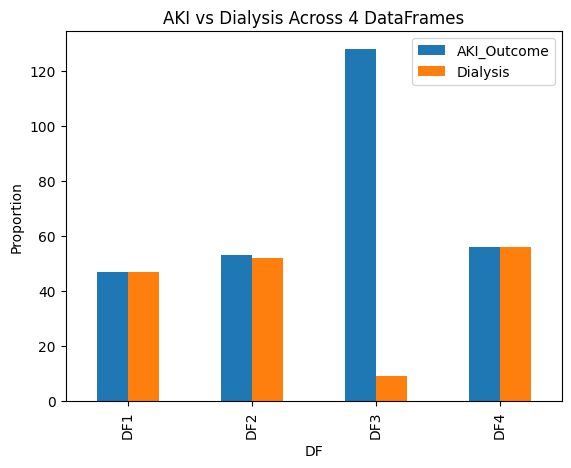

In [60]:
df_proportions = pd.DataFrame({
    'DF':['DF1','DF2','DF3','DF4'],
    'AKI_Outcome':[df1['Outcome of acute kidney injury'].sum(),
                   df2['Outcome of acute kidney injury'].sum(),
                   df3['Outcome of acute kidney injury'].sum(),
                   df4['Outcome of acute kidney injury'].sum()],
    'Dialysis':[df1['Dialysis treatment'].sum(),
                df2['Dialysis treatment'].sum(),
                df3['Dialysis treatment'].sum(),
                df4['Dialysis treatment'].sum()]
})

df_proportions.set_index('DF')[['AKI_Outcome','Dialysis']].plot(kind='bar')
plt.ylabel("Proportion")
plt.title("AKI vs Dialysis Across 4 DataFrames")
plt.show()


The visualization provides interesting insights by showing the mean proportions of Acute Kidney Injury (AKI) and Dialysis across the four identified groups.

Notably, in df1 and df4, the number of individuals undergoing dialysis closely matches the number of AKI cases, suggesting that patients with AKI in these groups are more likely to receive dialysis treatment. 

However, df3 exhibits a significant disparity, with a much higher proportion of AKI cases compared to those receiving dialysis.

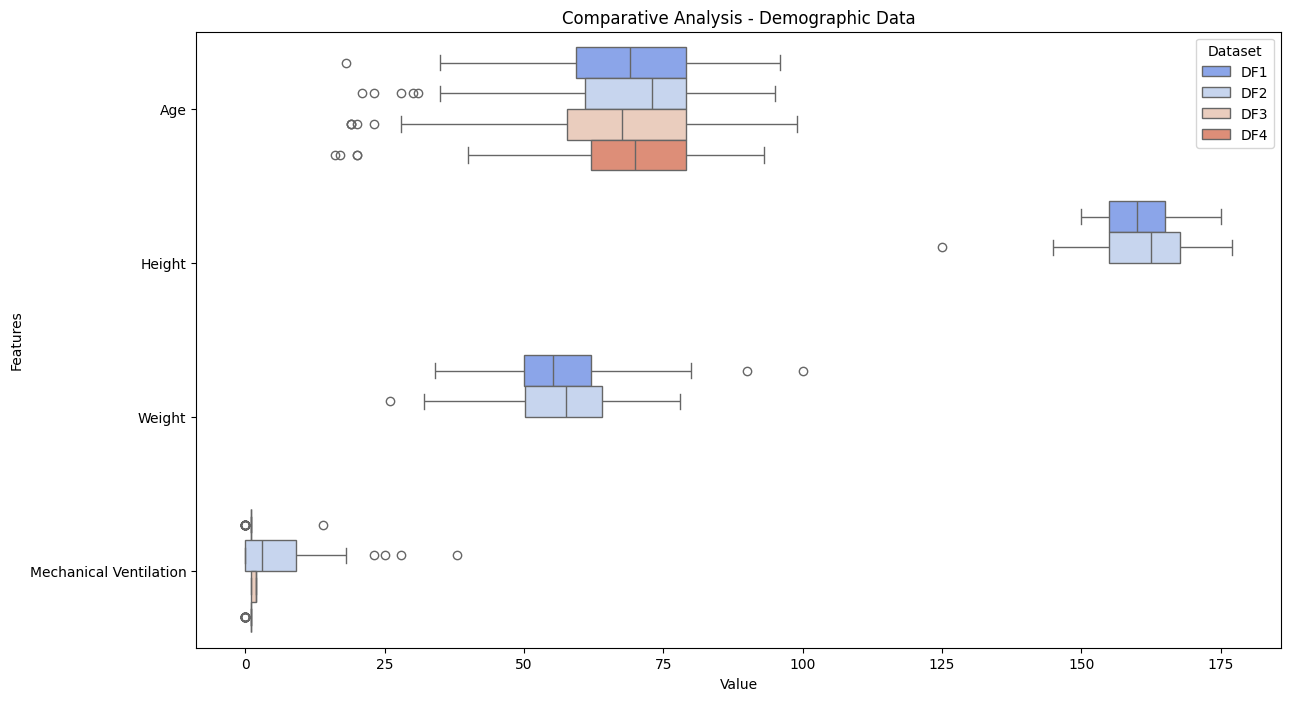

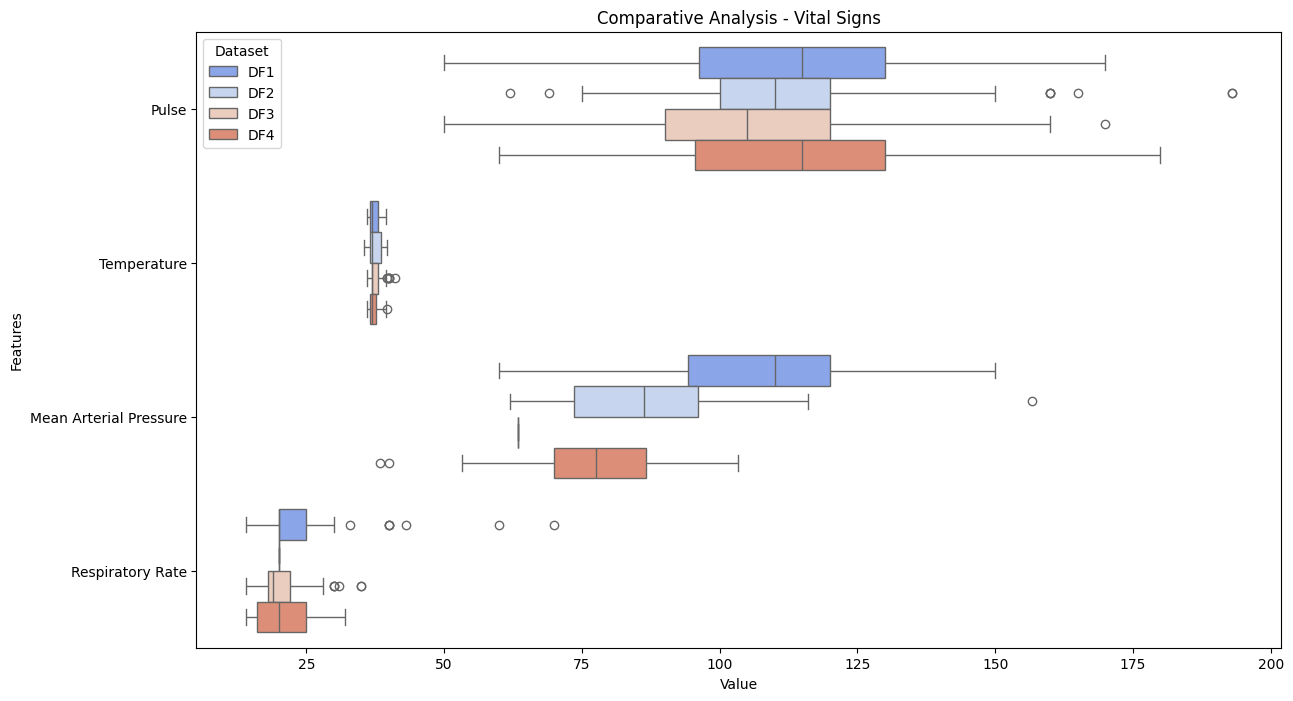

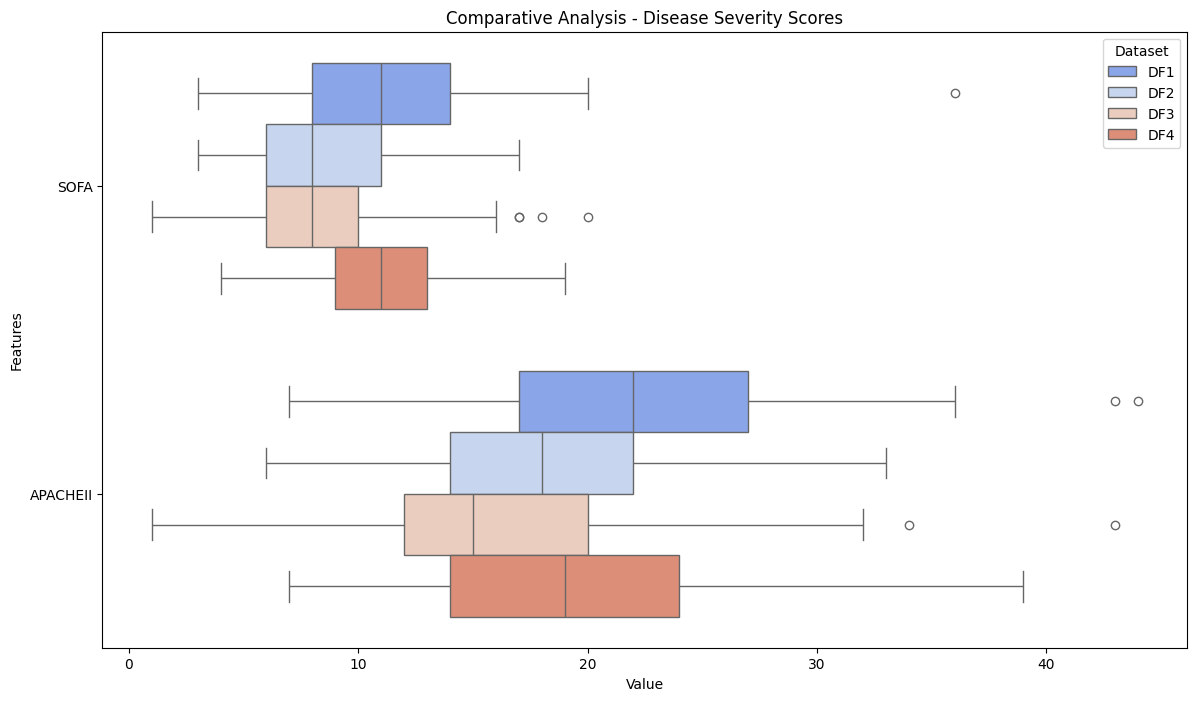

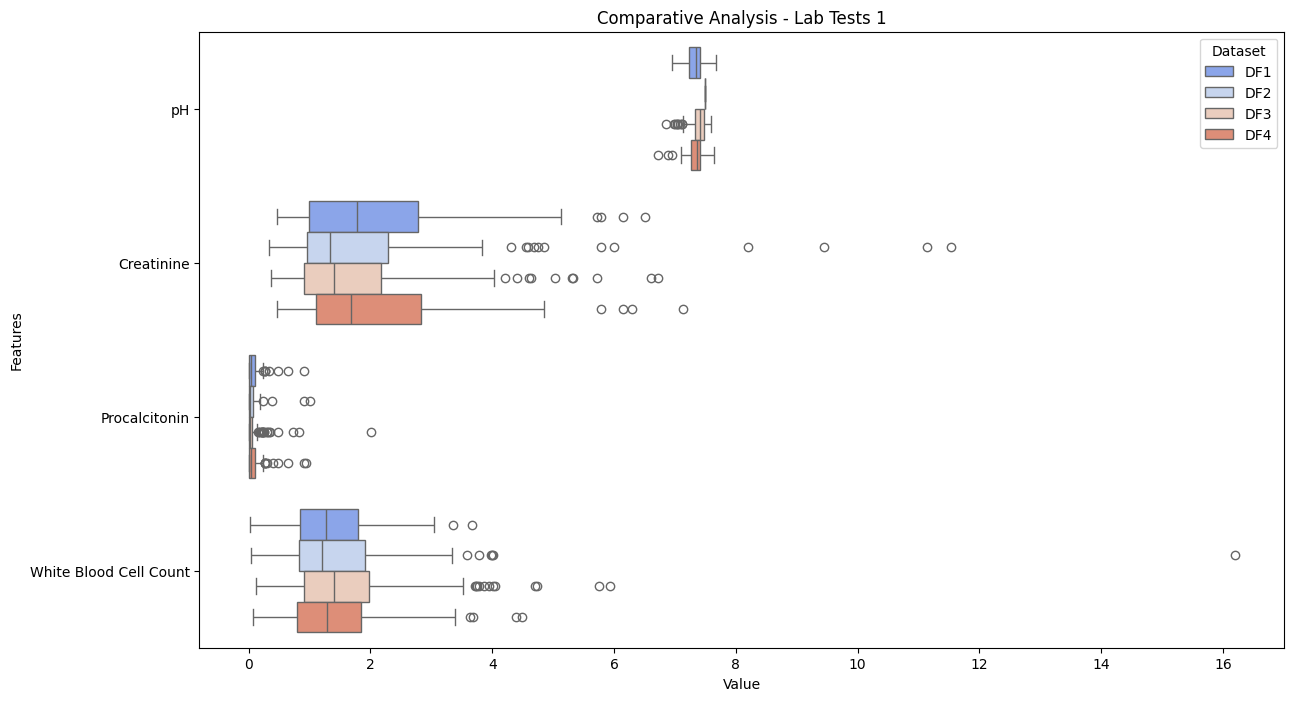

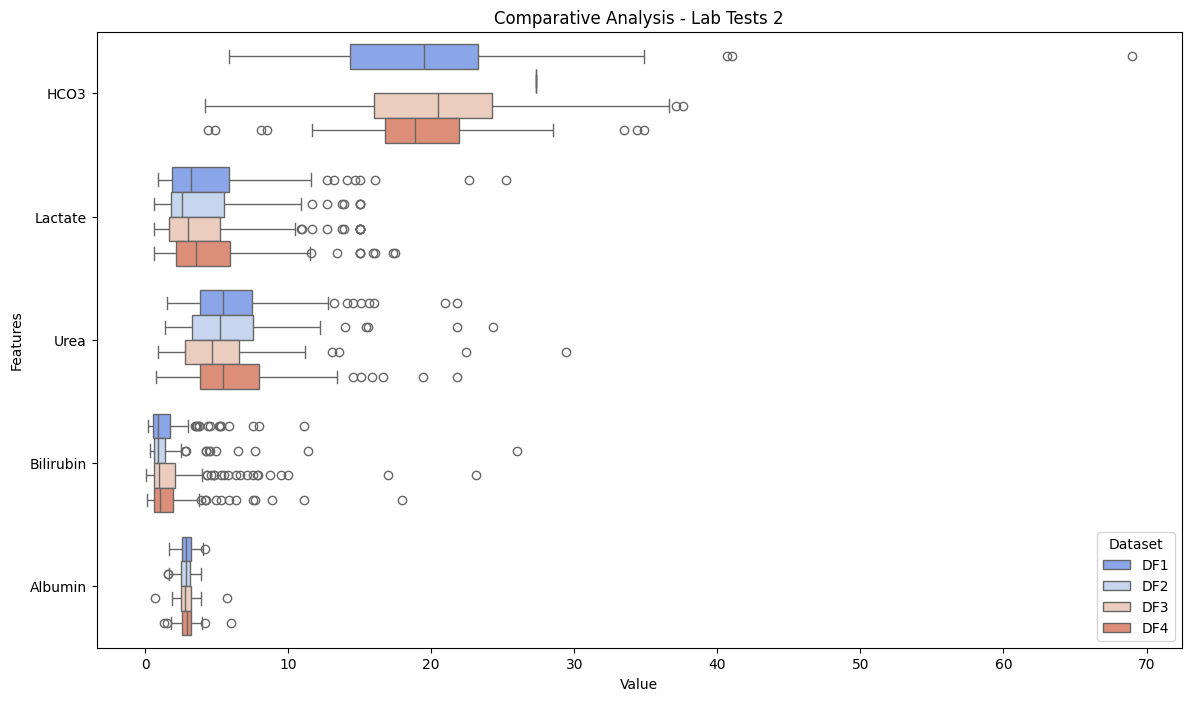

In [61]:
# Iterate over feature groups to generate box plots with all data points
for category, features in feature_groups.items():
    available_features = [feature for feature in features if feature in df.columns and feature not in categorical_features]

    if available_features:
        # Combine all dataset subsets into a single DataFrame
        combined_data = pd.concat([
            df1[available_features].assign(Dataset="DF1"),
            df2[available_features].assign(Dataset="DF2"),
            df3[available_features].assign(Dataset="DF3"),
            df4[available_features].assign(Dataset="DF4")
        ])

        # Transform data for better visualization
        melted_data = combined_data.melt(id_vars="Dataset", var_name="Feature", value_name="Value")

        # Generate box plot for each category
        plt.figure(figsize=(14, 8))
        sns.boxplot(data=melted_data, x="Value", y="Feature", hue="Dataset", palette="coolwarm")
        plt.title(f"Comparative Analysis - {category}")
        plt.xlabel("Value")
        plt.ylabel("Features")
        plt.legend(title="Dataset")
        plt.show()

## **Final Summary of Patient Group Analysis (DF1, DF2, DF3, DF4)**

### **1. Overall Health Condition**
- **DF1 patients are the sickest**, with **higher blood pressure (MAP), respiratory rates, and more severe illness scores (SOFA, APACHE II)**.
- **DF2 & DF3 patients are more stable**, with **lower severity scores and more normal vital signs**.
- **DF4 is in between**, sharing similarities with DF1 but with fewer extreme cases.

### **2. Key Differences in Vital Signs**
- **Breathing issues**: DF1 has the **highest respiratory rates**, meaning more patients struggle with breathing.
- **Blood pressure**: DF1 patients have **higher MAP**, possibly due to severe illness or medication effects.
- **Heart rate (Pulse)** is **similar** across all groups.

### **3. Disease Severity (SOFA & APACHE II Scores)**
- **DF1 has the most severe cases**, with **higher organ failure and illness severity**.
- **DF2 & DF3 have the least severe cases**.
- **DF4 sits in between DF1 and DF2/DF3**, indicating a mix of critically ill and stable patients.

### **4. Lab Test Findings**
- **Kidney function markers (Urea & Creatinine)**: Similar in all groups, with **outliers evenly distributed**.
- **Infection marker (Procalcitonin)**: Similar across groups, except **one extreme outlier in DF3**.
- **Liver function (Bilirubin)**: **High outliers in all groups**, but the general distribution is similar.
- **Albumin**: Similar IQR distribution and outlier distribution across all DFs.
- **Immune response (White Blood Cell Count)**: **One extreme outlier in DF3**, but otherwise similar across groups.
- **Blood acidity levels (pH & HCO3)**: **DF3 & DF4 show more low-end outliers**, and **DF2 has missing values**.

### **Final Takeaway**
- **DF1 patients are the most critical, with more severe illness and unstable vital signs**.
- **DF2 & DF3 have the least severe cases, appearing more stable**.
- **DF4 has a mix of both stable and critical patients**.
- **Lab test results show consistent patterns across all groups, except for a few extreme outliers**.

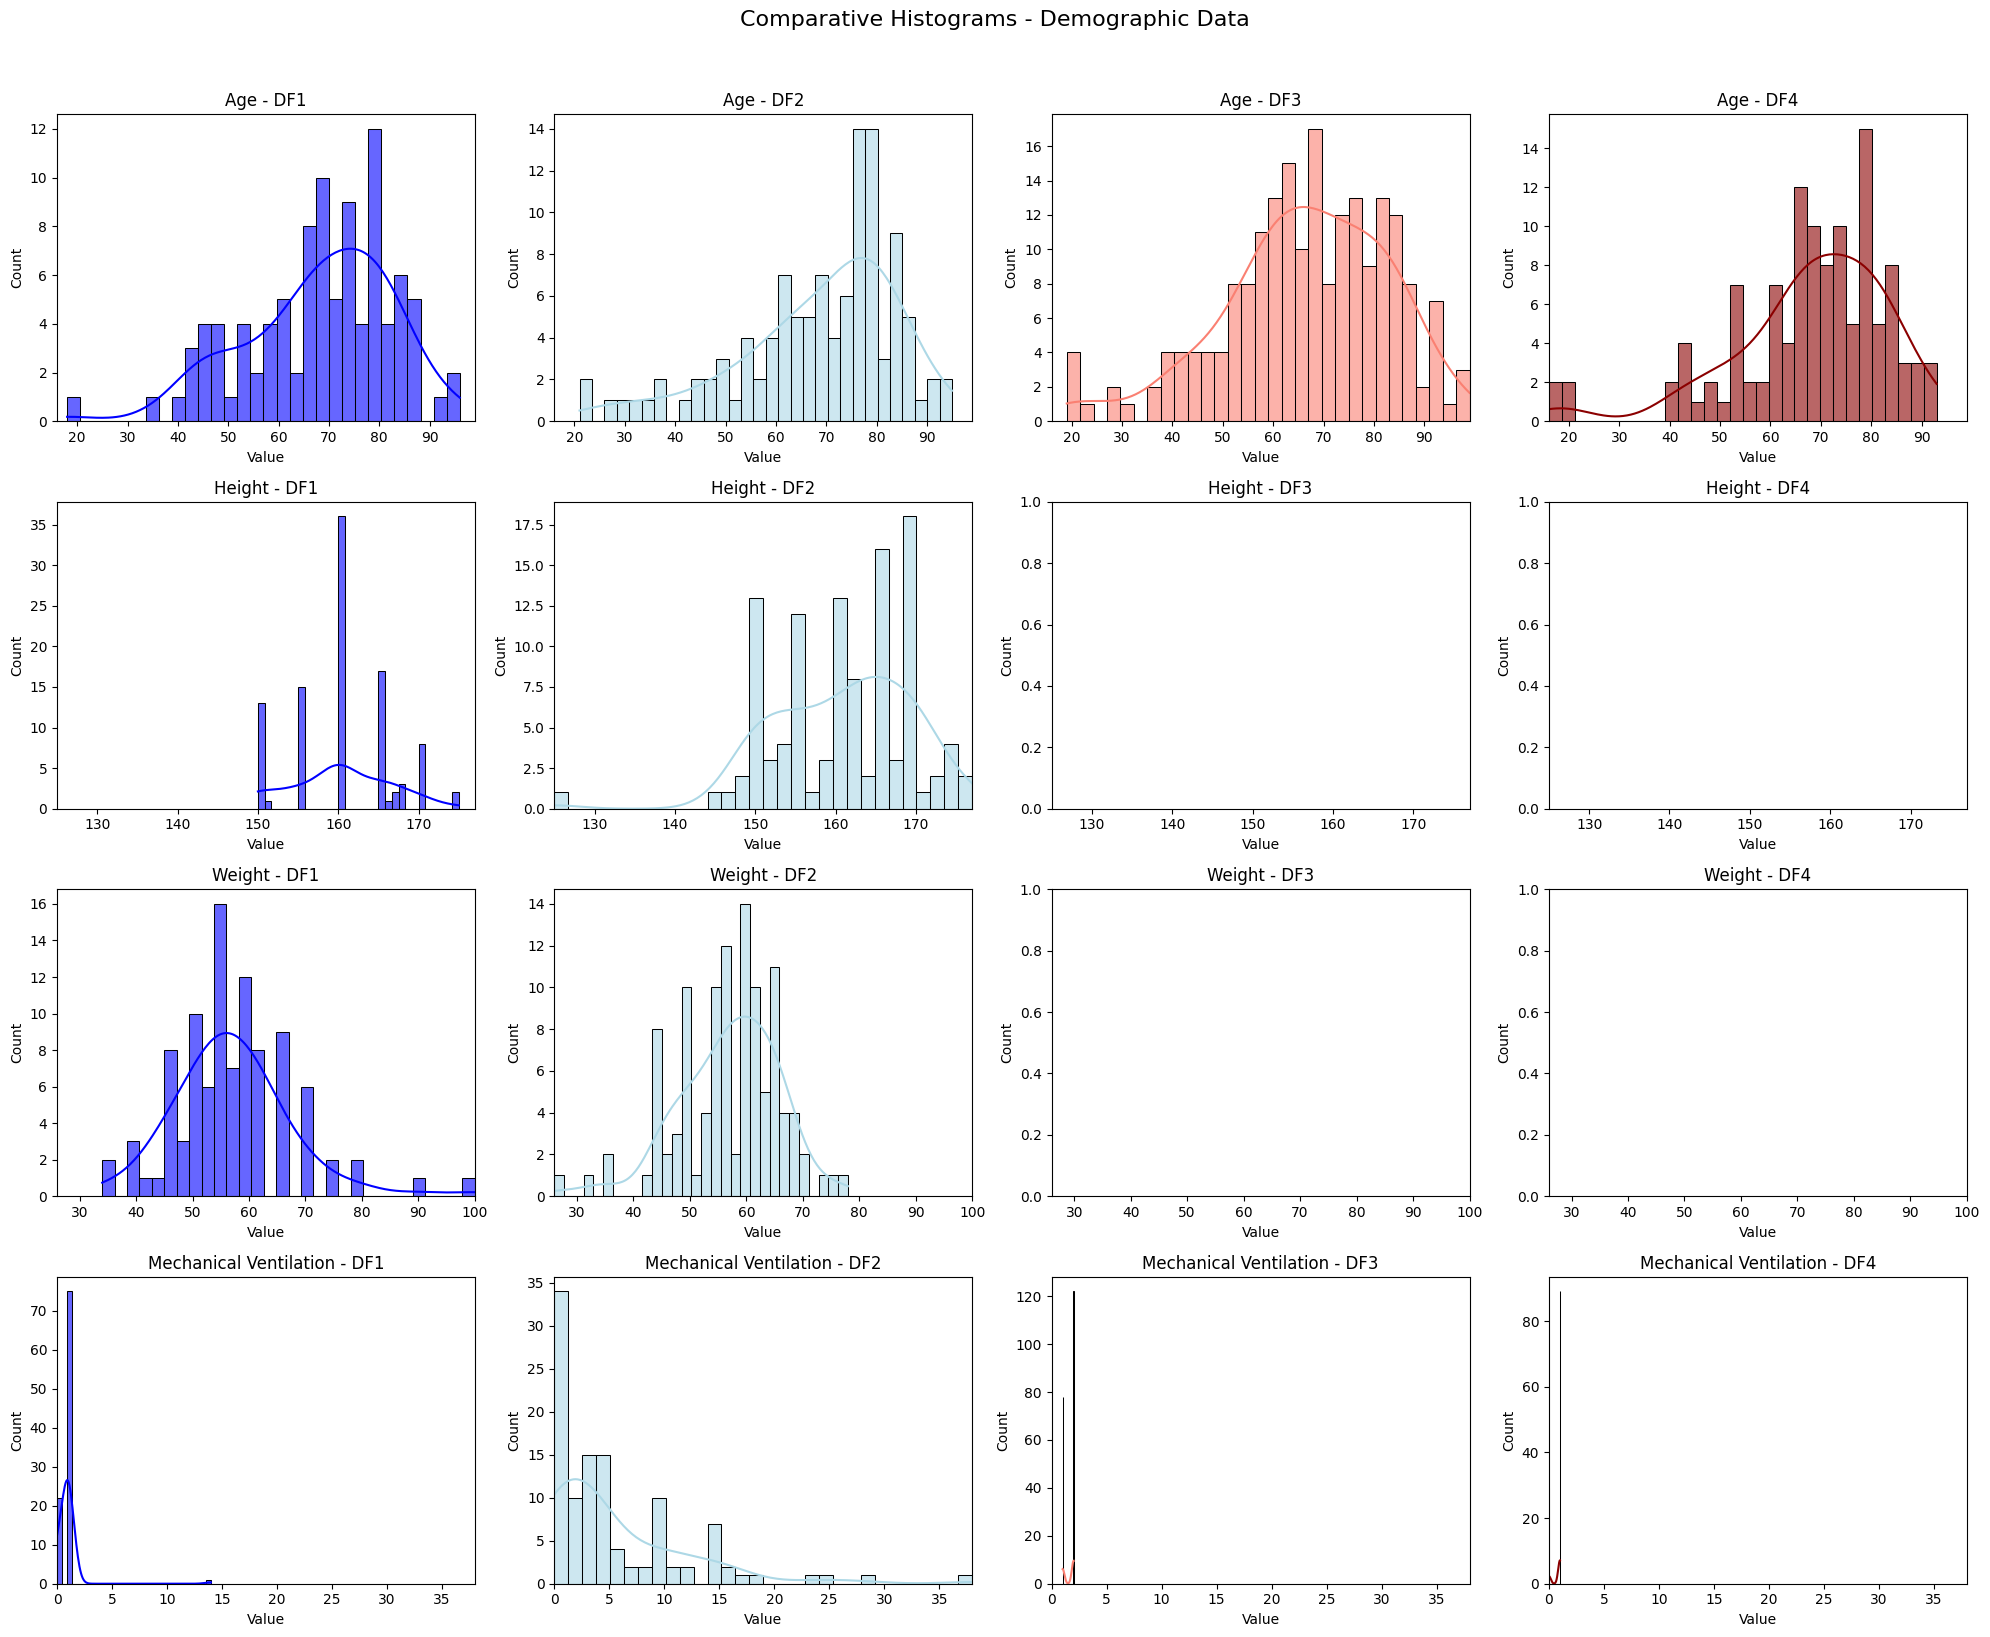

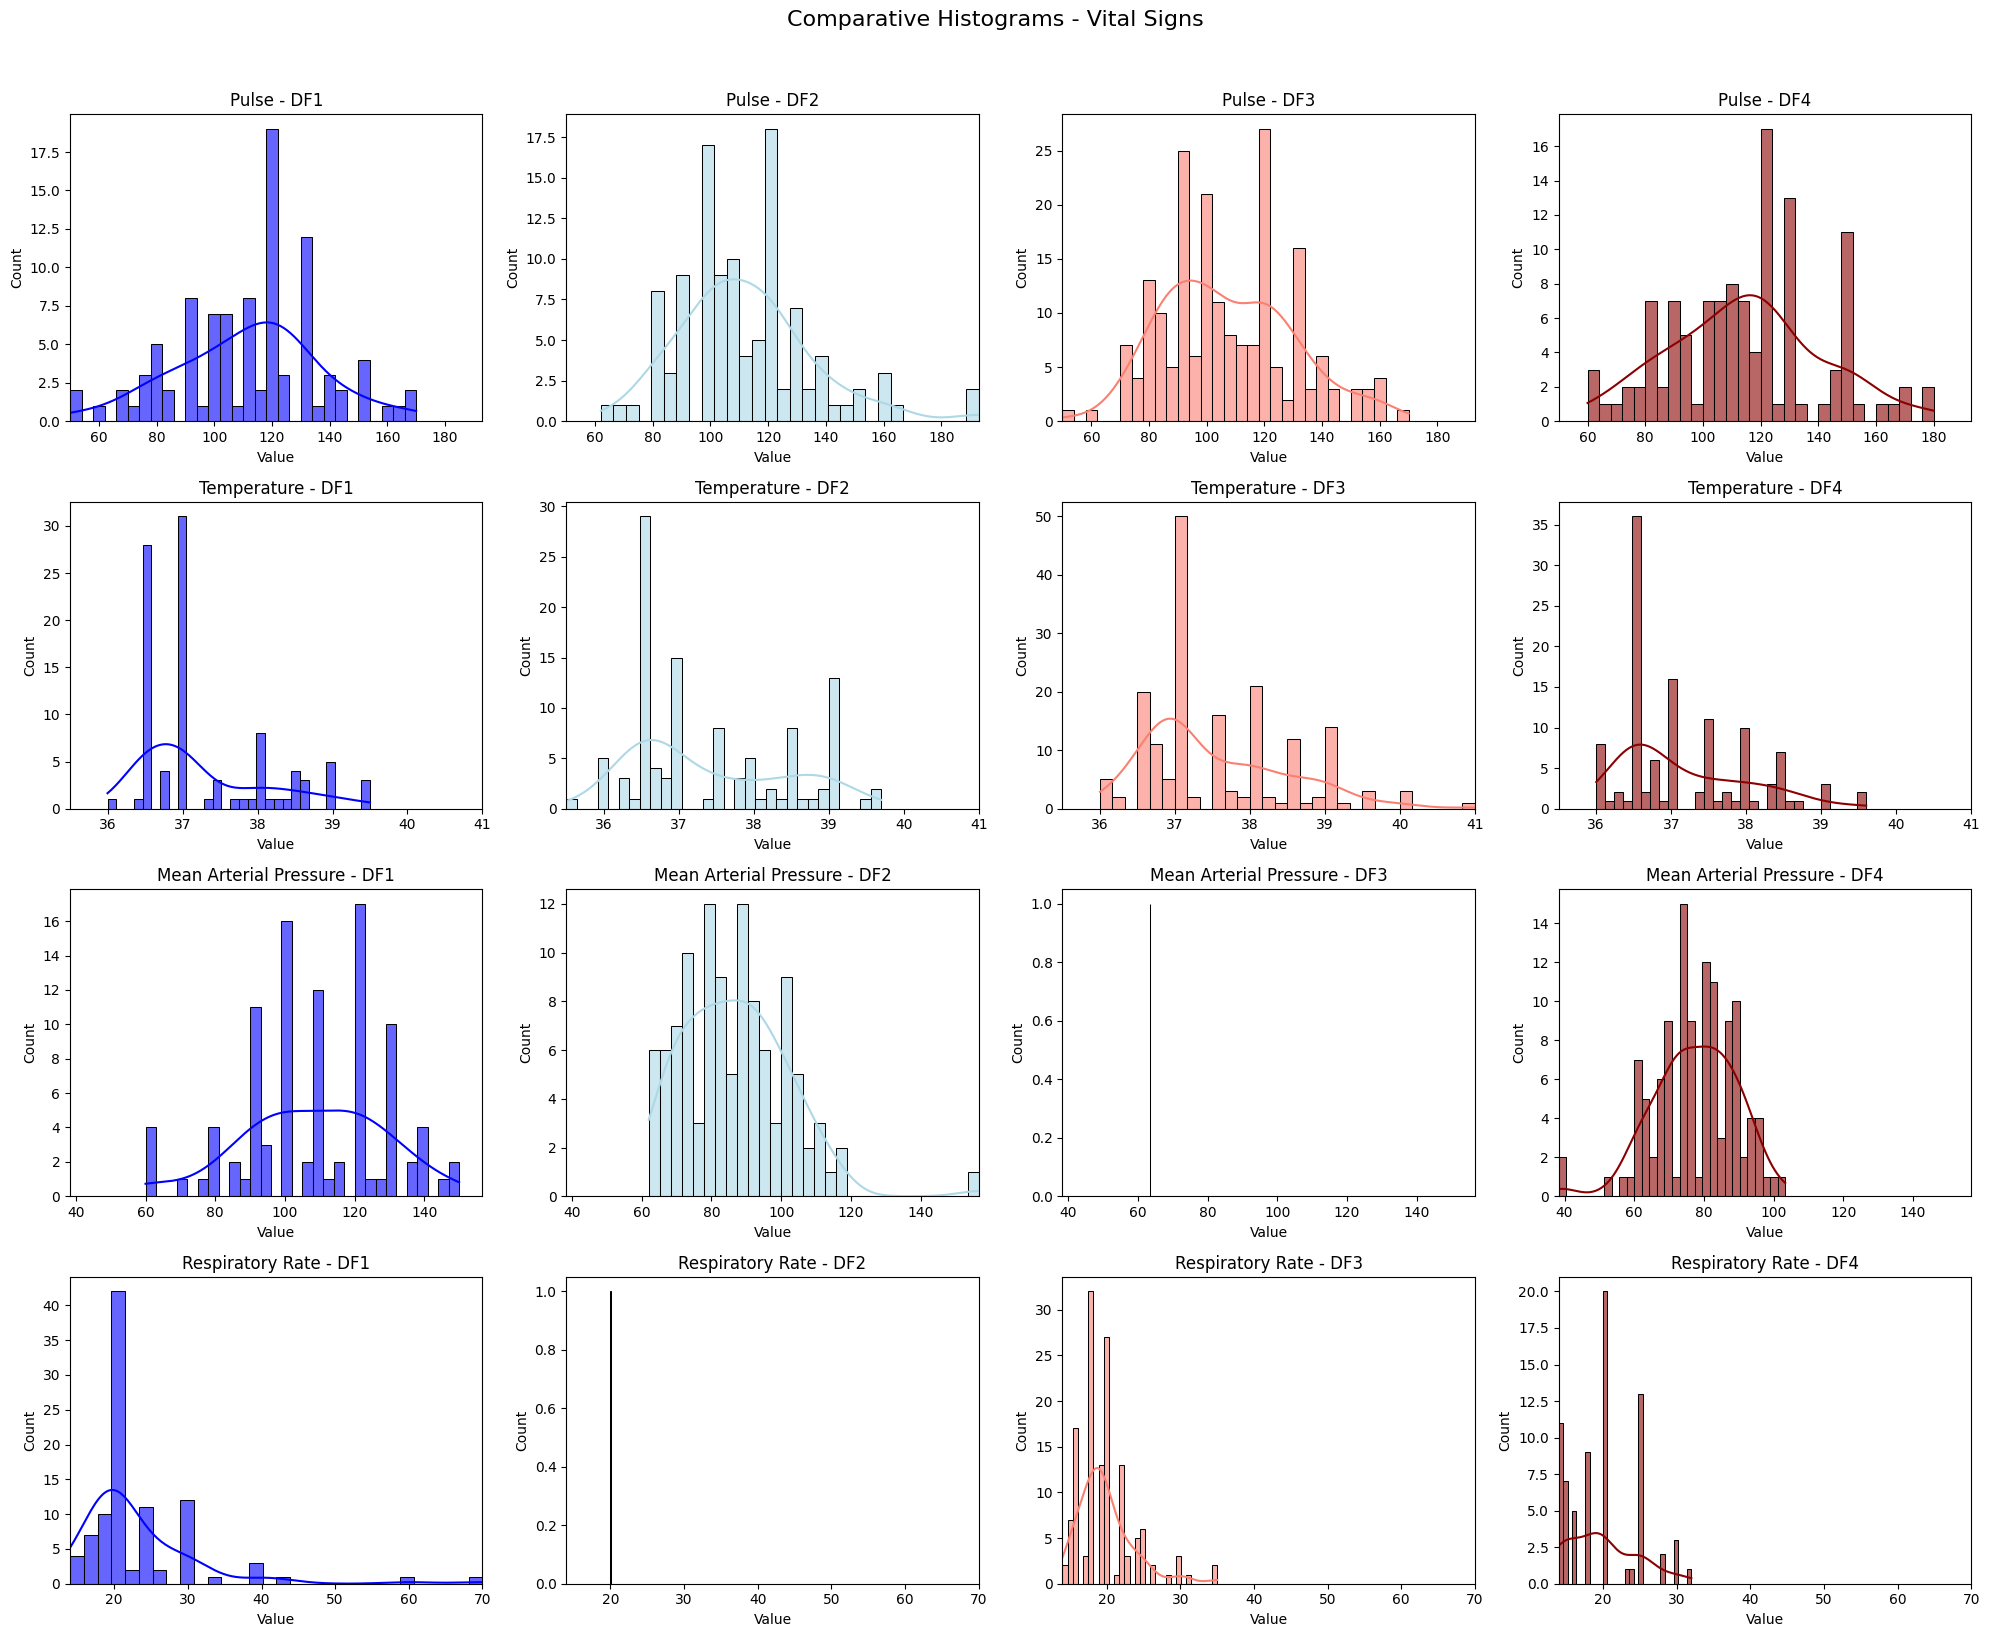

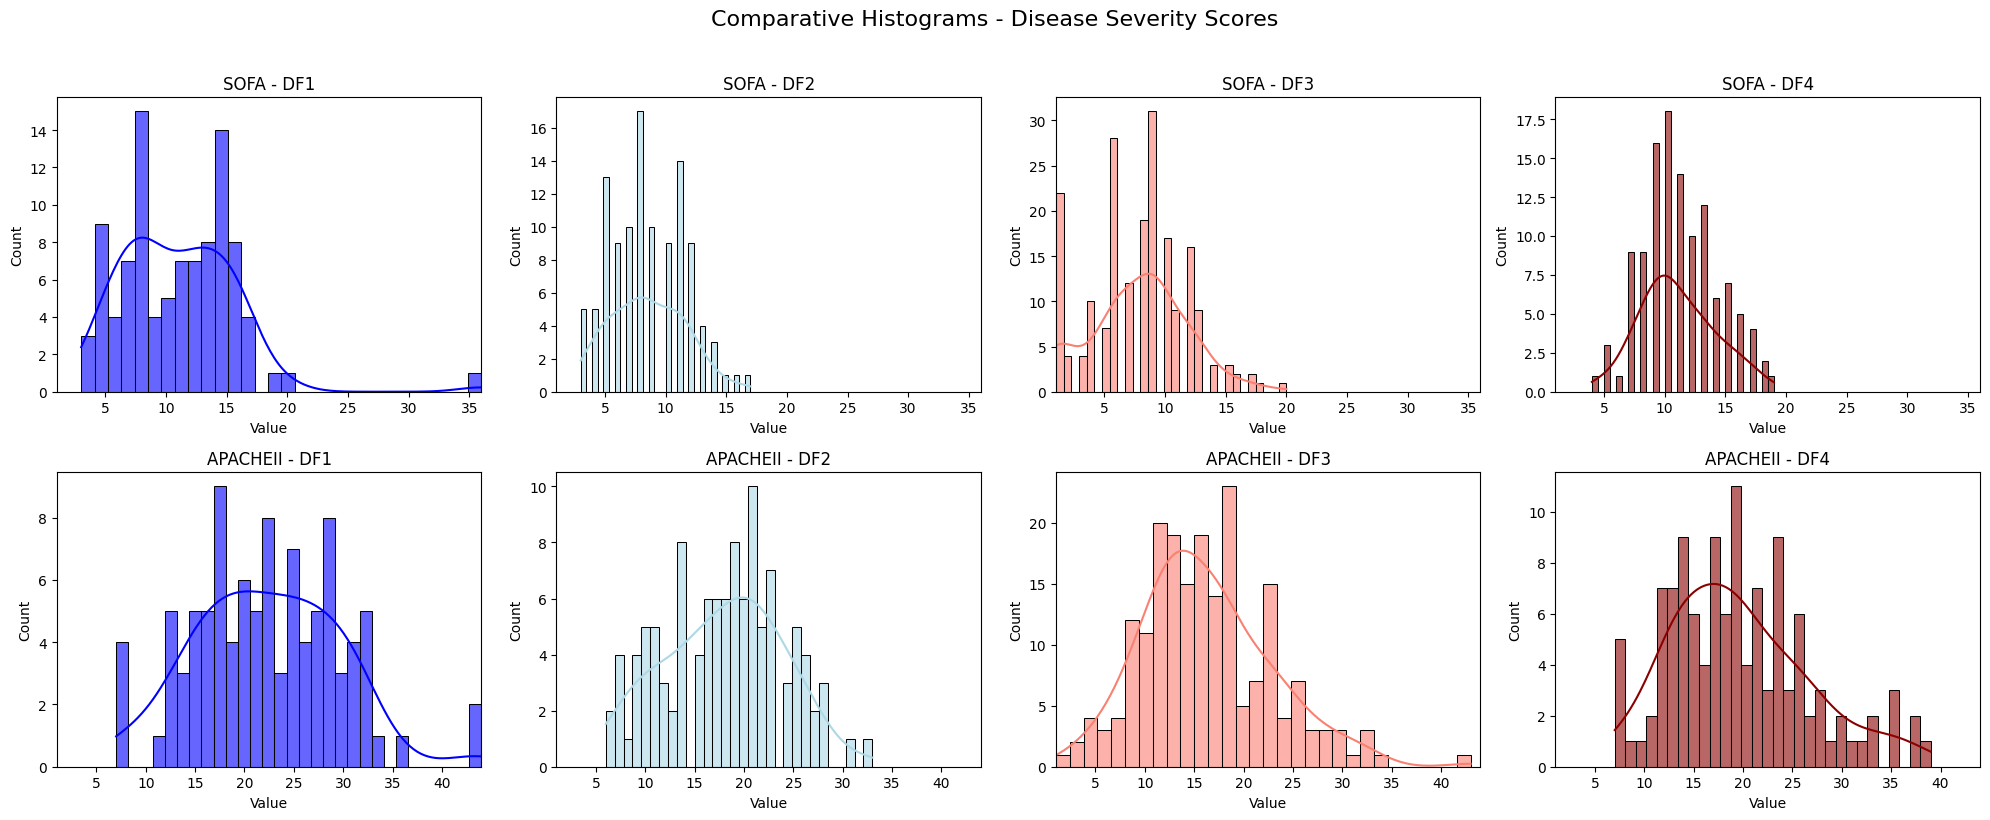

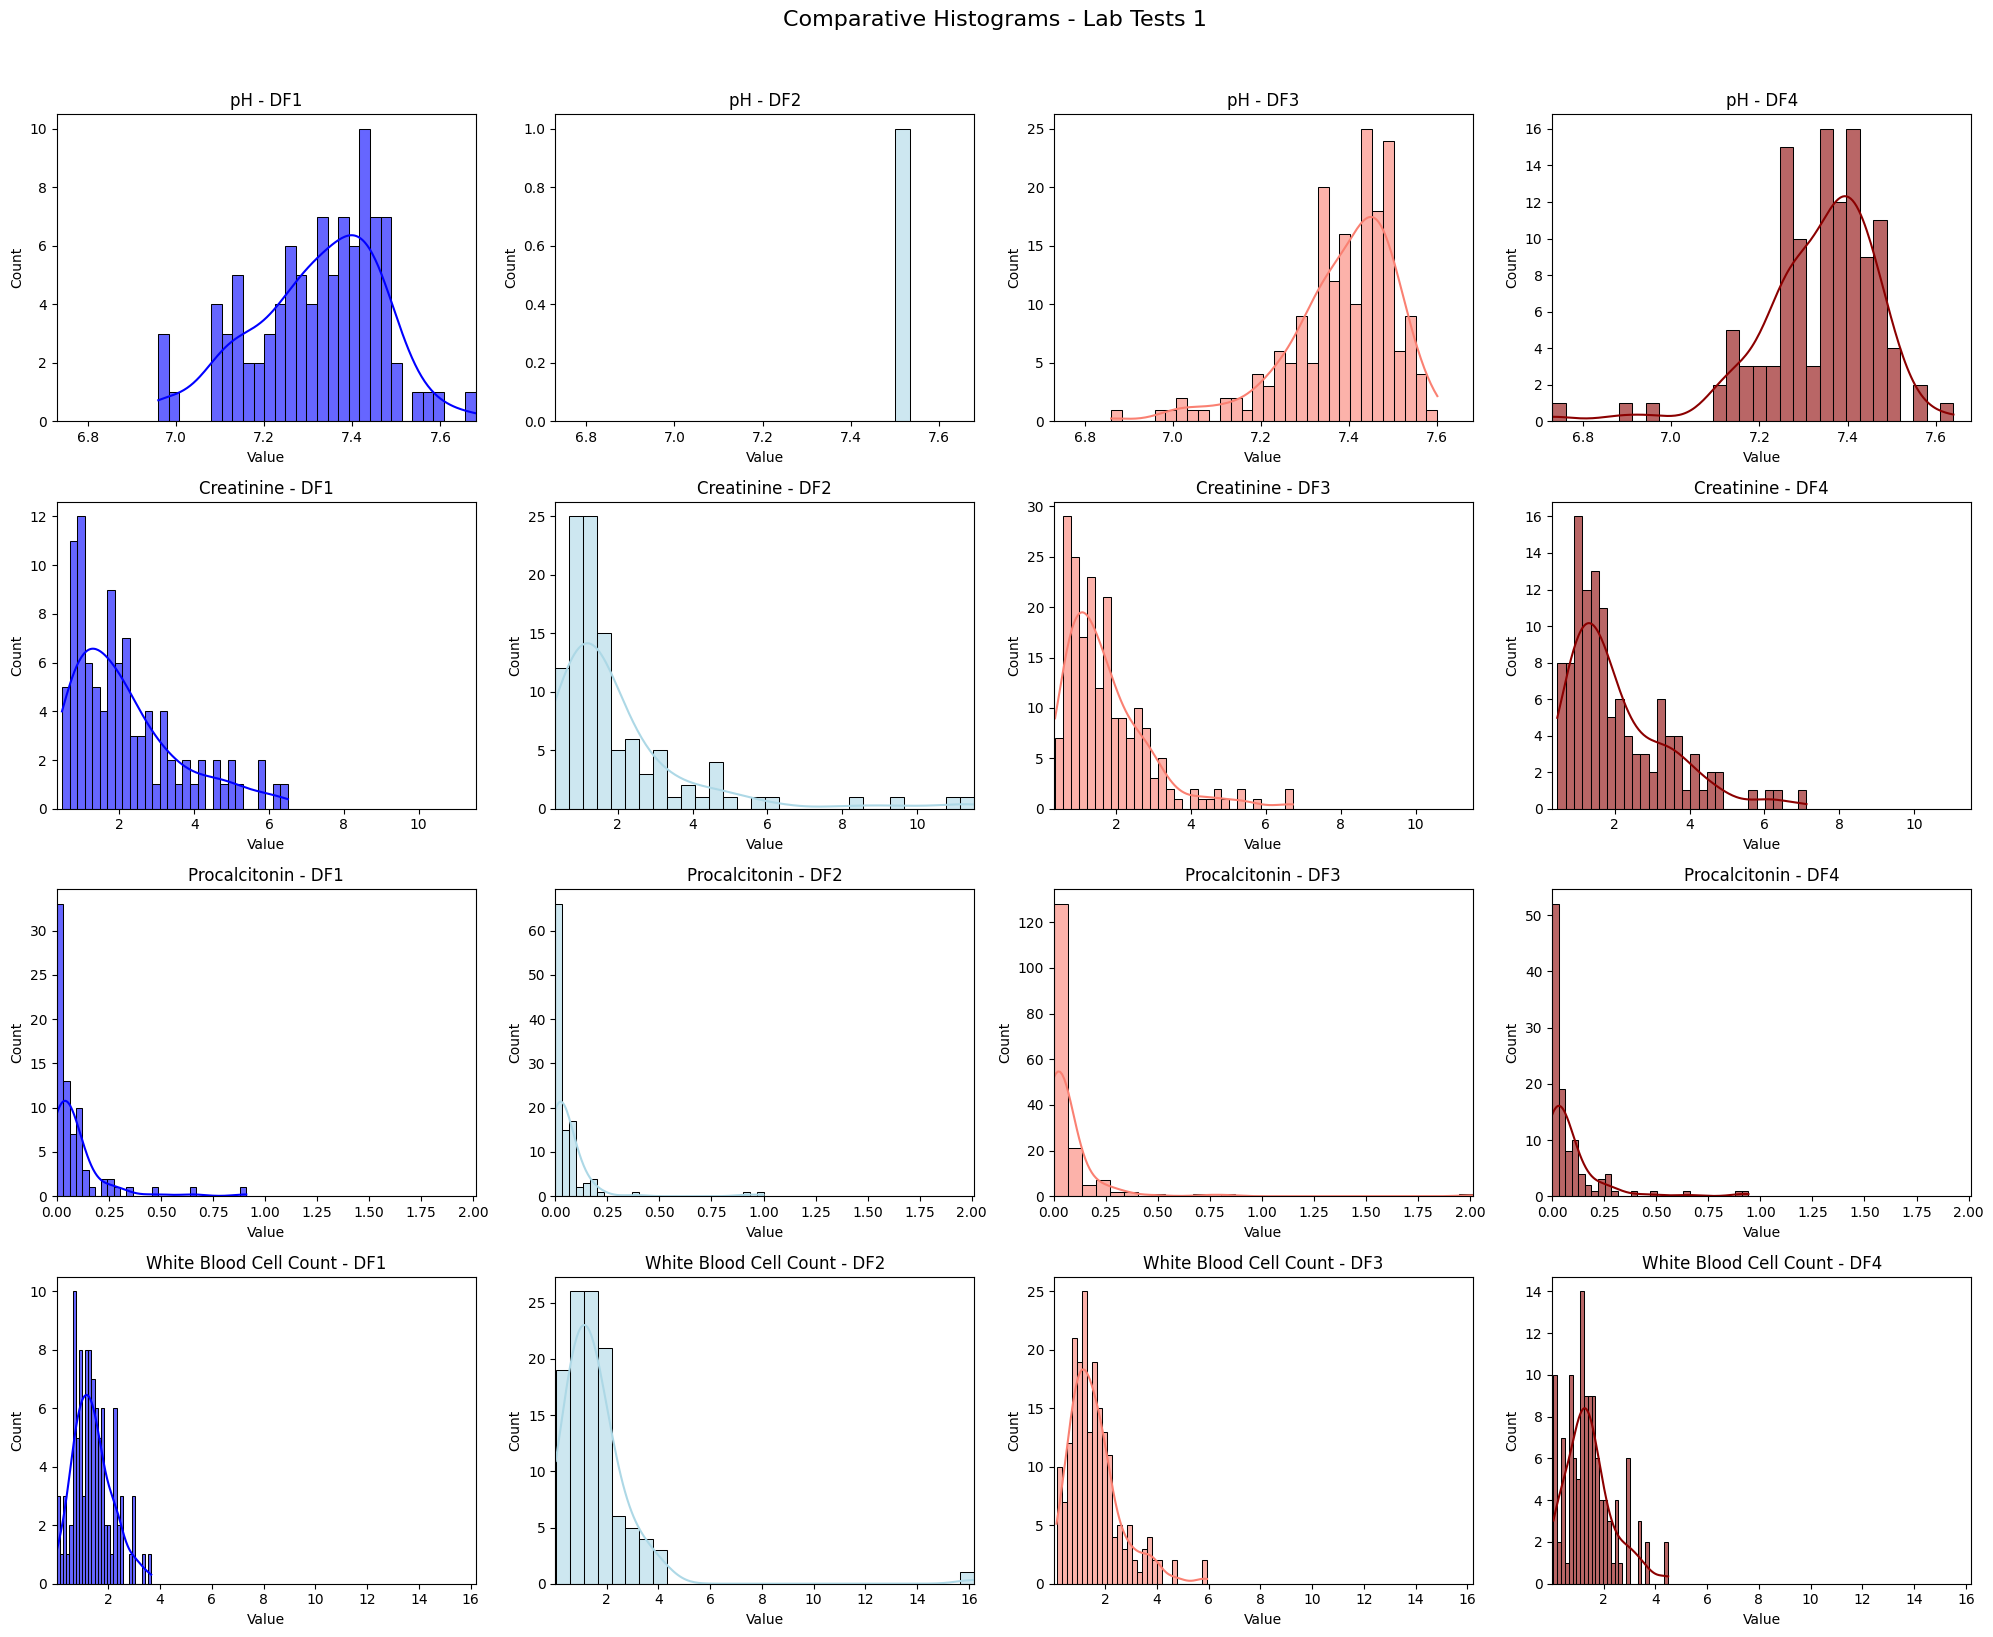

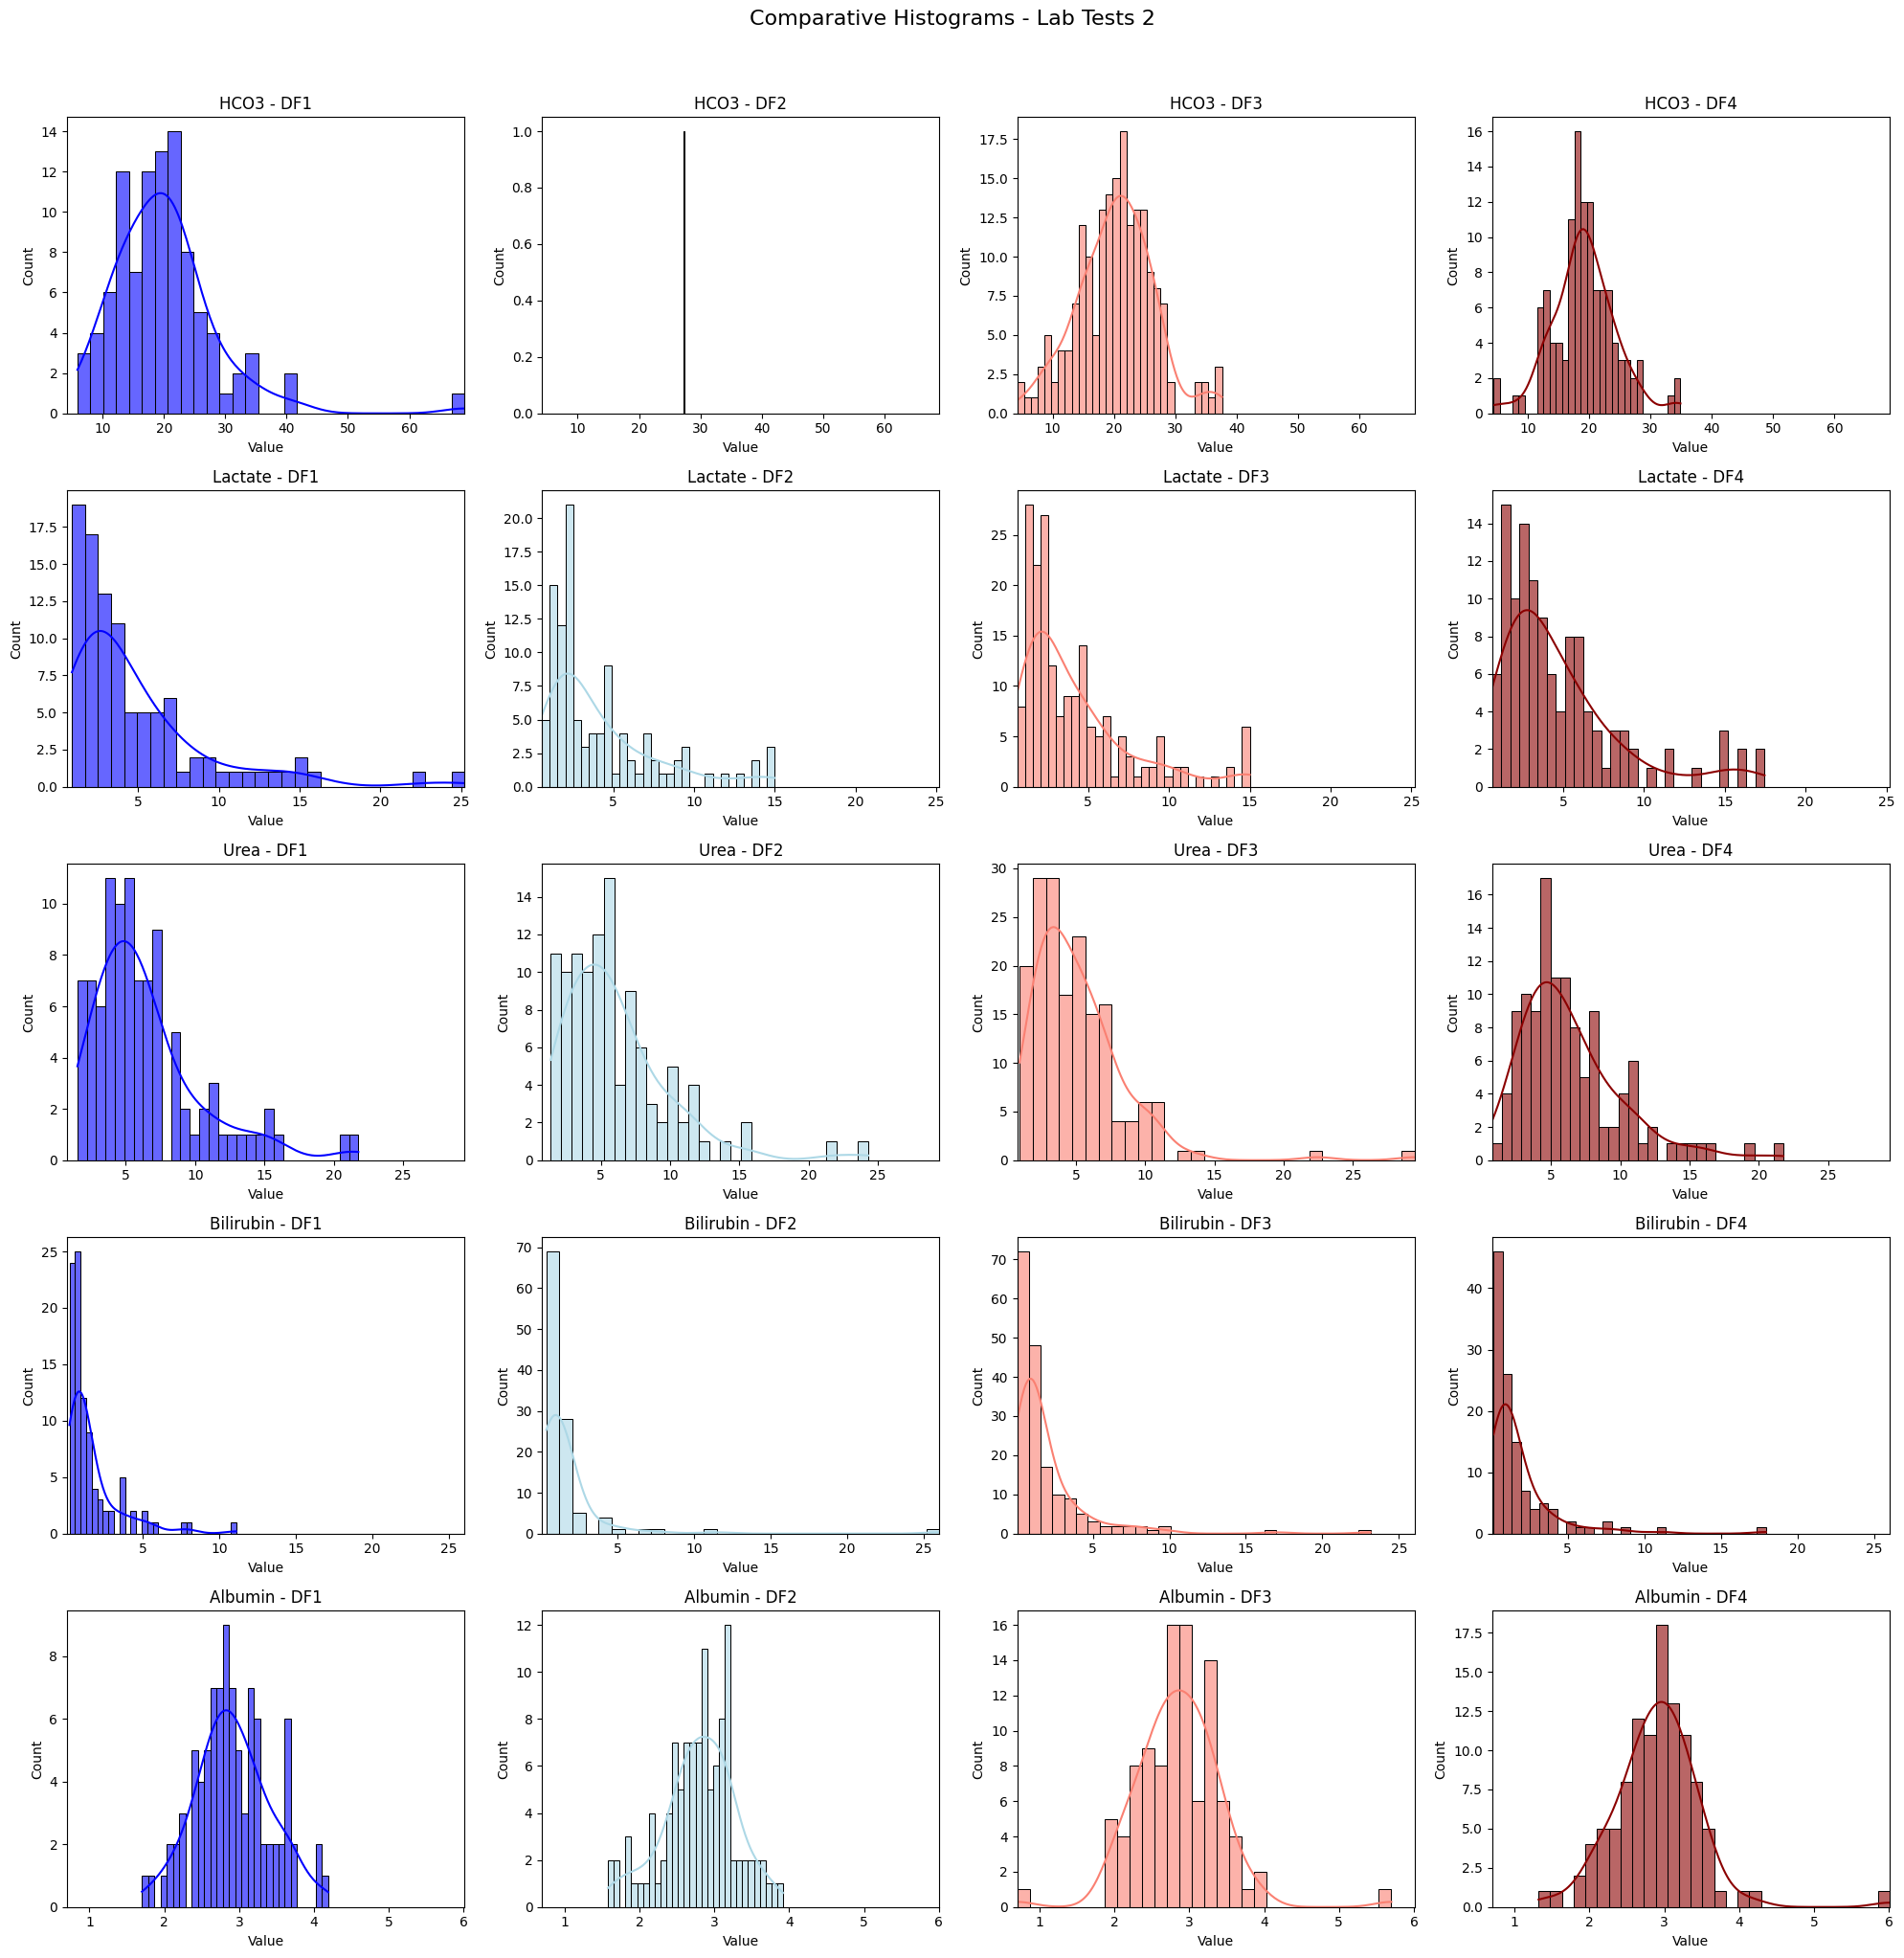

In [62]:
# Generate individual histograms for each dataset separately
for category, features in feature_groups.items():
    available_features = [feature for feature in features if feature in df.columns and feature not in categorical_features]

    if available_features:
        # Create subplots for the category
        fig, axes = plt.subplots(len(available_features), 4, figsize=(20, len(available_features) * 4), sharex=False, sharey=False)
        fig.suptitle(f"Comparative Histograms - {category}", fontsize=16, y=1.02)

        # Iterate over each feature
        for row, feature in enumerate(available_features):
            for col, (df_subset, label, color) in enumerate(zip([df1, df2, df3, df4], 
                                                                ["DF1", "DF2", "DF3", "DF4"], 
                                                                ["blue", "lightblue", "salmon", "darkred"])):
                if feature in df_subset:
                    # Compute global min and max for each feature
                    global_min = min(df[feature].min() for df in [df1, df2, df3, df4] if feature in df)
                    global_max = max(df[feature].max() for df in [df1, df2, df3, df4] if feature in df)

                    sns.histplot(df_subset[feature].dropna(), bins=30, kde=True, ax=axes[row, col], color=color, alpha=0.6)
                    axes[row, col].set_title(f"{feature} - {label}")
                    axes[row, col].set_xlabel("Value")
                    axes[row, col].set_ylabel("Count")
                    axes[row, col].set_xlim(global_min, global_max)  # Ensuring same x-axis range

        plt.tight_layout()
        plt.show()


# Histogram Comparative Analysis

## 1. **Demographics**
- **Age, Height, and Weight** are approximately similar across all datasets, being left skewed. But in DF3 and DF4 the values for Height and Weight are not recorded.
- **Mechanical Ventilation** is significantly higher in **DF2**, suggesting more severe cases in this dataset. In other DFs the values are much lower.

---

## 2. **Vital Signs**
- **Pulse**: Slight differences, but all datasets show similar medians.
- **Temperature**: Mostly within normal ranges, though **DF2** has more high values (possible fever cases).
- **Mean Arterial Pressure (MAP)**: **DF1** has the highest values, which could indicate critical patients. DF3 has missing values for MAP.
- **Respiratory Rate**: **DF1** has the highest values, possibly due to more severe conditions. DF2 has missing values, and the general trend is right skewed.

### Summary
- **DF1** appears to have the most unstable vital signs.
- **DF2** may have more critically ill patients requiring mechanical ventilation.

---

## 3. **Disease Severity Scores (SOFA, APACHE II)**
- **SOFA Score**: **DF1** has the highest scores, indicating more organ dysfunction. The distribution is mostly right skewed across all DFs.
- **APACHE II Score**: Again, **DF1** has the highest median, confirming that it contains the most severe cases, and DF1 and DF2 could be normal with DF3 and DF4 being right skewed.

### Summary
- **DF1** has the sickest patients.
- **DF2** and **DF3** appear to have milder cases.

---

## 4. **Lab Tests**
- **pH & HCO3**: Mostly left skewed but **DF3/DF4** have more values on the lower end of pH.
- **Lactate**: Higher values in **DF1**, indicating potential sepsis or poor oxygen delivery.
- **Procalcitonin, Urea & Creatinine**: All DFs are highly skewed to the right.
- **Bilirubin**: All DFs are highly skewed to the right. With more high values in DF2, DF3 and DF4.
- **Albumin**: All DFs are aproximately normally distributed. With some extreme values in DF3 and DF4.
- **White Blood Cell Count (WBC)**: All DFs are highly skewed to the right and one extreme value in DF2.

## **Final Takeaways**
- **DF1 has the most critically ill patients**, with **higher MAP, respiratory rates, and disease severity scores (SOFA, APACHE II)**.
- **DF2 shows severe cases as well**, with a higher need for **mechanical ventilation** and some high fever cases.
- **DF3 and DF4 have missing values for some key features**, making their distributions slightly different.



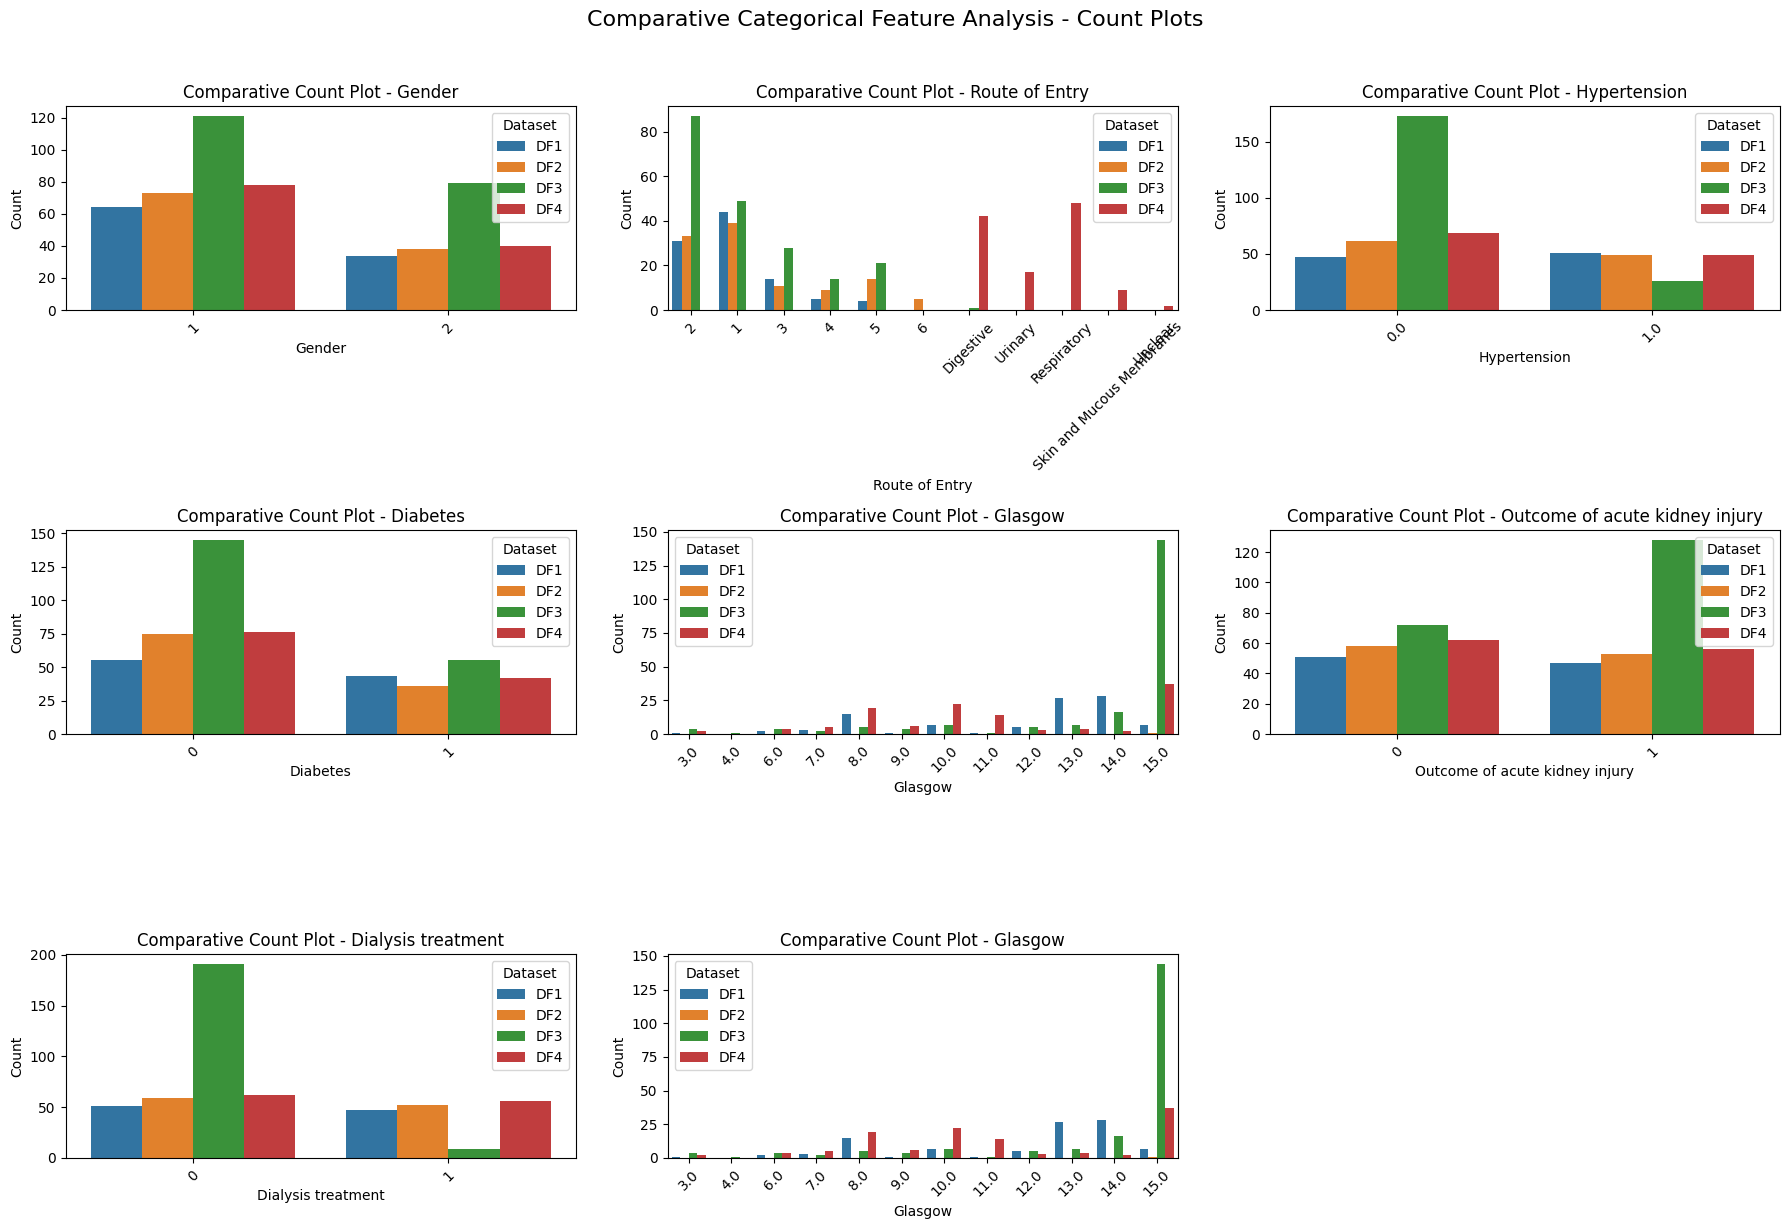

In [63]:
# Define the number of columns for layout
num_cols = 3  
available_categorical_features = [feature for feature in categorical_features if feature in df.columns] + ['Glasgow']

# Determine number of rows needed
num_features = len(available_categorical_features)
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create subplots for categorical features with dataset comparison
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
fig.suptitle("Comparative Categorical Feature Analysis - Count Plots", fontsize=16, y=1.02)

# Flatten axes for easier iteration
axes = axes.flatten()

# Generate count plots with dataset comparison for each categorical feature
for i, feature in enumerate(available_categorical_features):
    sns.countplot(data=pd.concat([df1[feature].dropna().to_frame().assign(Dataset="DF1"),
                                  df2[feature].dropna().to_frame().assign(Dataset="DF2"),
                                  df3[feature].dropna().to_frame().assign(Dataset="DF3"),
                                  df4[feature].dropna().to_frame().assign(Dataset="DF4")]),
                  x=feature, hue="Dataset", hue_order=["DF1", "DF2", "DF3", "DF4"], ax=axes[i])
    axes[i].set_title(f"Comparative Count Plot - {feature}")
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Dataset")

# Hide empty subplots if any
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# **Comparative Analysis of Categorical Features**

## **1. Gender Distribution**
- Across all datasets, **Gender 1** is more prevalent, with **DF3 having the highest number of Gender 1 patients**.
- A similar pattern is observed for **Gender 2**, where **DF3 also has the highest count**.

---

## **2. Route of Entry**
- **DF1, DF2, and DF3** primarily have **Route "1"** as the most common entry point.
- **DF4 records route of entry differently**, specifying exact methods rather than numerical values. If this approach was consistent across all datasets, it could provide deeper insights.

---

## **3. Hypertension**
- **DF3 has the highest number of patients without hypertension**, while also having the **lowest count of hypertensive patients**.
- The **other datasets show a more balanced distribution** between patients with and without hypertension.

---

## **4. Diabetes**
- **DF2 has the highest number of patients without diabetes**.
- **DF1, DF3, and DF4** have more **evenly distributed cases** of diabetic and non-diabetic patients.

---

## **5. Glasgow Coma Scale (GCS)**
- **DF3 and DF4 have a higher concentration of patients with a GCS score of 15**, indicating better neurological function.
- **DF1 and DF2 display a wider spread across lower GCS values**, suggesting that these datasets contain more critically ill neurological patients.

---

## **6. Outcome of Acute Kidney Injury (AKI)**
- **DF3 has the highest number of positive AKI cases**, indicating a greater proportion of patients experiencing kidney failure.
- **The other datasets have a more balanced distribution** between positive and negative AKI outcomes.

---

## **7. Dialysis Treatment**
- **DF2 has the highest number of patients who did not receive dialysis**.
- **DF1, DF3, and DF4 have more patients undergoing dialysis**, suggesting that these groups contain more severe kidney cases requiring intervention.

---

## **Final Takeaways**
- **DF3 appears to have the highest concentration of AKI cases, but fewer patients receive dialysis**, indicating possible differences in treatment decisions or patient severity.
- **DF1 contains the most critical patients, as indicated by hypertension, neurological dysfunction, and dialysis treatment rates**.
- **DF2 has a lower prevalence of chronic conditions like hypertension and diabetes but has a higher rate of non-dialysis patients**, which could indicate early-stage conditions or different treatment approaches.
- **DF4 shares similarities with DF1 but also incorporates more specific route-of-entry details, potentially improving data granularity**.
- The **distribution of dialysis treatment aligns closely with the severity of illness markers** (such as SOFA, APACHE II, and kidney function markers), reinforcing the relationship between disease severity and the need for dialysis.



# Total Analysis

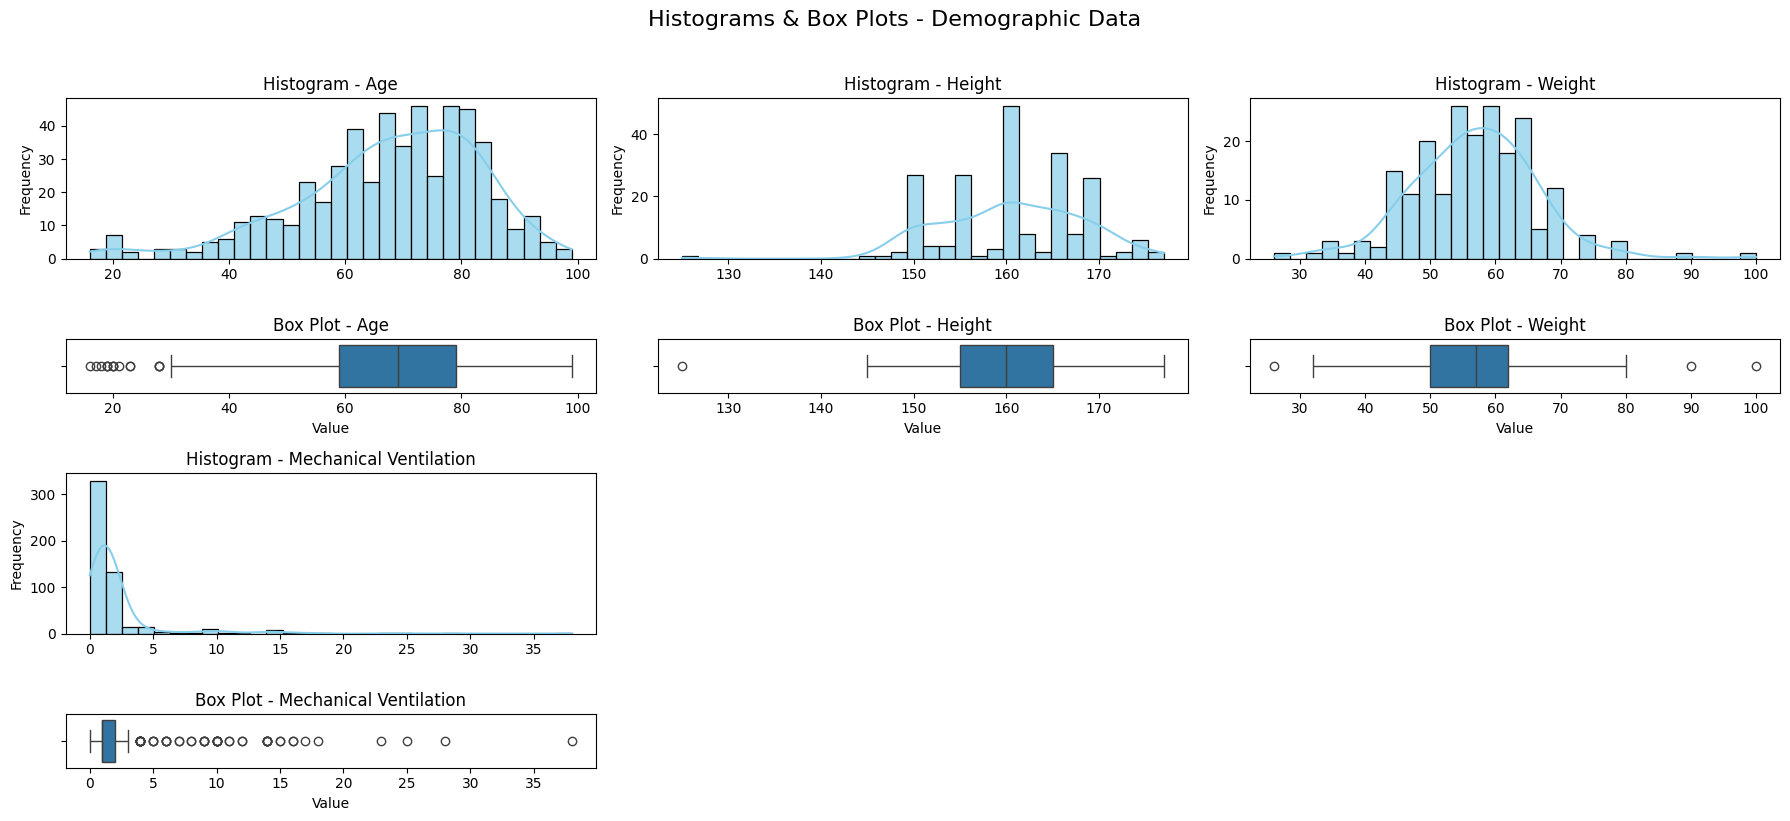

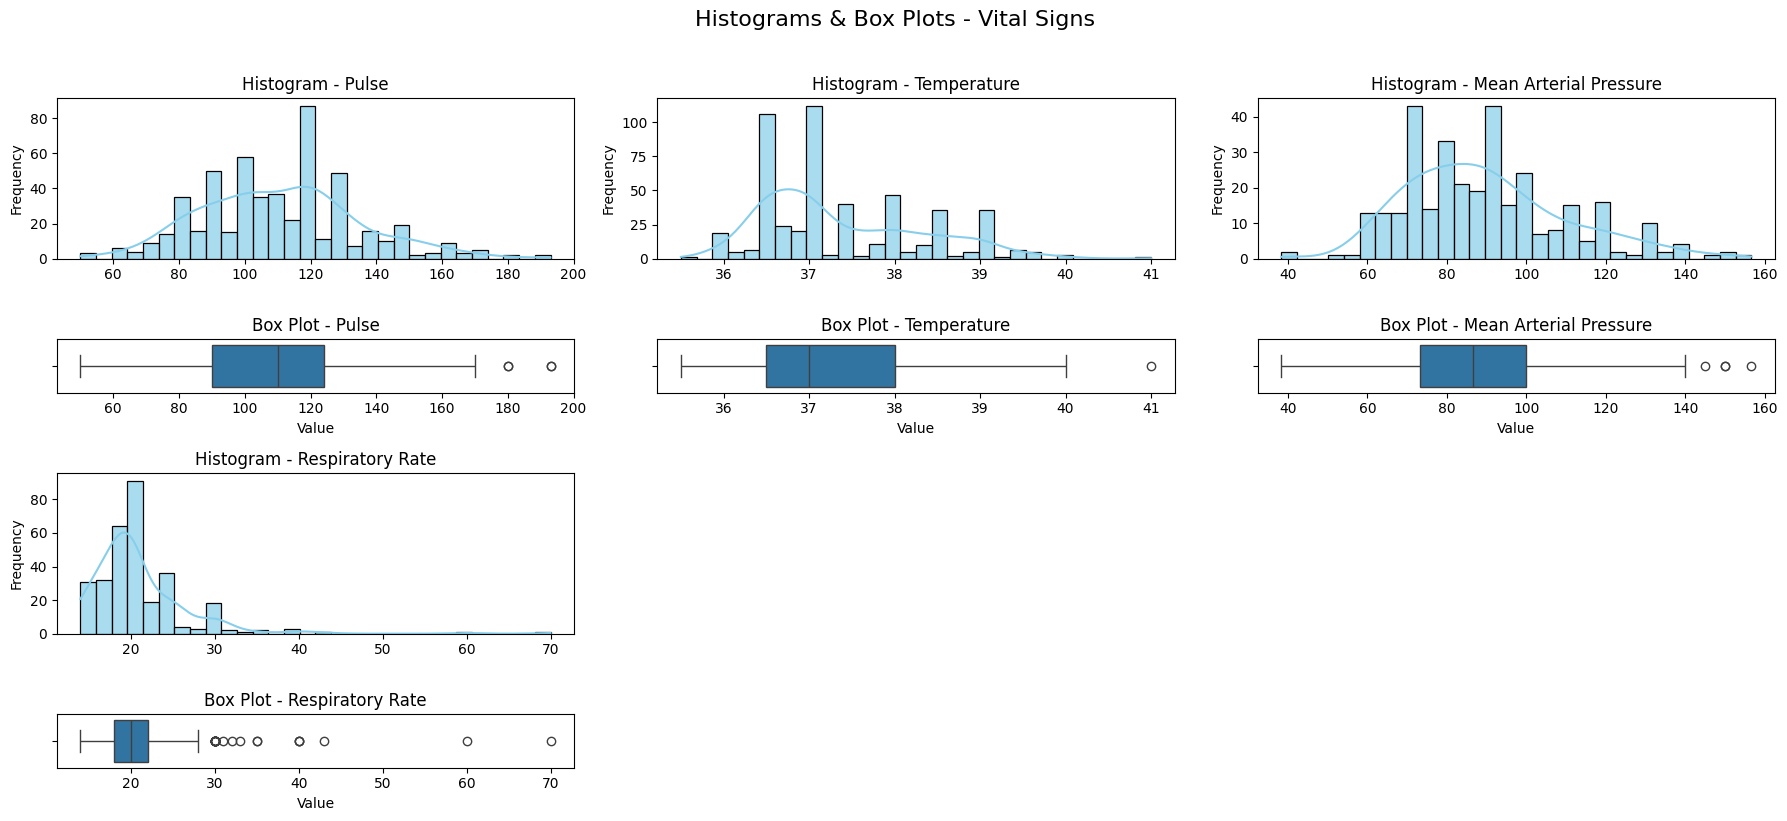

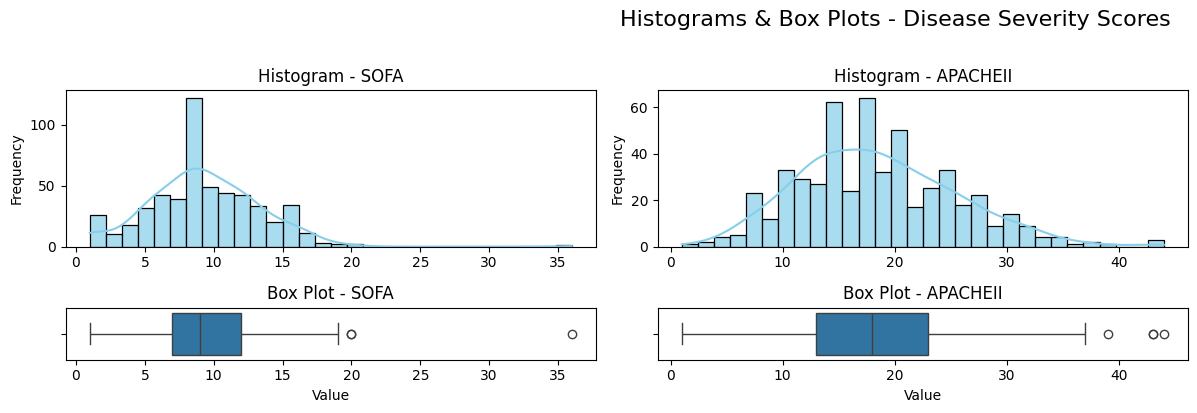

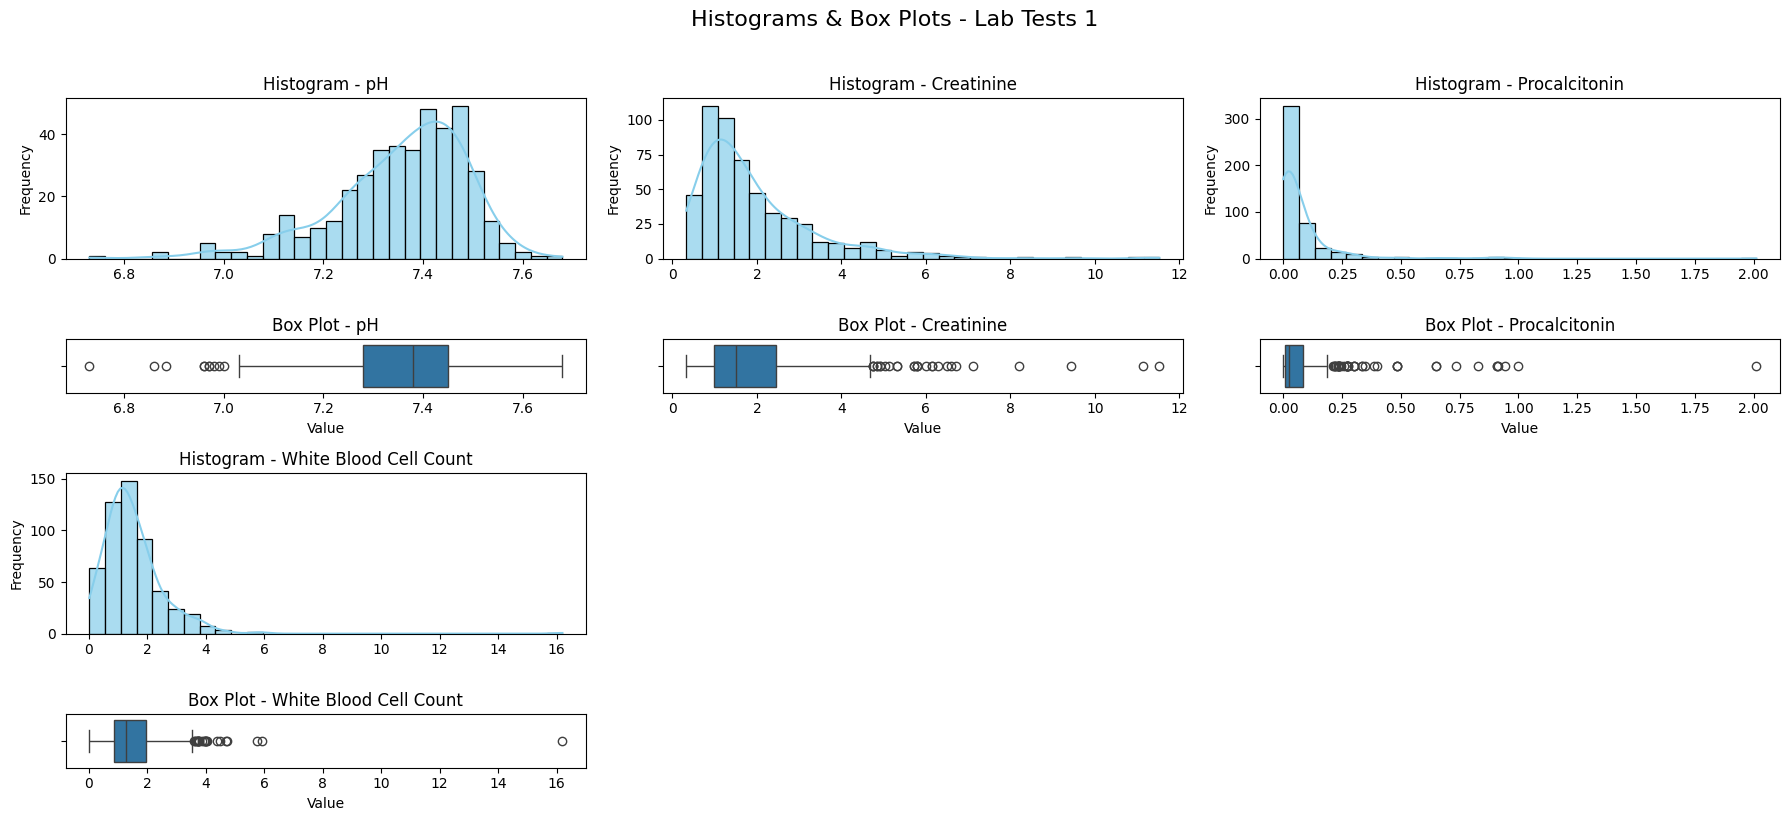

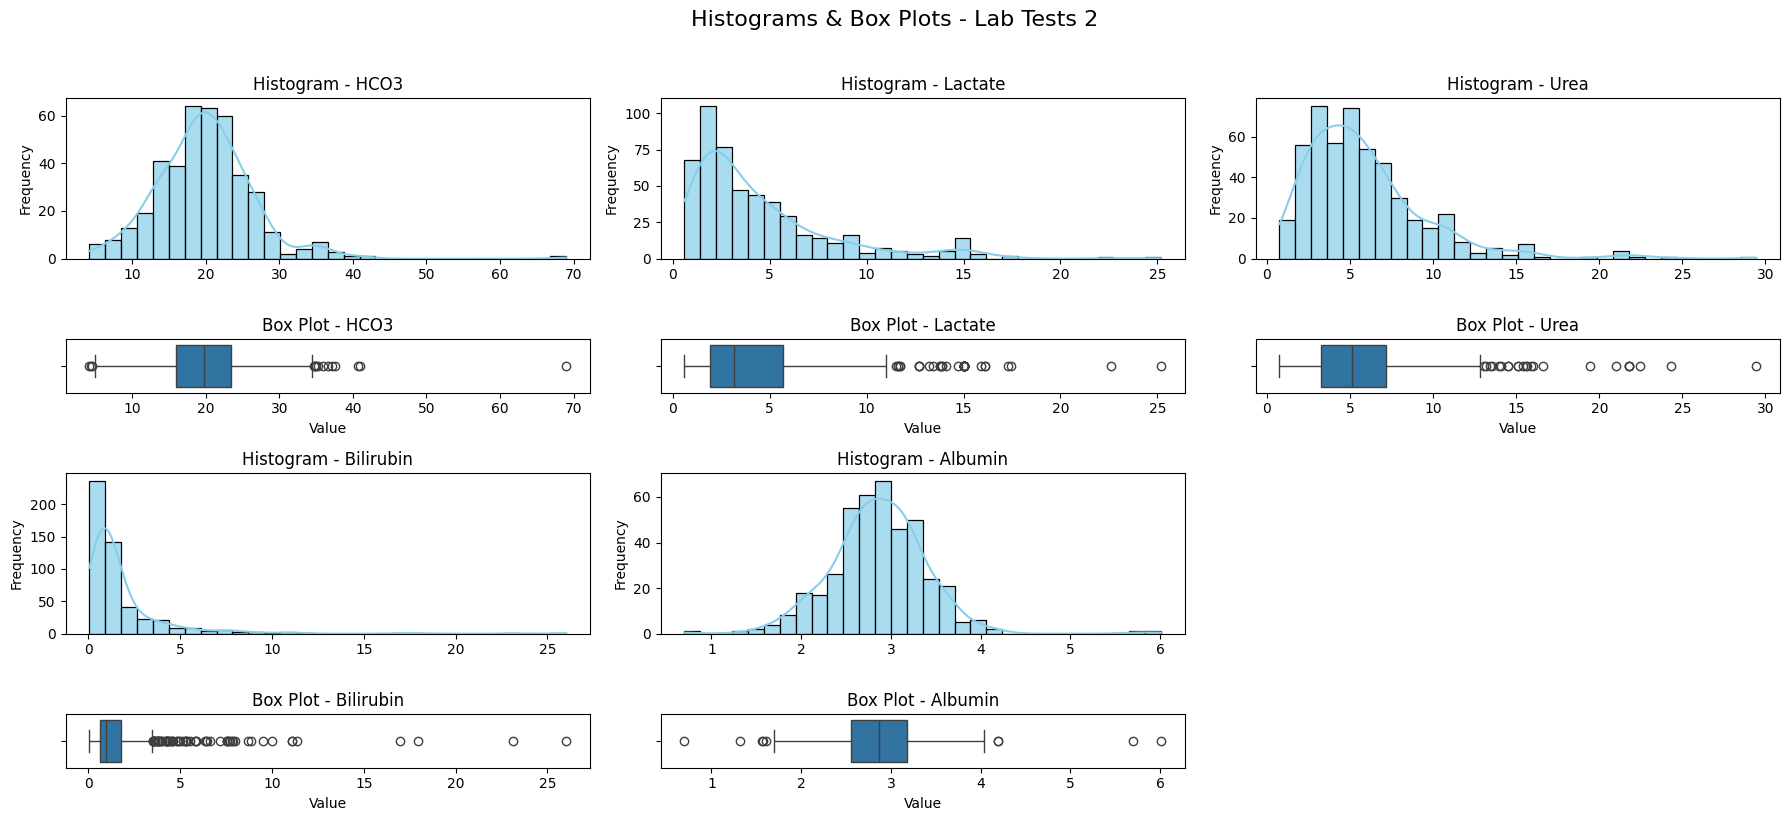

In [64]:
# Define number of columns for layout
num_cols = 3  

for category, features in feature_groups.items():
    available_features = [feature for feature in features if feature in df.columns  and feature not in categorical_features]

    if available_features:
        num_features = len(available_features)
        num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate required rows

        # Create a figure with subplots (2 rows per feature: histogram at top, boxplot at bottom)
        fig = plt.figure(figsize=(18, num_rows * 4))
        gs = gridspec.GridSpec(num_rows * 2, num_cols, height_ratios=[3, 1] * num_rows)  # Histogram 3x size of boxplot

        fig.suptitle(f"Histograms & Box Plots - {category}", fontsize=16, y=1.02)

        # Iterate over each feature and plot histogram & boxplot in the same column
        for i, feature in enumerate(available_features):
            row = i // num_cols  # Determine row position
            col = i % num_cols   # Determine column position

            # Histogram subplot (top)
            hist_ax = fig.add_subplot(gs[row * 2, col])
            sns.histplot(df[feature].dropna(), bins=30, kde=True, ax=hist_ax, color="skyblue", alpha=0.7)
            hist_ax.set_title(f"Histogram - {feature}")
            hist_ax.set_xlabel("")
            hist_ax.set_ylabel("Frequency")

            # Boxplot subplot (bottom)
            box_ax = fig.add_subplot(gs[row * 2 + 1, col])
            sns.boxplot(data=df, x=feature, ax=box_ax)
            box_ax.set_title(f"Box Plot - {feature}")
            box_ax.set_xlabel("Value")
            box_ax.set_ylabel("")

        plt.tight_layout()
        plt.show()


# **Overview of Dataset Distribution and Outliers**

## **Demographic Data**
- **Age**: Right-skewed distribution, with most individuals between **55-85 years old**. A few outliers exist in both younger and older age ranges.
- **Height**: Appears fairly normal but has some clustered peaks. Some extreme values are observed on the lower end. Also contains missing data.
- **Weight**: Normally distributed but with a few high-value outliers. Missing data is also present.
- **Mechanical Ventilation**: Highly right-skewed, with most values at **0**, indicating that the majority of patients were not mechanically ventilated. Some extreme values suggest unusually high usage.

---

## **Vital Signs**
- **Pulse**: Follows a **normal distribution** but with a wide range. Higher values may indicate **tachycardia**.
- **Temperature**: Mostly within the normal physiological range, but some extreme values suggest cases of **fever or hypothermia**.
- **Mean Arterial Pressure (MAP)**: Broad but fairly **normally distributed**, with some outliers indicating **hypertension or hypotension**.
- **Respiratory Rate**: Right-skewed, indicating cases where patients had **very high respiratory rates**.

---

## **Disease Severity Scores**
- **SOFA & APACHE II Scores**: Fairly **normally distributed**, though slightly right-skewed. Higher values indicate **more severe cases**, with some extreme values suggesting **critically ill patients**.

---

## **Lab Tests**
- **pH & HCO3**: Mostly within expected physiological limits, but extreme values indicate **metabolic imbalances**.
- **Lactate, Urea, and Creatinine**: Right-skewed, with extreme values likely associated with **organ dysfunction**.
- **Procalcitonin**: Heavily right-skewed, with most values **low**, but some extremely high, which may indicate **sepsis cases**.
- **Bilirubin**: Heavily right-skewed, with extreme outliers suggesting **liver dysfunction**.
- **Albumin**: Approximately **normally distributed**, though some extreme values are present.
- **White Blood Cell Count**: Right-skewed with some high-value outliers, suggesting **infection or inflammation**.

---

## **Summary**
- Many variables exhibit **skewed distributions**, particularly **lab values and severity scores**.
- **Significant outliers** in **vital signs and lab tests** suggest **wide variability in patient conditions**.
- Features such as **Mechanical Ventilation, Procalcitonin, and Bilirubin** have **extreme right-skewed distributions**, indicating that most values are concentrated on the lower end, with a few very high values.
- **Relatively normal distributions** are found in **weight, age (slightly skewed), and some vital signs**.
- **Extreme values in severity scores (SOFA, APACHE II) and biochemical markers** indicate the presence of critically ill patients in the dataset.



## Target Feature Analysis

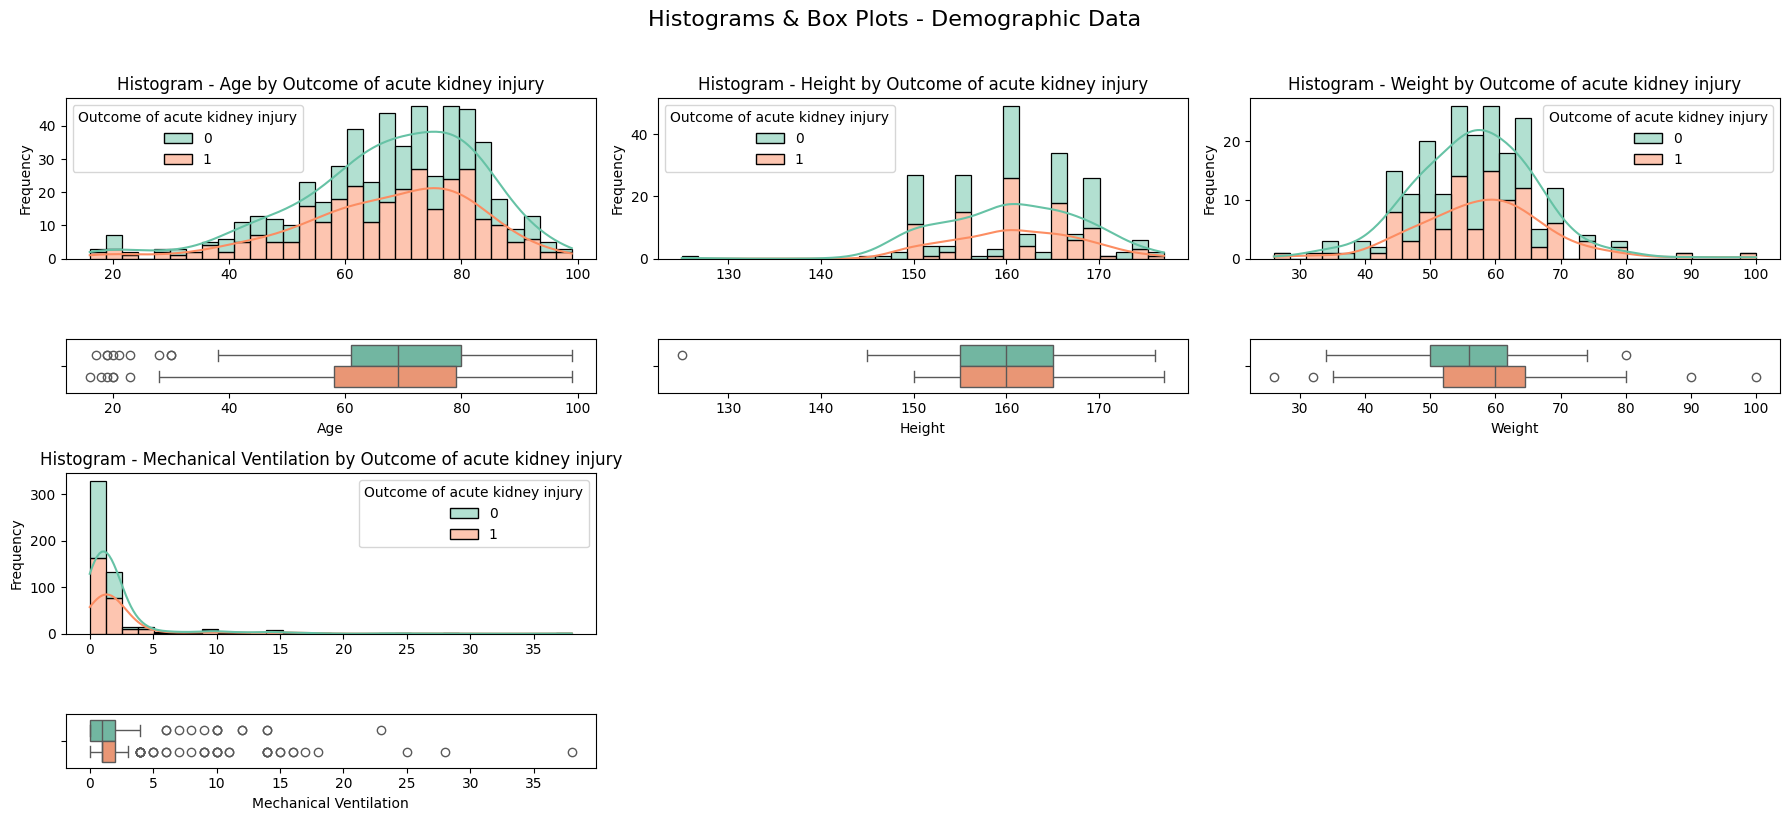

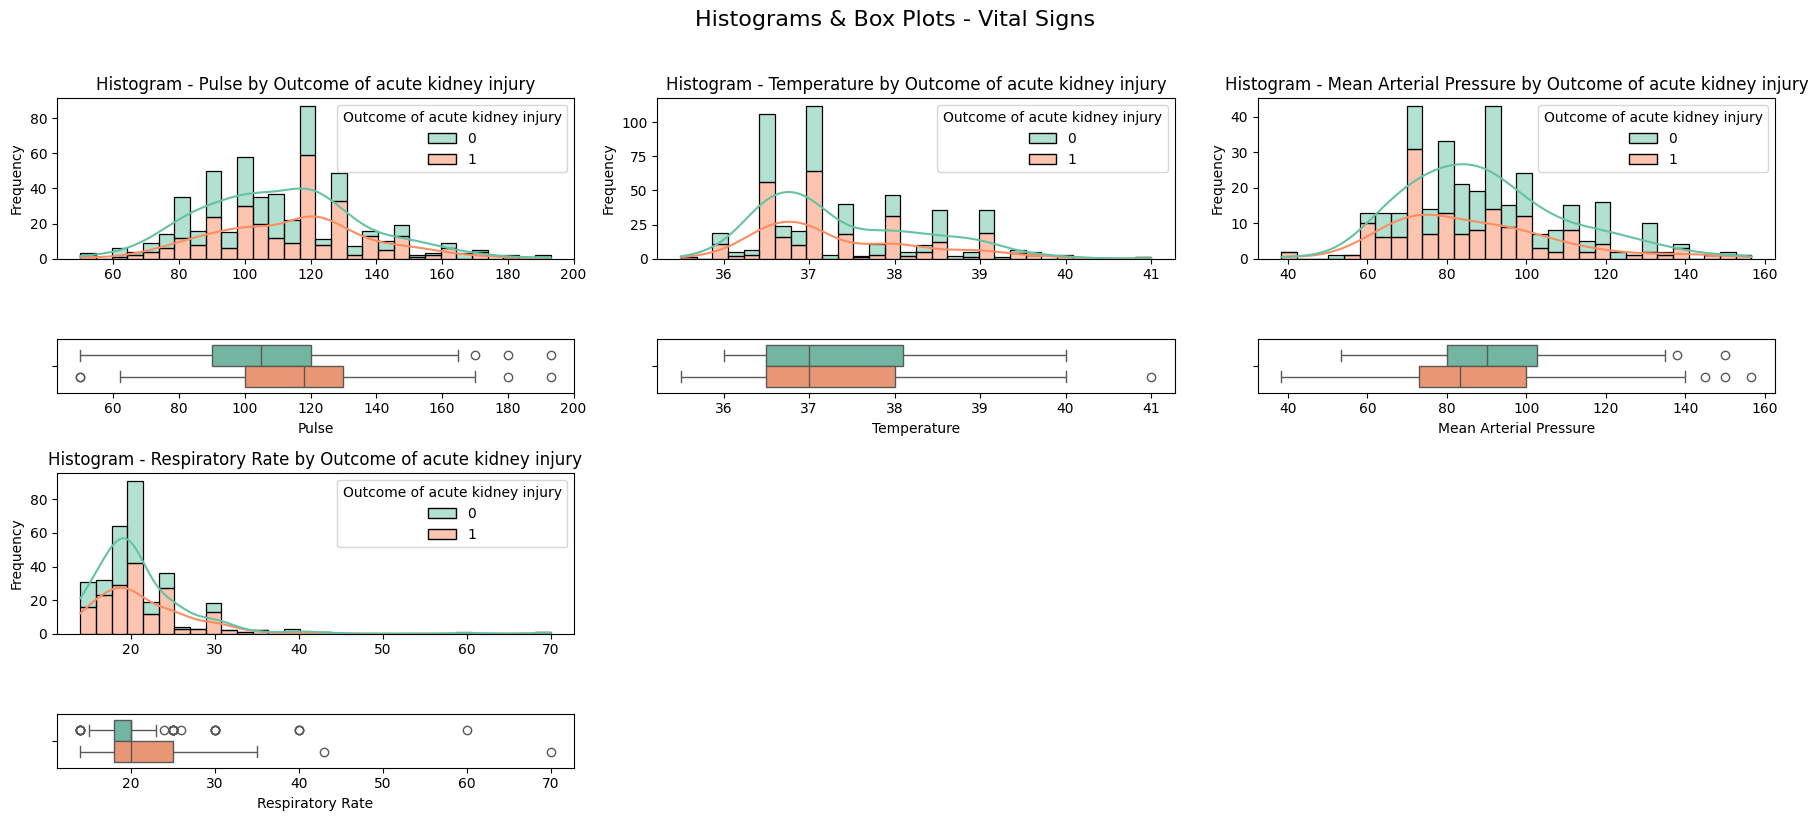

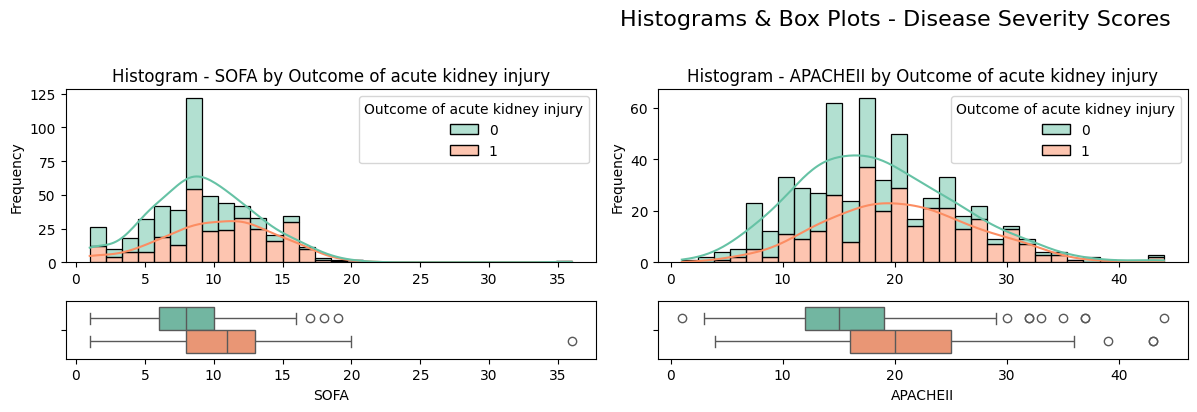

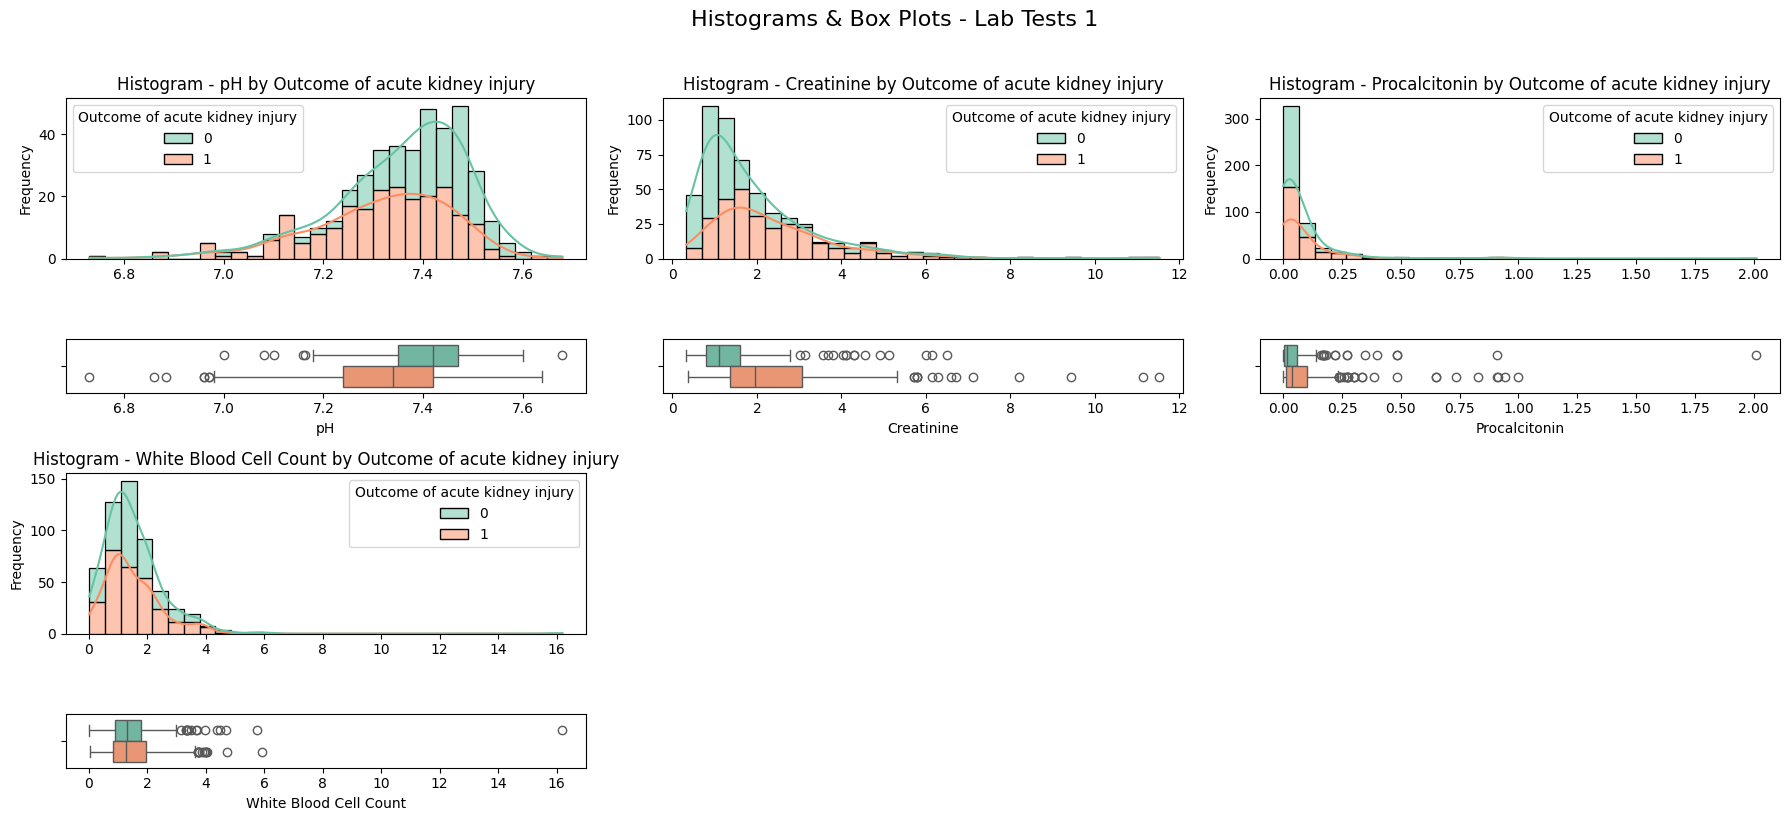

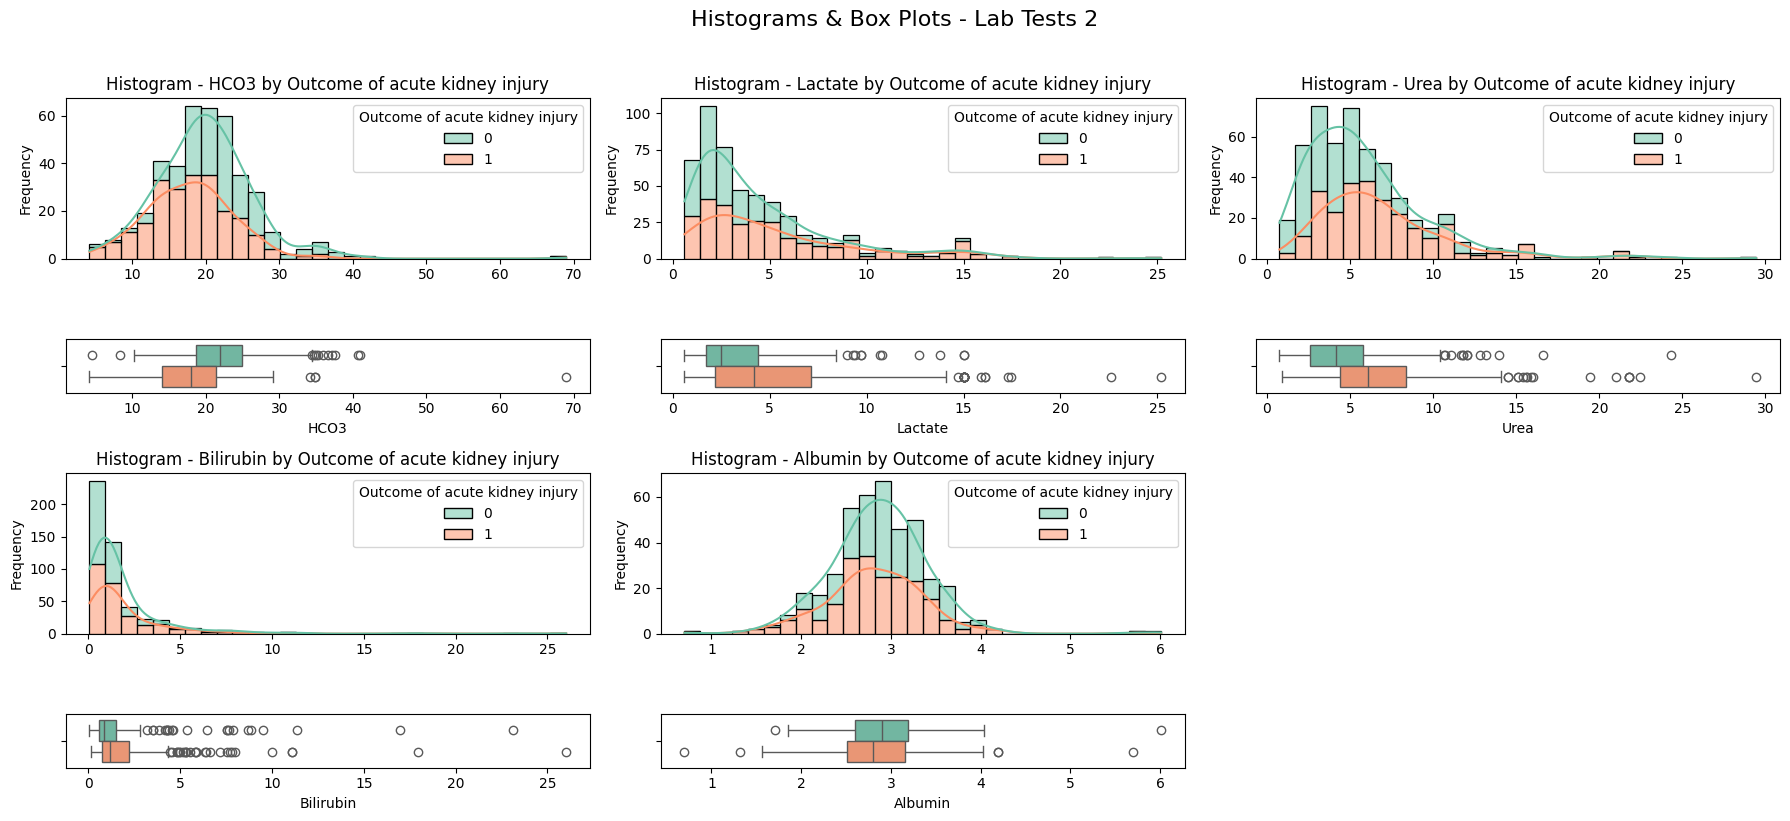

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

hue_col = 'Outcome of acute kidney injury'
my_palette = sns.color_palette("Set2", n_colors=df[hue_col].nunique())  # or any palette you like

num_cols = 3  
for category, features in feature_groups.items():
    available_features = [
        f for f in features 
        if f in df.columns and f not in categorical_features
    ]
    
    if available_features:
        num_features = len(available_features)
        num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

        fig = plt.figure(figsize=(18, num_rows * 4))
        gs = gridspec.GridSpec(num_rows * 2, num_cols, height_ratios=[3, 1] * num_rows)

        fig.suptitle(f"Histograms & Box Plots - {category}", fontsize=16, y=1.02)

        for i, feature in enumerate(available_features):
            row = i // num_cols
            col = i % num_cols

            # Histogram subplot
            hist_ax = fig.add_subplot(gs[row * 2, col])
            sns.histplot(
                data=df, 
                x=feature, 
                hue=hue_col,
                bins=30,
                kde=True,
                ax=hist_ax,
                multiple='stack',
                palette=my_palette,  # <--- ensure the same palette
            )
            hist_ax.set_title(f"Histogram - {feature} by {hue_col}")
            hist_ax.set_xlabel("")
            hist_ax.set_ylabel("Frequency")

            # Boxplot subplot
            box_ax = fig.add_subplot(gs[row * 2 + 1, col])
            sns.boxplot(
                data=df,
                x=feature,      
                hue=hue_col,    
                orient='h',
                ax=box_ax,
                palette=my_palette
            )

            box_ax.get_legend().remove()
            

        plt.tight_layout()
        plt.show()


# **Analysis of Distribution Differences Between AKI (0) and AKI (1) Groups**

## **1. Features with Similar Distributions**
Some features show little difference in distribution between patients with and without acute kidney injury (AKI):
- **Height**: The distributions are nearly identical, with a similar range and median values.
- **Temperature**: The spread of values is similar, with no clear distinction between AKI and non-AKI groups.
- **White Blood Cell Count (WBC)**: Both groups have a similar distribution, with a few high outliers in AKI patients.

## **2. Features with Noticeable Differences**
Several features exhibit different distributions between AKI and non-AKI groups:

- **Age**: 
  - Patients with AKI tend to have a slightly lower median age.

- **Weight**: 
  - AKI patients generally have higher median weight.
  - The distribution for non-AKI patients is more balanced, while AKI patients show a left-skewed pattern.

- **Mechanical Ventilation**: 
  - AKI patients have more outliers at higher ventilation values.
  - This suggests increased respiratory support in AKI cases.

- **Mean Arterial Pressure (MAP)**: 
  - AKI patients tend to have slightly lower MAP values.
  - Non-AKI patients show a wider range of MAP values.

- **Respiratory Rate**: 
  - AKI patients have a slightly broader distribution.
  - More high outliers are observed, possibly indicating respiratory distress.

- **SOFA Score**: 
  - Higher in AKI patients, reflecting worse organ dysfunction.
  - The non-AKI group has a lower median score.

- **APACHE II Score**: 
  - AKI patients have a higher median value.
  - This indicates a more severe overall illness state.

## **3. Laboratory Tests with Differences**
- **pH**: 
  - The distribution is slightly different, with AKI patients showing more cases of lower pH (acidosis).
  
- **HCO3**: 
  - AKI patients have a broader range, with more extreme values at high ends.

- **Lactate**: 
  - AKI patients have a higher median value and the disribution is also broader, suggesting metabolic distress.

- **Urea & Creatinine**: 
  - Both have significantly different distributions.
  - AKI patients have much higher levels, which is expected due to kidney dysfunction.

- **Procalcitonin**: 
  - AKI patients show a higher concentration.
  - This may indicate an association between AKI and systemic infections like sepsis.

- **Bilirubin**: 
  - AKI patients have a slightly higher median.

- **Albumin**: 
  - The distribution is fairly the same for the the groups.

## **4. Outliers in AKI vs. Non-AKI Groups**
- Several features exhibit high outliers in AKI patients:
  - **Mechanical Ventilation**: More extreme values.
  - **Lactate & Procalcitonin**: Right-skewed with high spikes.
  - **Urea & Creatinine**: Strongly elevated in AKI patients.
  - **SOFA & APACHE II Scores**: More extreme cases in AKI patients.

### **Conclusion**
- **Similar Distributions**: Height, Temperature, and WBC count.
- **Different Distributions**: Age, Weight, Mechanical Ventilation, MAP, Respiratory Rate, and Severity Scores.
- **Lab Values Show Key Differences**: pH, HCO3, Lactate, Urea, Creatinine, and Procalcitonin.
- **AKI Patients Have More Outliers**: Particularly in ventilatory support, kidney function markers, and severity scores.

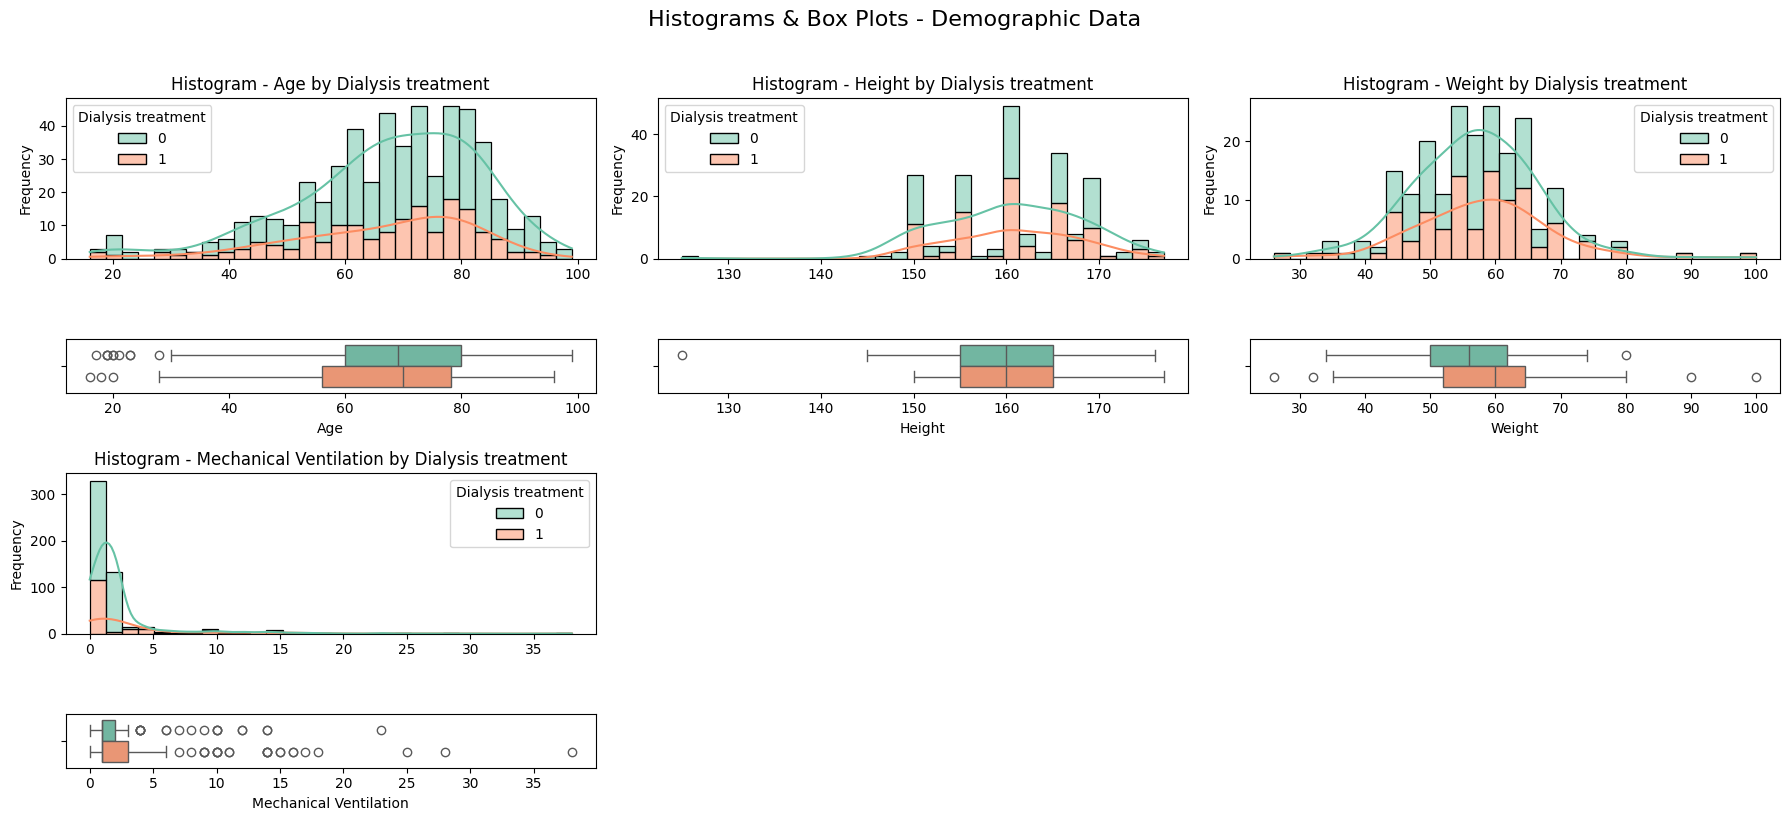

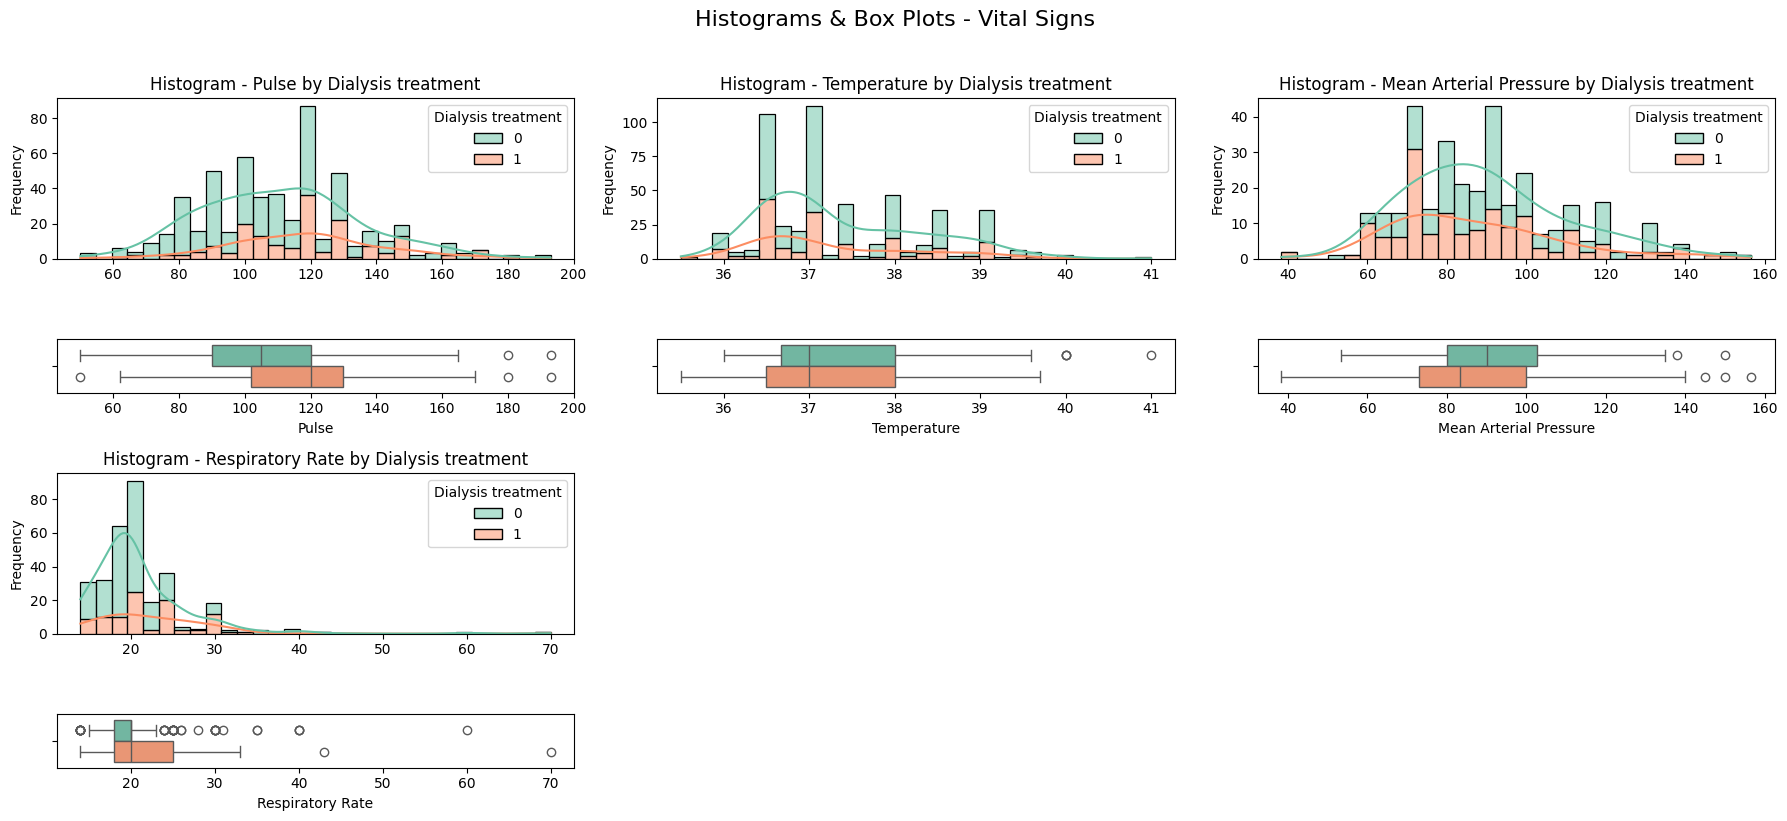

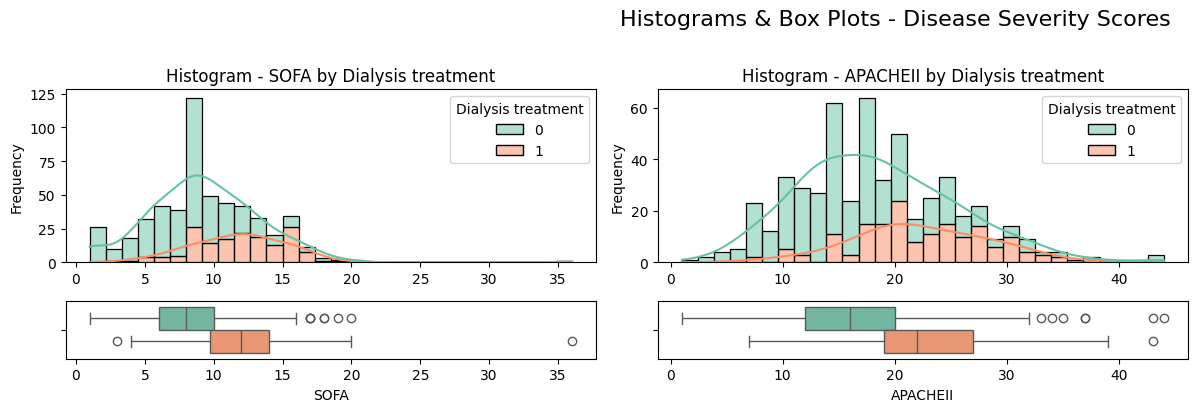

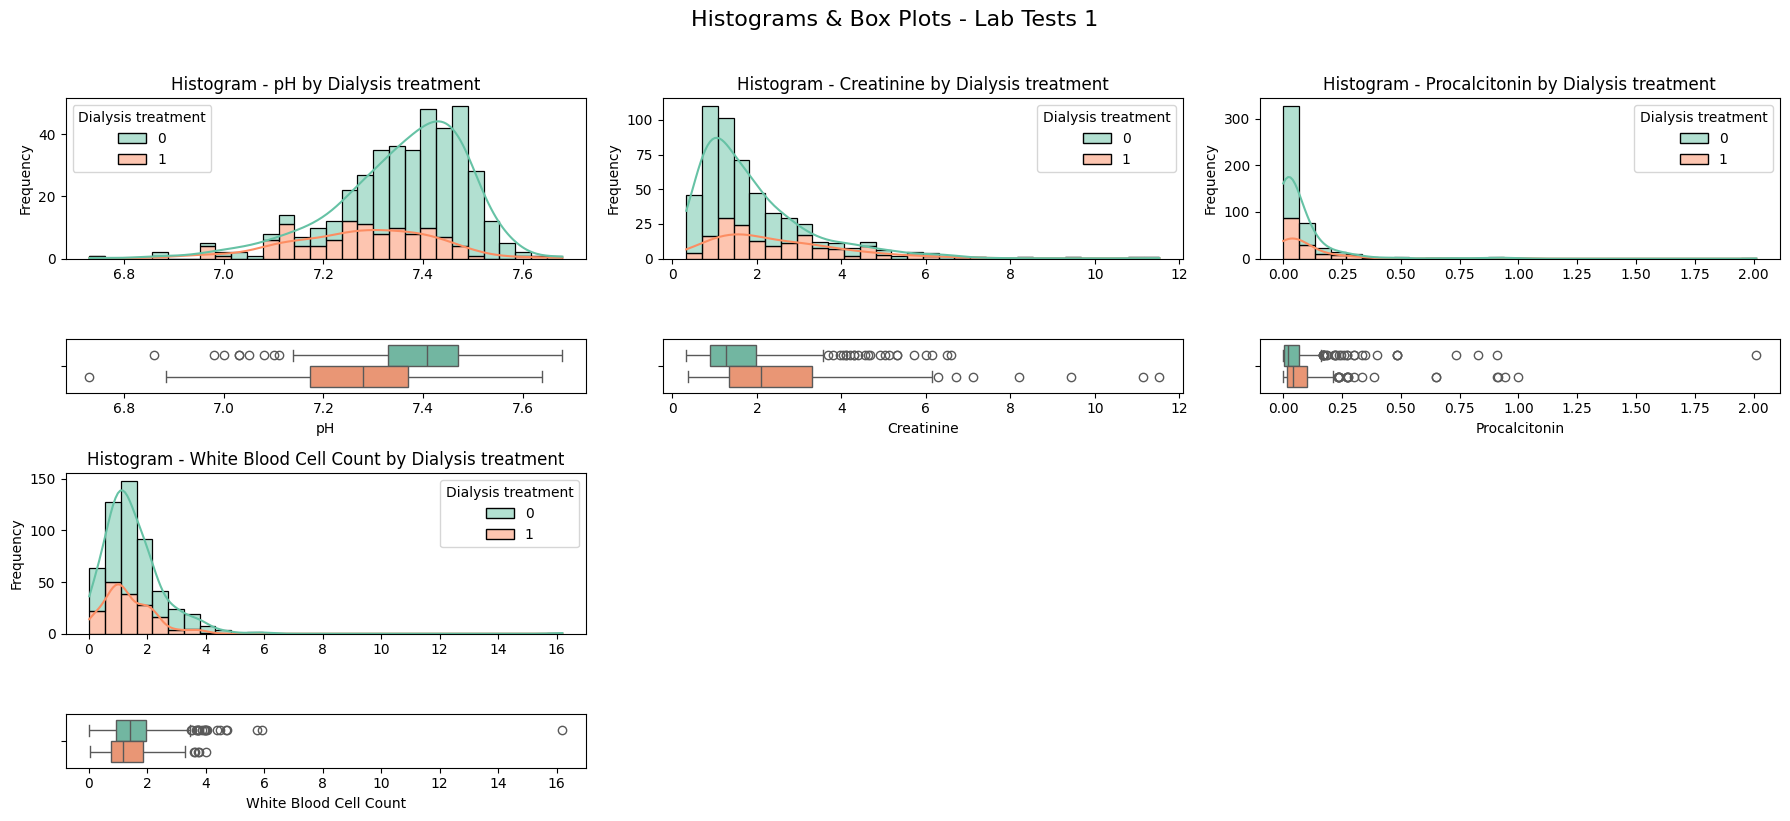

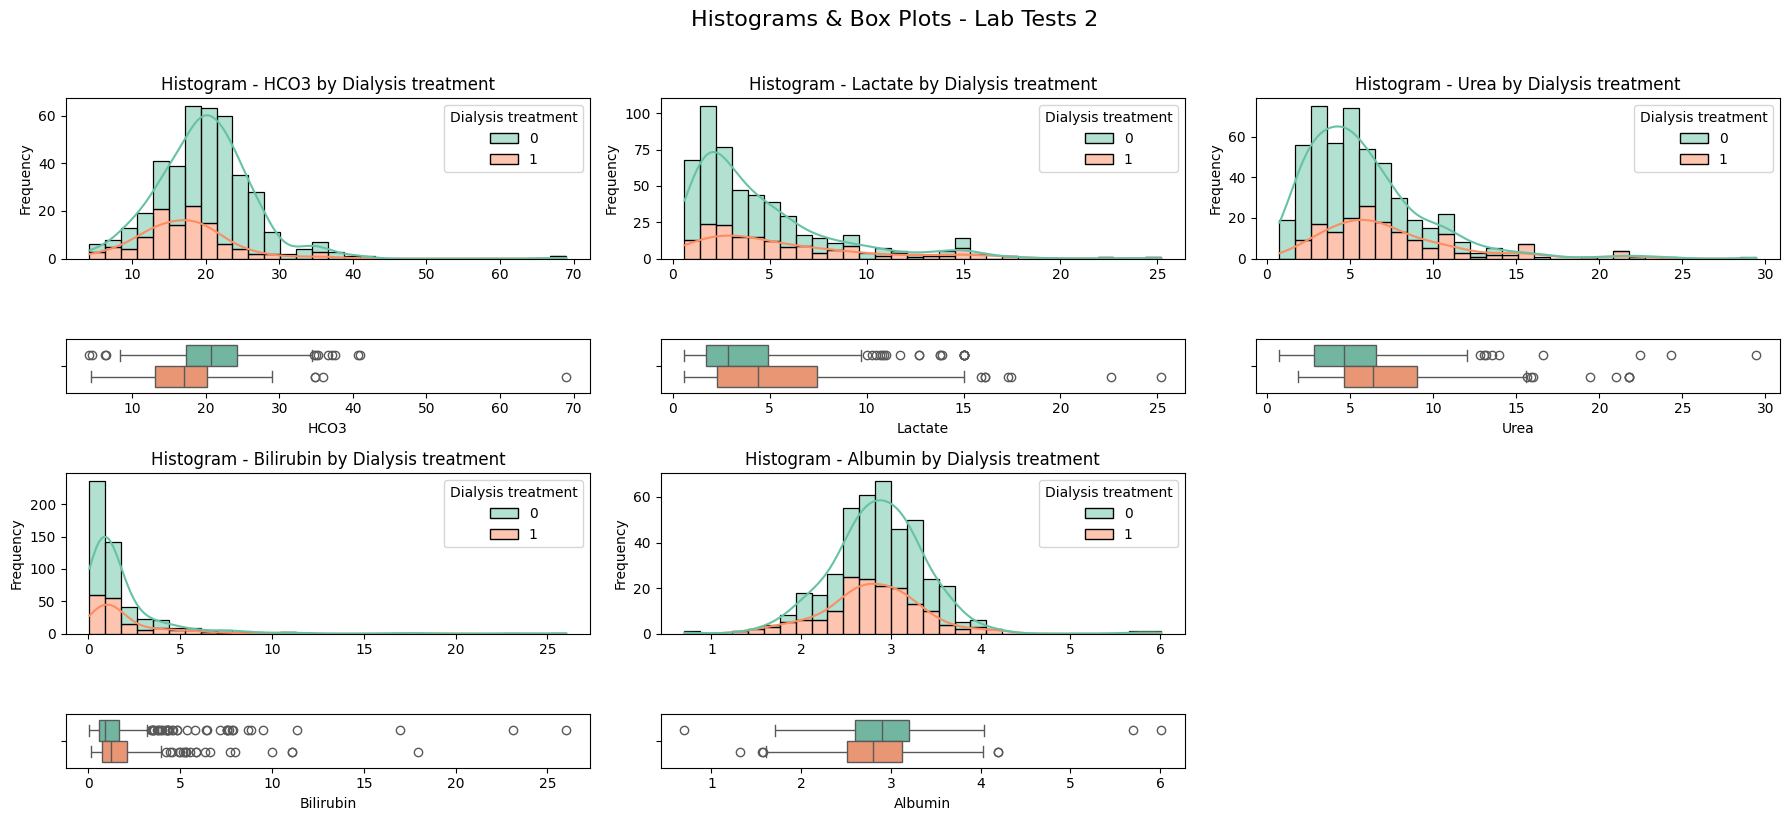

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

hue_col = 'Dialysis treatment'
my_palette = sns.color_palette("Set2", n_colors=df[hue_col].nunique())  # or any palette you like

num_cols = 3  
for category, features in feature_groups.items():
    available_features = [
        f for f in features 
        if f in df.columns and f not in categorical_features
    ]

    if available_features:
        num_features = len(available_features)
        num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

        fig = plt.figure(figsize=(18, num_rows * 4))
        gs = gridspec.GridSpec(num_rows * 2, num_cols, height_ratios=[3, 1] * num_rows)

        fig.suptitle(f"Histograms & Box Plots - {category}", fontsize=16, y=1.02)

        for i, feature in enumerate(available_features):
            row = i // num_cols
            col = i % num_cols

            # Histogram subplot
            hist_ax = fig.add_subplot(gs[row * 2, col])
            sns.histplot(
                data=df, 
                x=feature, 
                hue=hue_col,
                bins=30,
                kde=True,
                ax=hist_ax,
                multiple='stack',
                palette=my_palette,  # <--- ensure the same palette
            )
            hist_ax.set_title(f"Histogram - {feature} by {hue_col}")
            hist_ax.set_xlabel("")
            hist_ax.set_ylabel("Frequency")

            # Boxplot subplot
            box_ax = fig.add_subplot(gs[row * 2 + 1, col])
            sns.boxplot(
                data=df,
                x=feature,      
                hue=hue_col,    
                orient='h',
                ax=box_ax,
                palette=my_palette
            )

            # box_ax.set_title(f"Box Plot - {feature} by {hue_col}")
            # Remove the boxplot’s legend:
            box_ax.get_legend().remove()
            # box_ax.set_xlabel(feature)
            # box_ax.set_ylabel(hue_col)
            

        plt.tight_layout()
        plt.show()


# **Analysis of Distribution Differences Between Dialysis (0) and Dialysis (1) Groups**

## **1. Features with Similar Distributions**
Some features show little difference in distribution between patients who received dialysis and those who did not:
- **Age**: The distributions are nearly identical, indicating that age is not a primary factor in determining dialysis.
- **Height & Weight**: No significant differences, suggesting that dialysis need is independent of basic demographics.
- **Temperature & Pulse**: Both groups exhibit similar distributions, with no major variations.

---

## **2. Features with Noticeable Differences**
Several features exhibit different distributions between dialysis and non-dialysis groups:

- **SOFA & APACHE II Scores**: 
  - Patients receiving dialysis have **higher severity scores**, indicating more **critical conditions**.
  - There are more outliers in the group who are not undergoing dialysis.

- **Creatinine & Urea**: 
  - Higher values are seen in dialysis patients, reflecting **impaired kidney function** and **waste accumulation**.
  - Non-dialysis patients show a more **balanced distribution** but more outliers.

- **Lactate & Procalcitonin**: 
  - Dialysis patients tend to have **higher levels**, possibly indicating **metabolic stress or infection**.
  - The distribution is more right-skewed in dialysis patients.

- **Mean Arterial Pressure (MAP)**: 
  - Slightly **lower in dialysis patients**, potentially due to **fluid shifts** during treatment.
  - Non-dialysis patients have a wider distribution.

---

## **3. Laboratory Tests with Differences**
- **pH & HCO3**: 
  - The dialysis group shows more variability, particularly at the **lower pH** range, indicating **acid-base imbalances**.

- **Bilirubin & White Blood Cell Count (WBC)**: 
  - Higher values and more extreme **outliers** in dialysis patients, suggesting **liver dysfunction and immune responses**.

- **Albumin**: 
  - The median value is quite similar between the two groups.

---

## **4. Outliers in Dialysis vs. Non-Dialysis Groups**
- Several features exhibit high outliers in dialysis patients:
  - **Mechanical Ventilation**: More extreme values, indicating **greater respiratory support needs**.
  - **Bilirubin & WBC**: Higher peaks, possibly due to **complications or co-existing conditions**.
  - **Lactate & Procalcitonin**: Right-skewed with high spikes, indicating **severe metabolic stress**.

---

### **Conclusion**
- **Similar Distributions**: Age, Height, Weight, Temperature, and Pulse.
- **Different Distributions**: SOFA, APACHE II, Creatinine, Urea, Lactate, Procalcitonin, and MAP.
- **Lab Values Show Key Differences**: pH, HCO3, Bilirubin, and WBC count.
- **Dialysis Patients Have More Outliers**: Particularly in ventilatory support, kidney function markers, and infection-related parameters.
- **Overall Observation**: Dialysis patients tend to have more severe **organ dysfunction, metabolic stress, and immune responses**, reinforcing the critical nature of their condition.


In [67]:
different_distribution_features = [
    "SOFA",  # Higher in AKI/Dialysis group
    "APACHEII",  # Higher severity in AKI/Dialysis group
    "Mean Arterial Pressure",  # Slightly lower in AKI/Dialysis
    "Lactate",  # Higher in AKI/Dialysis group
    "Creatinine",  # Elevated in AKI/Dialysis group
    "Procalcitonin",  # More spread in AKI/Dialysis group
    "Bilirubin",  # Higher in AKI/Dialysis
    "White Blood Cell Count",  # More spread in AKI/Dialysis
]

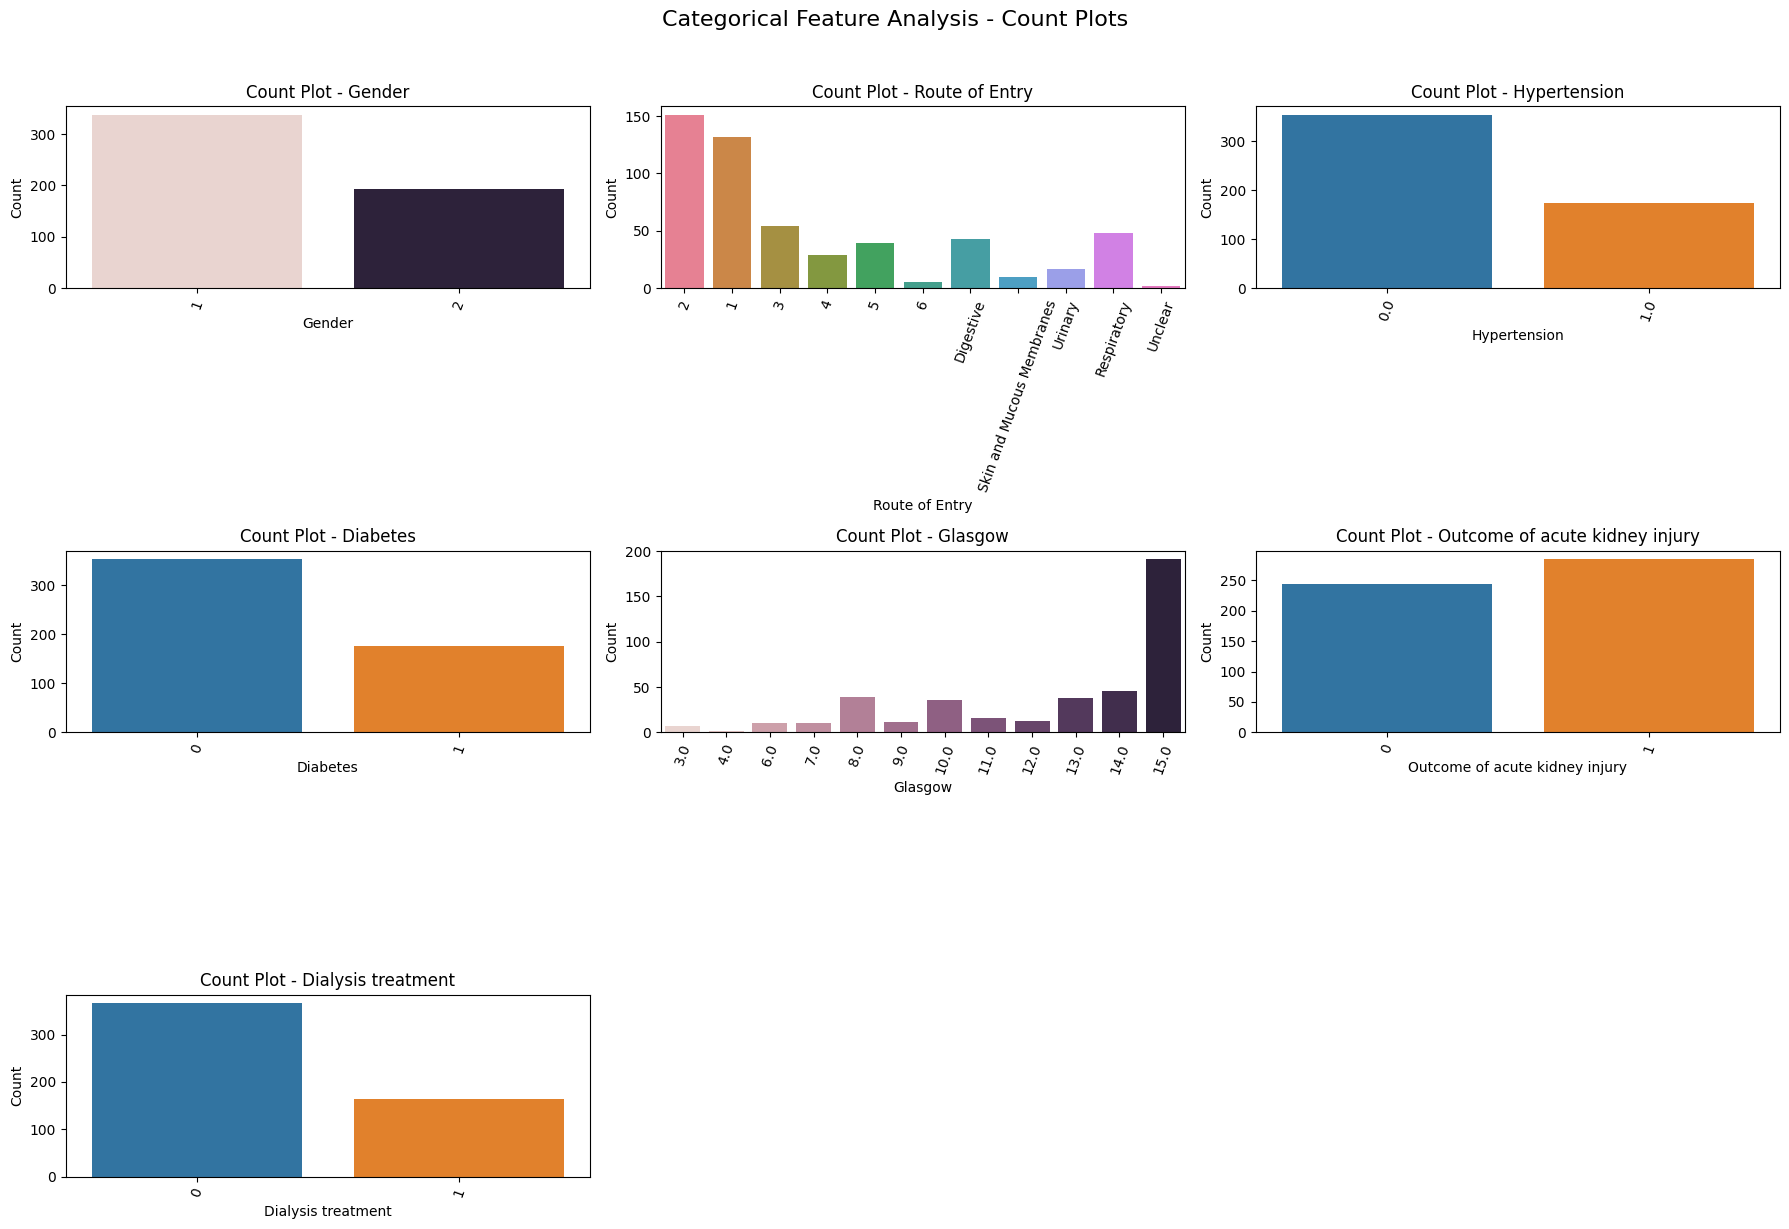

In [68]:
# Define the number of columns for layout
num_cols = 3  
available_categorical_features = [feature for feature in categorical_features if feature in df.columns]

# Determine number of rows needed
num_features = len(available_categorical_features)
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create subplots for the categorical features
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
fig.suptitle("Categorical Feature Analysis - Count Plots", fontsize=16, y=1.02)

# Flatten axes for easier iteration
axes = axes.flatten()

# Generate count plots for each categorical feature
for i, feature in enumerate(available_categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i], hue=feature, legend=None)
    axes[i].set_title(f"Count Plot - {feature}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=70)
    axes[i].set_ylabel("Count")

# Hide empty subplots if any
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Categorical Feature Analysis

## Overview
This section explores the distributions of key categorical variables in the dataset. These count plots show how different categories are represented in the dataset.

---

## Key Observations

### **Gender**
- There are more individuals with **Gender 1** compared to **Gender 2**.

### **Route of Entry**
- The most common entry routes are **Type 2 and Type 1**.
- Other routes like **Digestive and Respiratory** are present but less frequent.

### **Hypertension**
- More individuals do **not** have hypertension (**0**) compared to those who do (**1**).

### **Diabetes**
- Similar to hypertension, most individuals do **not** have diabetes (**0**).

### **Glasgow**
- Most idividauls has a GCS ie Glasgow Coma Scale Value of 15.
    - Higher GCS score (closer to 15) → Better neurological function (Fully alert and conscious)
    - Lower GCS score (closer to 3) → Severe impairment or coma (Unresponsive state)

### **Outcome of Acute Kidney Injury**
- More individuals have experienced an **acute kidney injury outcome (1)** than those who haven't (**0**).

### **Dialysis Treatment**
- A majority of patients did **not** receive dialysis treatment (**0**).
- A smaller proportion of patients did undergo dialysis (**1**), likely those with severe kidney conditions.

---

## Conclusion
- The dataset is **imbalanced** in several categorical features.
- Certain conditions like **acute kidney injury** have more cases marked as **1 (present)**.
- **Dialysis treatment is less common**, likely administered to the most severe cases.
- Further analysis could explore how these categorical variables impact patient outcomes.


# Corelation

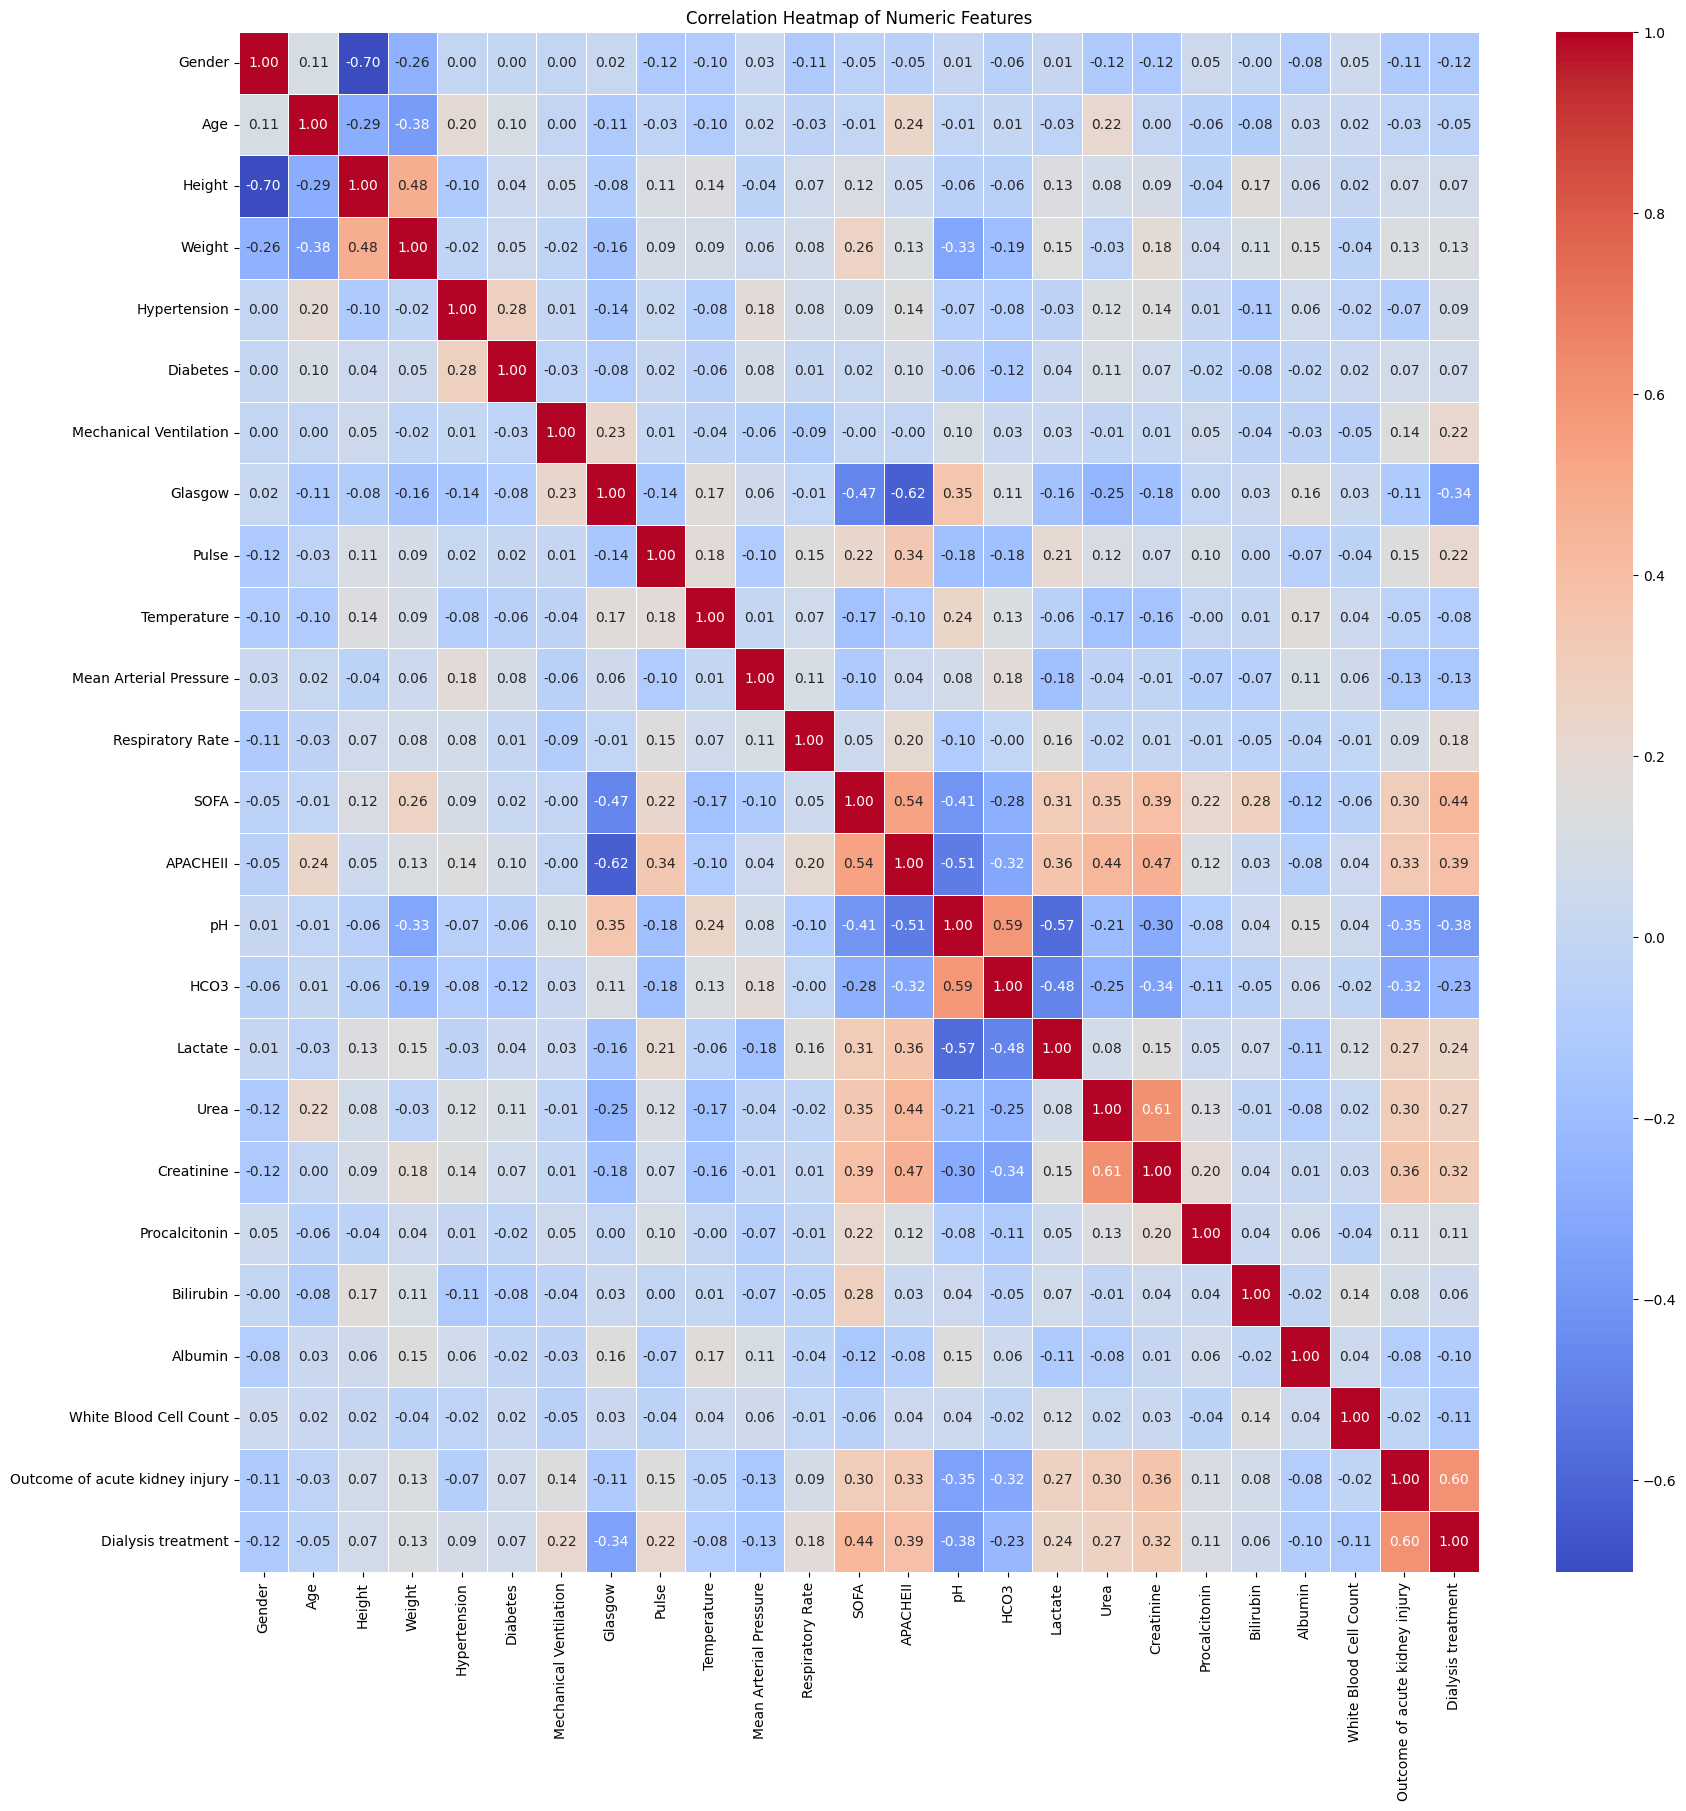

In [69]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# **Correlation Heatmap Analysis**

The heatmap presents the correlation between various numeric features. Here, we focus only on the strongest correlations and the key segments: **AKI (Acute Kidney Injury) and Dialysis Treatment**.

---

## **1. Key Correlations with Acute Kidney Injury (AKI)**
- **SOFA (0.30) and APACHEII (0.33)** → Higher severity scores are strong predictors of AKI.
- **Lactate (0.27)** → Elevated lactate levels indicate metabolic distress, often seen in AKI patients.
- **Urea (0.30) and Creatinine (0.36)** → Both are markers of kidney dysfunction and highly correlated with AKI.
- **Glasgow (-0.11)** → Lower Glasgow Coma Scale (GCS) scores are linked to worse neurological function, which may co-exist with AKI.
- **pH (-0.35)** → Lower pH (acidosis) is commonly observed in AKI cases.

---

## **2. Key Correlations with Dialysis Treatment**
- **SOFA (0.44) and APACHEII (0.39)** → Dialysis patients tend to have higher disease severity.
- **Urea (0.27) and Creatinine (0.32)** → Patients requiring dialysis exhibit higher levels of these kidney function markers.
- **Lactate (0.32)** → Metabolic stress is more pronounced in dialysis patients.
- **Glasgow (-0.34)** → Worse neurological function (lower GCS) correlates with dialysis.
- **pH (-0.38)** → More cases of acidosis are seen in dialysis patients, reflecting metabolic imbalances.

---

## **3. Other Notable Correlations**
- **Glasgow - SOFA (-0.47) and APACHEII (-0.62)** → Patients with lower GCS scores tend to have higher SOFA and APACHEII scores, indicating severe illness.
- **SOFA and APACHEII (0.54)** → Strong correlation between these two severity measures, as both assess multi-organ dysfunction.
- **HCO3 & pH (0.59)** → Strong positive correlation, as bicarbonate levels regulate acid-base balance.

---

### **Summary**
- **AKI and Dialysis Treatment** are strongly correlated with **disease severity scores (SOFA, APACHEII)** and **kidney function markers (Urea, Creatinine)**.
- **Acid-base imbalances (pH, HCO3)** play a crucial role in both AKI and dialysis patients, with lower pH levels indicating metabolic acidosis.
- **Neurological status (Glasgow Coma Scale) is negatively correlated with disease severity (SOFA, APACHEII) and dialysis need**, suggesting that critically ill patients with lower consciousness levels are more likely to develop severe kidney dysfunction.
- **SOFA and APACHEII scores** show a strong correlation with each other, reinforcing their use as key indicators of patient severity.


# Imputation

Analyzing the missing values across different datasets revealed significant biases in certain columns. Many features had substantial missingness in specific dataframes, leading to an imbalance in data distribution when merged. This imbalance could distort the model's learning process, affecting overall performance and generalizability.

In [70]:
df_mean_na = pd.DataFrame({
    "df1": df1[filtered_columns].isna().mean()*100,
    "df2": df2[filtered_columns].isna().mean()*100,
    "df3": df3[filtered_columns].isna().mean()*100,
    "df4": df4[filtered_columns].isna().mean()*100,
    'df':pd.concat([df1[filtered_columns], df2[filtered_columns], df3[filtered_columns], df4[filtered_columns]]).isna().mean()*100
})

df_mean_na

df1        df2    df3         df4  \
pH                               1.020408  99.099099    5.5    0.000000   
Diabetes                         0.000000   0.000000    0.0    0.000000   
Gender                           0.000000   0.000000    0.0    0.000000   
Age                              0.000000   0.000000    0.0    0.000000   
HCO3                             1.020408  99.099099    6.0    0.000000   
Bilirubin                        3.061224   0.000000   11.5    1.694915   
Weight                           0.000000   0.900901  100.0  100.000000   
Urea                             0.000000   0.900901   13.5    0.000000   
SOFA                             0.000000   0.000000    0.0    0.000000   
Albumin                          4.081633   0.000000   49.5    8.474576   
White Blood Cell Count           0.000000   0.000000    0.0    0.000000   
Pulse                            0.000000   0.000000    0.5    0.000000   
Dialysis treatment               0.000000   0.000000    0.0    0.000000   
Mechanical Ventilation           0.000000   0.000000    0.0    0.000000   
Procalcitonin                   22.448980   0.000000   15.5    7.627119   
Creatinine                       0.000000   0.000000    0.0    0.000000   
Glasgow                          1.020408  99.099099    0.0    0.000000   
Respiratory Rate                 1.020408  99.099099   31.0   38.135593   
Outcome of acute kidney injury   0.000000   0.000000    0.0    0.000000   
Route of Entry                   0.000000   0.000000    0.0    0.000000   
APACHEII                         0.000000   0.000000    0.0    0.000000   
Lactate                          1.020408   3.603604    6.0    0.000000   
Height                           0.000000   0.900901  100.0  100.000000   
Temperature                      0.000000   0.900901   11.5    0.000000   
Mean Arterial Pressure           0.000000   0.900901   99.5    0.000000   
Hypertension                     0.000000   0.000000    0.5    0.000000   

                                       df  
pH                              23.149905  
Diabetes                         0.000000  
Gender                           0.000000  
Age                              0.000000  
HCO3                            23.339658  
Bilirubin                        5.313093  
Weight                          60.531309  
Urea                             5.313093  
SOFA                             0.000000  
Albumin                         21.442125  
White Blood Cell Count           0.000000  
Pulse                            0.189753  
Dialysis treatment               0.000000  
Mechanical Ventilation           0.000000  
Procalcitonin                   11.764706  
Creatinine                       0.000000  
Glasgow                         21.062619  
Respiratory Rate                41.366224  
Outcome of acute kidney injury   0.000000  
Route of Entry                   0.000000  
APACHEII                         0.000000  
Lactate                          3.225806  
Height                          60.531309  
Temperature                      4.554080  
Mean Arterial Pressure          37.950664  
Hypertension                     0.189753

## Reason for Selecting Specific Features for Imputation

I experimented with various feature combinations for imputation, and this particular selection resulted in the best-performing model.

In [71]:
# Define the columns to impute
columns_to_impute = ["Respiratory Rate", "Albumin", 'Bilirubin', 'Procalcitonin', 'HCO3']

# Impute missing values based on group-wise median
df[columns_to_impute] = df.groupby(["Gender", "Hypertension", "Outcome of acute kidney injury"])[columns_to_impute].transform(lambda x: x.fillna(x.median()))

In [72]:
df1 = df.iloc[:98, :].copy()
df2 = df.iloc[99:210, :].copy()
df3 = df.iloc[211:411, :].copy()
df4 = df.iloc[412:531, :].copy()

In [73]:
df_mean_na = pd.DataFrame({
    "df1": df1[filtered_columns].isna().mean()*100,
    "df2": df2[filtered_columns].isna().mean()*100,
    "df3": df3[filtered_columns].isna().mean()*100,
    "df4": df4[filtered_columns].isna().mean()*100,
    'df':pd.concat([df1[filtered_columns], df2[filtered_columns], df3[filtered_columns], df4[filtered_columns]]).isna().mean()*100
})

df_mean_na

df1        df2    df3    df4         df
pH                              1.020408  99.099099    5.5    0.0  23.149905
Diabetes                        0.000000   0.000000    0.0    0.0   0.000000
Gender                          0.000000   0.000000    0.0    0.0   0.000000
Age                             0.000000   0.000000    0.0    0.0   0.000000
HCO3                            0.000000   0.000000    0.5    0.0   0.189753
Bilirubin                       0.000000   0.000000    0.5    0.0   0.189753
Weight                          0.000000   0.900901  100.0  100.0  60.531309
Urea                            0.000000   0.900901   13.5    0.0   5.313093
SOFA                            0.000000   0.000000    0.0    0.0   0.000000
Albumin                         0.000000   0.000000    0.5    0.0   0.189753
White Blood Cell Count          0.000000   0.000000    0.0    0.0   0.000000
Pulse                           0.000000   0.000000    0.5    0.0   0.189753
Dialysis treatment              0.000000   0.000000    0.0    0.0   0.000000
Mechanical Ventilation          0.000000   0.000000    0.0    0.0   0.000000
Procalcitonin                   0.000000   0.000000    0.5    0.0   0.189753
Creatinine                      0.000000   0.000000    0.0    0.0   0.000000
Glasgow                         1.020408  99.099099    0.0    0.0  21.062619
Respiratory Rate                0.000000   0.000000    0.5    0.0   0.189753
Outcome of acute kidney injury  0.000000   0.000000    0.0    0.0   0.000000
Route of Entry                  0.000000   0.000000    0.0    0.0   0.000000
APACHEII                        0.000000   0.000000    0.0    0.0   0.000000
Lactate                         1.020408   3.603604    6.0    0.0   3.225806
Height                          0.000000   0.900901  100.0  100.0  60.531309
Temperature                     0.000000   0.900901   11.5    0.0   4.554080
Mean Arterial Pressure          0.000000   0.900901   99.5    0.0  37.950664
Hypertension                    0.000000   0.000000    0.5    0.0   0.189753

# Transformation

Again for transformation these were the best transformations for the selected columns.

- Log transformation was used for highly skewed variables to reduce extreme outliers.

- Square root transformation was applied to moderately skewed features where a softer correction was needed.

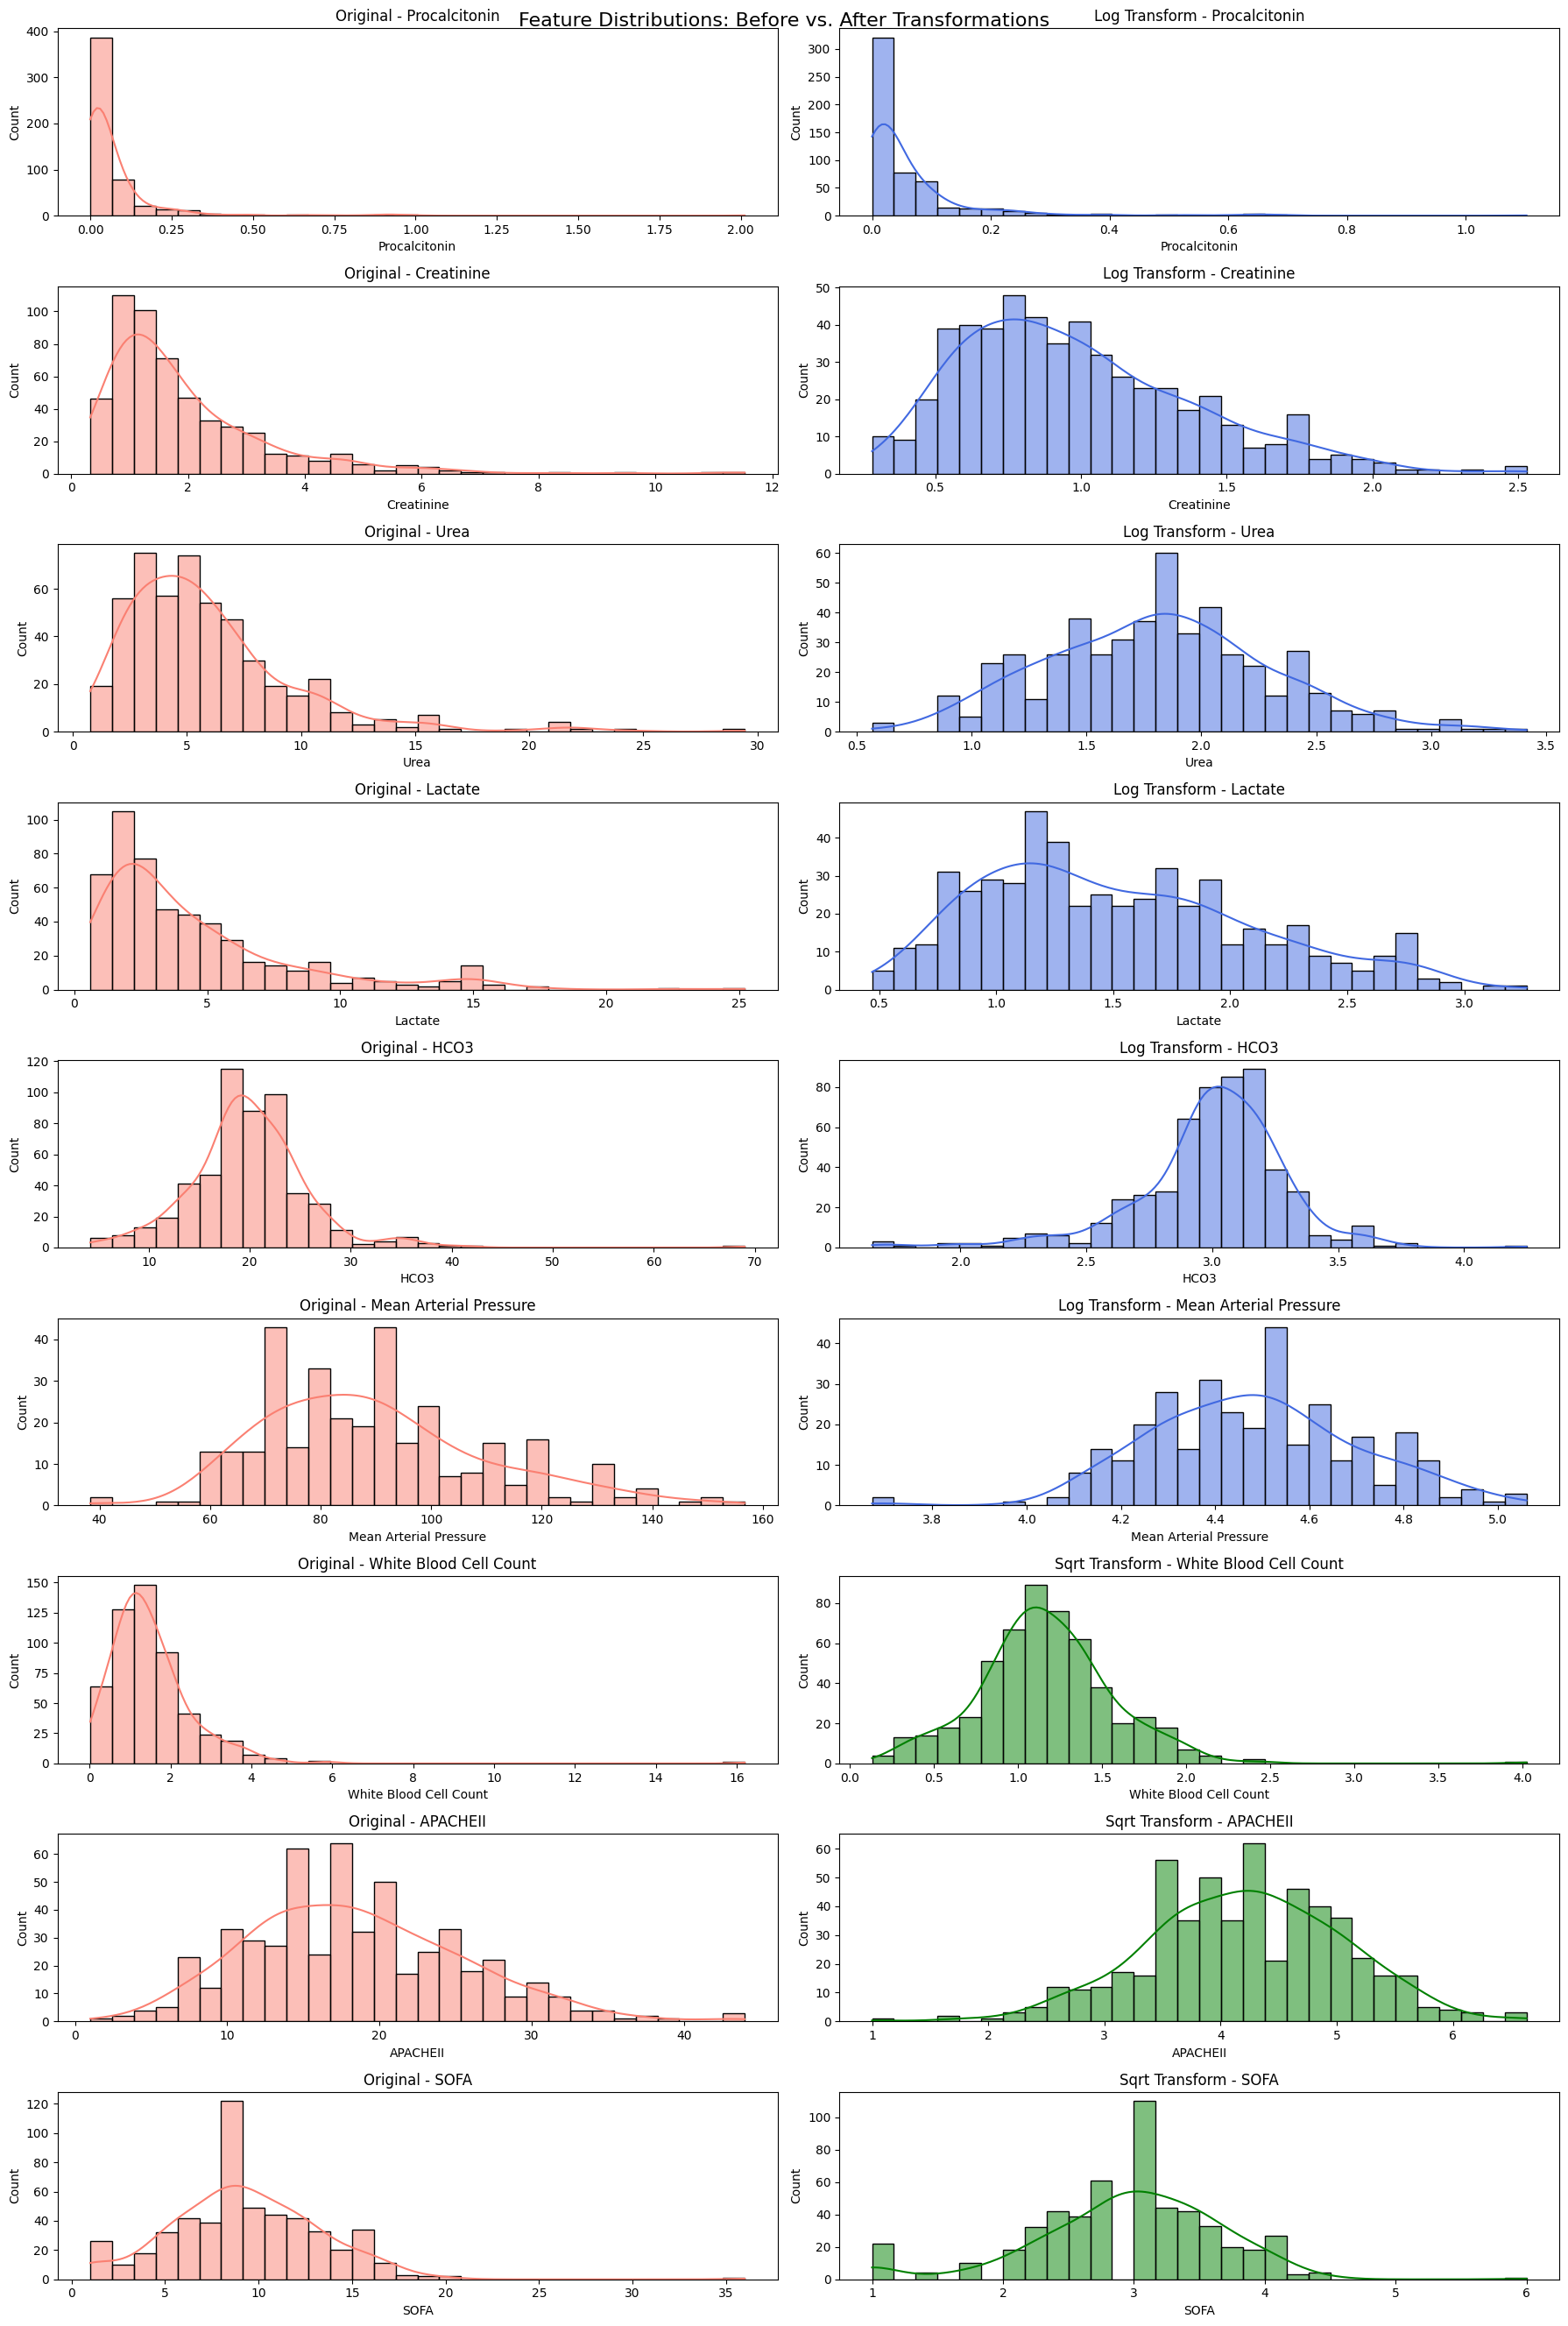

In [74]:
# Create a copy of the dataset
df_transformed = df.copy()

# Define transformation categories
log_transform_cols = ['Procalcitonin', 'Creatinine', 'Urea', 'Lactate', 'HCO3', 'Mean Arterial Pressure']
sqrt_transform_cols = ['White Blood Cell Count', 'APACHEII', 'SOFA']

# Set up subplot grid (Each row is a feature, each column is a transformation)
num_features = len(log_transform_cols + sqrt_transform_cols)
num_cols = 2  # Original, Log, Square Root
fig, axes = plt.subplots(num_features, num_cols, figsize=(18, num_features * 3), sharex=False, sharey=False)

fig.suptitle("Feature Distributions: Before vs. After Transformations", fontsize=16)

row = 0  # Row counter for plotting

# Process each column
for col in log_transform_cols + sqrt_transform_cols:
    
    # Original Distribution
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[row, 0], color="salmon")
    axes[row, 0].set_title(f"Original - {col}")

    # Log Transform
    if col in log_transform_cols:
        df_transformed[col] = np.log1p(df[col])
        sns.histplot(df_transformed[col].dropna(), bins=30, kde=True, ax=axes[row, 1], color="royalblue")
        axes[row, 1].set_title(f"Log Transform - {col}")
        df[col] = np.log1p(df[col])
        

    # Square Root Transform
    if col in sqrt_transform_cols:
        df_transformed[col] = np.sqrt(df[col].clip(lower=0))  # Ensure no negative values
        sns.histplot(df_transformed[col].dropna(), bins=30, kde=True, ax=axes[row, 1], color="green")
        axes[row, 1].set_title(f"Sqrt Transform - {col}")
        df[col] = np.sqrt(df[col].clip(lower=0))

    row += 1

# Adjust layout
plt.tight_layout()
plt.show()


# Outliers

In [75]:
df1_backup = df1.copy()
df2_backup = df2.copy()
df3_backup = df3.copy()
df4_backup = df4.copy()

In [76]:
df1 = df1_backup.copy()
df2 = df2_backup.copy()
df3 = df3_backup.copy()
df4 = df4_backup.copy()

In [77]:
pd.concat([df1,df2,df3,df4]).shape

(527, 26)

In [78]:
def remove_outliers(df):
    # List of columns in which to remove outliers
    cols = ['Mechanical Ventilation', 'Procalcitonin', 'Creatinine',
            'Bilirubin', 'White Blood Cell Count']

    # Make a copy if you don't want to mutate the original df
    df_clean = df.copy()

    for col in cols:
        # 1. Compute Q1, Q3
        q1 = df_clean[col].quantile(0.25)
        q3 = df_clean[col].quantile(0.75)
        iqr = q3 - q1

        # 2. Define bounds
        lower = q1 - 2.5 * iqr
        upper = q3 + 2.5 * iqr
        

        # 3. Filter rows to keep only values within [lower, upper]
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    
    # Return the final cleaned DataFrame
    return df_clean


In [79]:
df1 = remove_outliers(df1)
df2 = remove_outliers(df2)
df3 = remove_outliers(df3)
df4 = remove_outliers(df4)

df = pd.concat([df1,df2,df3,df4])

In [80]:
df.shape

(395, 26)

In [81]:
print(f'Percentage of data retained: {round((395/527)*100,2)}')

Percentage of data retained: 74.95


### **Outlier Removal Approach and Justification**

#### **1. Choice of Outlier Removal Method**
To handle potential outliers in the dataset, I used the **Interquartile Range (IQR) method** with a **2.5x IQR threshold**. This threshold provided the best balance between **removing extreme outliers** and **retaining valuable data points** based on model performance.

Instead of capping extreme values, I opted for **removal**, as I was uncertain which data points were true outliers versus meaningful extreme values. This ensures that the model is trained on reliable data without introducing artificial biases.

#### **2. Column Selection for Outlier Removal**
Outliers were removed from the following variables:
- **Mechanical Ventilation**  
- **Procalcitonin**  
- **Creatinine**  
- **Bilirubin**  
- **White Blood Cell Count**  

These features were chosen based on their expected medical ranges and identified extreme values.

#### **3. Segmented Outlier Removal Approach**
Outlier removal was performed **individually on each segmented dataset** (**df1, df2, df3, df4**), rather than the combined dataset. This decision was made because:
- The dataset was **segmented into four groups with different distributions**.
- Applying the IQR method **globally** on the combined dataset did not yield a good model.
- Removing outliers within each segment allowed for **better data integrity** and **preserved the unique distribution of each group**.

After removing outliers, the cleaned datasets (**df1, df2, df3, df4**) were concatenated back into a single dataset.

#### **4. Importance of Domain Expertise**
While this method improved model performance, **final confirmation with a domain expert is recommended** to ensure that no clinically relevant extreme values were removed. Certain high or low values might be **medically significant rather than erroneous**, and expert validation would help refine the approach.


# Exporting the dataframe for XGBoost Models

In [82]:
df.to_csv("Cleaned.csv", index=False)

# Models Built

- XGBAKI.ipynb focusing on predicting Outcome of acute kidney injury
    - Final Model Scores:
        - Accuracy on test set: 0.84
        - ROC: 0.92
        - Precision: 0.82
        - Recall: 0.93

- XGBDialysis.ipynb focusing on predicting Dialysis treatment
    - Final Model Scores:
        - Accuracy on test set: 0.91
        - ROC: 0.95
        - Precision: 0.86
        - Recall: 0.92

Formulas:

Precision = TP / (TP + FP)
- Measures how many of the predicted positives were actually positive.

Recall = TP / (TP + FN)
- Measures how many of the actual positives were correctly identified.
